# **SOURCE**
https://www.kaggle.com/code/nkitgupta/who-will-leave-a-job/notebook

Features
- enrollee_id : Unique ID for candidate
- city: City code
- city_ development _index : Developement index of the city (scaled)
- gender: Gender of candidate
- relevent_experience: Relevant experience of candidate
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of candidate
- major_discipline :Education major discipline of candidate
- experience: Candidate total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- lastnewjob: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change

In [1]:
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'

import warnings
warnings.filterwarnings('ignore')

In [2]:
pathTrain = 'https://raw.githubusercontent.com/mrazakqq/data-science-learning/main/dataset/hr-analytics-who-will-leave-the-job/aug_train.csv'
pathTest = 'https://raw.githubusercontent.com/mrazakqq/data-science-learning/main/dataset/hr-analytics-who-will-leave-the-job/aug_test.csv'

data = pd.read_csv(pathTrain)
dataTesting = pd.read_csv(pathTest)

In [3]:
data

enrollee_id      city  city_development_index gender  \
0             8949  city_103                   0.920   Male   
1            29725   city_40                   0.776   Male   
2            11561   city_21                   0.624    NaN   
3            33241  city_115                   0.789    NaN   
4              666  city_162                   0.767   Male   
...            ...       ...                     ...    ...   
19153         7386  city_173                   0.878   Male   
19154        31398  city_103                   0.920   Male   
19155        24576  city_103                   0.920   Male   
19156         5756   city_65                   0.802   Male   
19157        23834   city_67                   0.855    NaN   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        Graduate   
2       No relevent experience    Full time course        Graduate   
3       No relevent experience                 NaN        Graduate   
4      Has relevent experience       no_enrollment         Masters   
...                        ...                 ...             ...   
19153   No relevent experience       no_enrollment        Graduate   
19154  Has relevent experience       no_enrollment        Graduate   
19155  Has relevent experience       no_enrollment        Graduate   
19156  Has relevent experience       no_enrollment     High School   
19157   No relevent experience       no_enrollment  Primary School   

      major_discipline experience company_size    company_type last_new_job  \
0                 STEM        >20          NaN             NaN            1   
1                 STEM         15        50-99         Pvt Ltd           >4   
2                 STEM          5          NaN             NaN        never   
3      Business Degree         <1          NaN         Pvt Ltd        never   
4                 STEM        >20        50-99  Funded Startup            4   
...                ...        ...          ...             ...          ...   
19153       Humanities         14          NaN             NaN            1   
19154             STEM         14          NaN             NaN            4   
19155             STEM        >20        50-99         Pvt Ltd            4   
19156              NaN         <1      500-999         Pvt Ltd            2   
19157              NaN          2          NaN             NaN            1   

       training_hours  target  
0                  36     1.0  
1                  47     0.0  
2                  83     0.0  
3                  52     1.0  
4                   8     0.0  
...               ...     ...  
19153              42     1.0  
19154              52     1.0  
19155              44     0.0  
19156              97     0.0  
19157             127     0.0  

[19158 rows x 14 columns]

In [4]:
dataTesting

enrollee_id      city  city_development_index  gender  \
0           32403   city_41                   0.827    Male   
1            9858  city_103                   0.920  Female   
2           31806   city_21                   0.624    Male   
3           27385   city_13                   0.827    Male   
4           27724  city_103                   0.920    Male   
...           ...       ...                     ...     ...   
2124         1289  city_103                   0.920    Male   
2125          195  city_136                   0.897    Male   
2126        31762  city_100                   0.887    Male   
2127         7873  city_102                   0.804    Male   
2128        12215  city_102                   0.804    Male   

          relevent_experience enrolled_university education_level  \
0     Has relevent experience    Full time course        Graduate   
1     Has relevent experience       no_enrollment        Graduate   
2      No relevent experience       no_enrollment     High School   
3     Has relevent experience       no_enrollment         Masters   
4     Has relevent experience       no_enrollment        Graduate   
...                       ...                 ...             ...   
2124   No relevent experience       no_enrollment        Graduate   
2125  Has relevent experience       no_enrollment         Masters   
2126   No relevent experience       no_enrollment  Primary School   
2127  Has relevent experience    Full time course     High School   
2128  Has relevent experience       no_enrollment         Masters   

     major_discipline experience company_size   company_type last_new_job  \
0                STEM          9          <10            NaN            1   
1                STEM          5          NaN        Pvt Ltd            1   
2                 NaN         <1          NaN        Pvt Ltd        never   
3                STEM         11        10/49        Pvt Ltd            1   
4                STEM        >20       10000+        Pvt Ltd           >4   
...               ...        ...          ...            ...          ...   
2124       Humanities         16          NaN  Public Sector            4   
2125             STEM         18          NaN            NaN            2   
2126              NaN          3          NaN        Pvt Ltd        never   
2127              NaN          7      100-500  Public Sector            1   
2128             STEM         15       10000+        Pvt Ltd            2   

      training_hours  
0                 21  
1                 98  
2                 15  
3                 39  
4                 72  
...              ...  
2124              15  
2125              30  
2126              18  
2127              84  
2128              11  

[2129 rows x 13 columns]

In [5]:
dtype = data.dtypes
missingValue = data.isnull().sum()
missingValuePercent = round(missingValue/len(data)*100, 0)
memoryUsage = data.memory_usage(deep=True)
columns={
    0:'missing_value',
    1:'missing_value_percentage',
    2:'memory_usage_bytes',
    3:'dtype'}

print(f'Dataset dimensions\t: {data.shape}')
print(f'Rows duplicated\t\t: {data.duplicated().sum()}')

infoData = pd.concat([missingValue, missingValuePercent, memoryUsage, dtype], axis=1)
# infoData.rename(columns=columns)
infoData.drop(index='Index').rename(columns=columns)
# memoryUsage

Dataset dimensions	: (19158, 14)
Rows duplicated		: 0


missing_value  missing_value_percentage  \
enrollee_id                       0.0                       0.0   
city                              0.0                       0.0   
city_development_index            0.0                       0.0   
gender                         4508.0                      24.0   
relevent_experience               0.0                       0.0   
enrolled_university             386.0                       2.0   
education_level                 460.0                       2.0   
major_discipline               2813.0                      15.0   
experience                       65.0                       0.0   
company_size                   5938.0                      31.0   
company_type                   6140.0                      32.0   
last_new_job                    423.0                       2.0   
training_hours                    0.0                       0.0   
target                            0.0                       0.0   

                        memory_usage_bytes    dtype  
enrollee_id                         153264    int64  
city                               1235888   object  
city_development_index              153264  float64  
gender                             1040573   object  
relevent_experience                1527274   object  
enrolled_university                1341257   object  
education_level                    1231558   object  
major_discipline                   1095945   object  
experience                         1121964   object  
company_size                       1023519   object  
company_type                       1047279   object  
last_new_job                       1113264   object  
training_hours                      153264    int64  
target                              153264  float64

# **DATA UNDERSTANDING**

## **Numerical**

In [6]:
data.describe()

enrollee_id  city_development_index  training_hours        target
count  19158.000000            19158.000000    19158.000000  19158.000000
mean   16875.358179                0.828848       65.366896      0.249348
std     9616.292592                0.123362       60.058462      0.432647
min        1.000000                0.448000        1.000000      0.000000
25%     8554.250000                0.740000       23.000000      0.000000
50%    16982.500000                0.903000       47.000000      0.000000
75%    25169.750000                0.920000       88.000000      0.000000
max    33380.000000                0.949000      336.000000      1.000000

## **Categorical**

In [7]:
data.describe(include='object')

city gender      relevent_experience enrolled_university  \
count      19158  14650                    19158               18772   
unique       123      3                        2                   3   
top     city_103   Male  Has relevent experience       no_enrollment   
freq        4355  13221                    13792               13817   

       education_level major_discipline experience company_size company_type  \
count            18698            16345      19093        13220        13018   
unique               5                6         22            8            6   
top           Graduate             STEM        >20        50-99      Pvt Ltd   
freq             11598            14492       3286         3083         9817   

       last_new_job  
count         18735  
unique            6  
top               1  
freq           8040

#### **city**

In [8]:
city = (pd.DataFrame([data.city.value_counts(), (round(data.city.value_counts()*100/len(data.city), 1))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'city'})
city

city   count  percentage
0    city_103  4355.0        22.7
1     city_21  2702.0        14.1
2     city_16  1533.0         8.0
3    city_114  1336.0         7.0
4    city_160   845.0         4.4
..        ...     ...         ...
118  city_129     3.0         0.0
119  city_111     3.0         0.0
120  city_121     3.0         0.0
121  city_140     1.0         0.0
122  city_171     1.0         0.0

[123 rows x 3 columns]

### **gender**

In [9]:
gender = (pd.DataFrame([data.gender.value_counts(), (round(data.gender.value_counts()*100/len(data.gender), 1))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'gender'})
gender = pd.concat([gender, pd.DataFrame([['n/a', len(data)-gender['count'].sum(), 100-gender['percentage'].sum()]], columns=gender.columns)])
gender

gender    count  percentage
0    Male  13221.0        69.0
1  Female   1238.0         6.5
2   Other    191.0         1.0
0     n/a   4508.0        23.5

### **relevent_experience**

In [10]:
releventExperience = (pd.DataFrame([data.relevent_experience.value_counts(), 
                                   (round(data.relevent_experience.value_counts()*100/len(data.relevent_experience), 1))], index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'relevent_experience'})
releventExperience

relevent_experience    count  percentage
0  Has relevent experience  13792.0        72.0
1   No relevent experience   5366.0        28.0

### **enrolled_university**

In [11]:
enrolledUniversity = (pd.DataFrame([data.enrolled_university.value_counts(), (round(data.enrolled_university.value_counts()*100/len(data.enrolled_university), 1))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'enrolled_university'})
enrolledUniversity = pd.concat([enrolledUniversity, pd.DataFrame([['n/a', len(data)-enrolledUniversity['count'].sum(), 100-enrolledUniversity['percentage'].sum()]], columns=enrolledUniversity.columns)])
enrolledUniversity

enrolled_university    count  percentage
0       no_enrollment  13817.0        72.1
1    Full time course   3757.0        19.6
2    Part time course   1198.0         6.3
0                 n/a    386.0         2.0

### **education_level**

In [12]:
educationLevel = (pd.DataFrame([data.education_level.value_counts(), (round(data.education_level.value_counts()*100/len(data.education_level), 1))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'education_level'})
educationLevel = pd.concat([educationLevel, pd.DataFrame([['n/a', len(data)-educationLevel['count'].sum(), 100-educationLevel['percentage'].sum()]], columns=educationLevel.columns)])
educationLevel

education_level    count  percentage
0        Graduate  11598.0        60.5
1         Masters   4361.0        22.8
2     High School   2017.0        10.5
3             Phd    414.0         2.2
4  Primary School    308.0         1.6
0             n/a    460.0         2.4

### **major_discipline**

In [13]:
majorDiscipline = (pd.DataFrame([data.major_discipline.value_counts(), (round(data.major_discipline.value_counts()*100/len(data.major_discipline), 1))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'major_discipline'})
majorDiscipline = pd.concat([majorDiscipline, pd.DataFrame([['n/a', len(data)-majorDiscipline['count'].sum(), 100-majorDiscipline['percentage'].sum()]], columns=majorDiscipline.columns)])
majorDiscipline

major_discipline    count  percentage
0             STEM  14492.0        75.6
1       Humanities    669.0         3.5
2            Other    381.0         2.0
3  Business Degree    327.0         1.7
4             Arts    253.0         1.3
5         No Major    223.0         1.2
0              n/a   2813.0        14.7

### **experience**

In [14]:
experience = (pd.DataFrame([data.experience.value_counts(), (round(data.experience.value_counts()*100/len(data.experience), 2))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'experience'})
experience = pd.concat([experience, pd.DataFrame([['n/a', len(data)-experience['count'].sum(), 100-experience['percentage'].sum()]], columns=experience.columns)])
experience

experience   count  percentage
0         >20  3286.0       17.15
1           5  1430.0        7.46
2           4  1403.0        7.32
3           3  1354.0        7.07
4           6  1216.0        6.35
5           2  1127.0        5.88
6           7  1028.0        5.37
7          10   985.0        5.14
8           9   980.0        5.12
9           8   802.0        4.19
10         15   686.0        3.58
11         11   664.0        3.47
12         14   586.0        3.06
13          1   549.0        2.87
14         <1   522.0        2.72
15         16   508.0        2.65
16         12   494.0        2.58
17         13   399.0        2.08
18         17   342.0        1.79
19         19   304.0        1.59
20         18   280.0        1.46
21         20   148.0        0.77
0         n/a    65.0        0.33

### **company_size**

In [15]:
companySize = (pd.DataFrame([data.company_size.value_counts(), (round(data.company_size.value_counts()*100/len(data.company_size), 1))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'company_size'})
companySize = pd.concat([companySize, pd.DataFrame([['n/a', len(data)-companySize['count'].sum(), 100-companySize['percentage'].sum()]], columns=companySize.columns)])
companySize

company_size   count  percentage
0        50-99  3083.0        16.1
1      100-500  2571.0        13.4
2       10000+  2019.0        10.5
3        10/49  1471.0         7.7
4    1000-4999  1328.0         6.9
5          <10  1308.0         6.8
6      500-999   877.0         4.6
7    5000-9999   563.0         2.9
0          n/a  5938.0        31.1

### **company_type**

In [16]:
companyType = (pd.DataFrame([data.company_type.value_counts(), (round(data.company_type.value_counts()*100/len(data.company_type), 1))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'company_type'})
companyType = pd.concat([companyType, pd.DataFrame([['n/a', len(data)-companyType['count'].sum(), 100-companyType['percentage'].sum()]], columns=companyType.columns)])
companyType

company_type   count  percentage
0              Pvt Ltd  9817.0        51.2
1       Funded Startup  1001.0         5.2
2        Public Sector   955.0         5.0
3  Early Stage Startup   603.0         3.1
4                  NGO   521.0         2.7
5                Other   121.0         0.6
0                  n/a  6140.0        32.2

### **last_new_job**

In [17]:
lastNewJob = (pd.DataFrame([data.last_new_job.value_counts(), (round(data.last_new_job.value_counts()*100/len(data.last_new_job), 1))], 
                    index=['count', 'percentage']).T.reset_index()).rename(columns={'index':'last_new_job'})
lastNewJob = pd.concat([lastNewJob, pd.DataFrame([['n/a', len(data)-lastNewJob['count'].sum(), 100-lastNewJob['percentage'].sum()]], columns=lastNewJob.columns)])
lastNewJob

last_new_job   count  percentage
0            1  8040.0        42.0
1           >4  3290.0        17.2
2            2  2900.0        15.1
3        never  2452.0        12.8
4            4  1029.0         5.4
5            3  1024.0         5.3
0          n/a   423.0         2.2

# **EXPLORATORY DATA ANALYSIS**

In [18]:
dataChurn = data[data.target == 1]
dataChurn

enrollee_id      city  city_development_index gender  \
0             8949  city_103                   0.920   Male   
3            33241  city_115                   0.789    NaN   
5            21651  city_176                   0.764    NaN   
7              402   city_46                   0.762   Male   
8            27107  city_103                   0.920   Male   
...            ...       ...                     ...    ...   
19147        21319   city_21                   0.624   Male   
19148         9212   city_21                   0.624    NaN   
19149          251  city_103                   0.920   Male   
19153         7386  city_173                   0.878   Male   
19154        31398  city_103                   0.920   Male   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
3       No relevent experience                 NaN        Graduate   
5      Has relevent experience    Part time course        Graduate   
7      Has relevent experience       no_enrollment        Graduate   
8      Has relevent experience       no_enrollment        Graduate   
...                        ...                 ...             ...   
19147   No relevent experience    Full time course        Graduate   
19148  Has relevent experience       no_enrollment         Masters   
19149  Has relevent experience       no_enrollment         Masters   
19153   No relevent experience       no_enrollment        Graduate   
19154  Has relevent experience       no_enrollment        Graduate   

      major_discipline experience company_size company_type last_new_job  \
0                 STEM        >20          NaN          NaN            1   
3      Business Degree         <1          NaN      Pvt Ltd        never   
5                 STEM         11          NaN          NaN            1   
7                 STEM         13          <10      Pvt Ltd           >4   
8                 STEM          7        50-99      Pvt Ltd            1   
...                ...        ...          ...          ...          ...   
19147             STEM          1      100-500      Pvt Ltd            1   
19148             STEM          3      100-500      Pvt Ltd            3   
19149             STEM          9        50-99      Pvt Ltd            1   
19153       Humanities         14          NaN          NaN            1   
19154             STEM         14          NaN          NaN            4   

       training_hours  target  
0                  36     1.0  
3                  52     1.0  
5                  24     1.0  
7                  18     1.0  
8                  46     1.0  
...               ...     ...  
19147              52     1.0  
19148              40     1.0  
19149              36     1.0  
19153              42     1.0  
19154              52     1.0  

[4777 rows x 14 columns]

In [19]:
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

colorSet1_1 = 'xkcd:light purple'
colorSet1_2 = 'xkcd:pale violet'

sns.set(rc={
          'figure.figsize': (16, 9)
        })
sns.set_context("notebook", rc={"font.size":14,
                                "axes.titlesize":16,
                                "axes.labelsize":14})

## **Null Values Investigation**

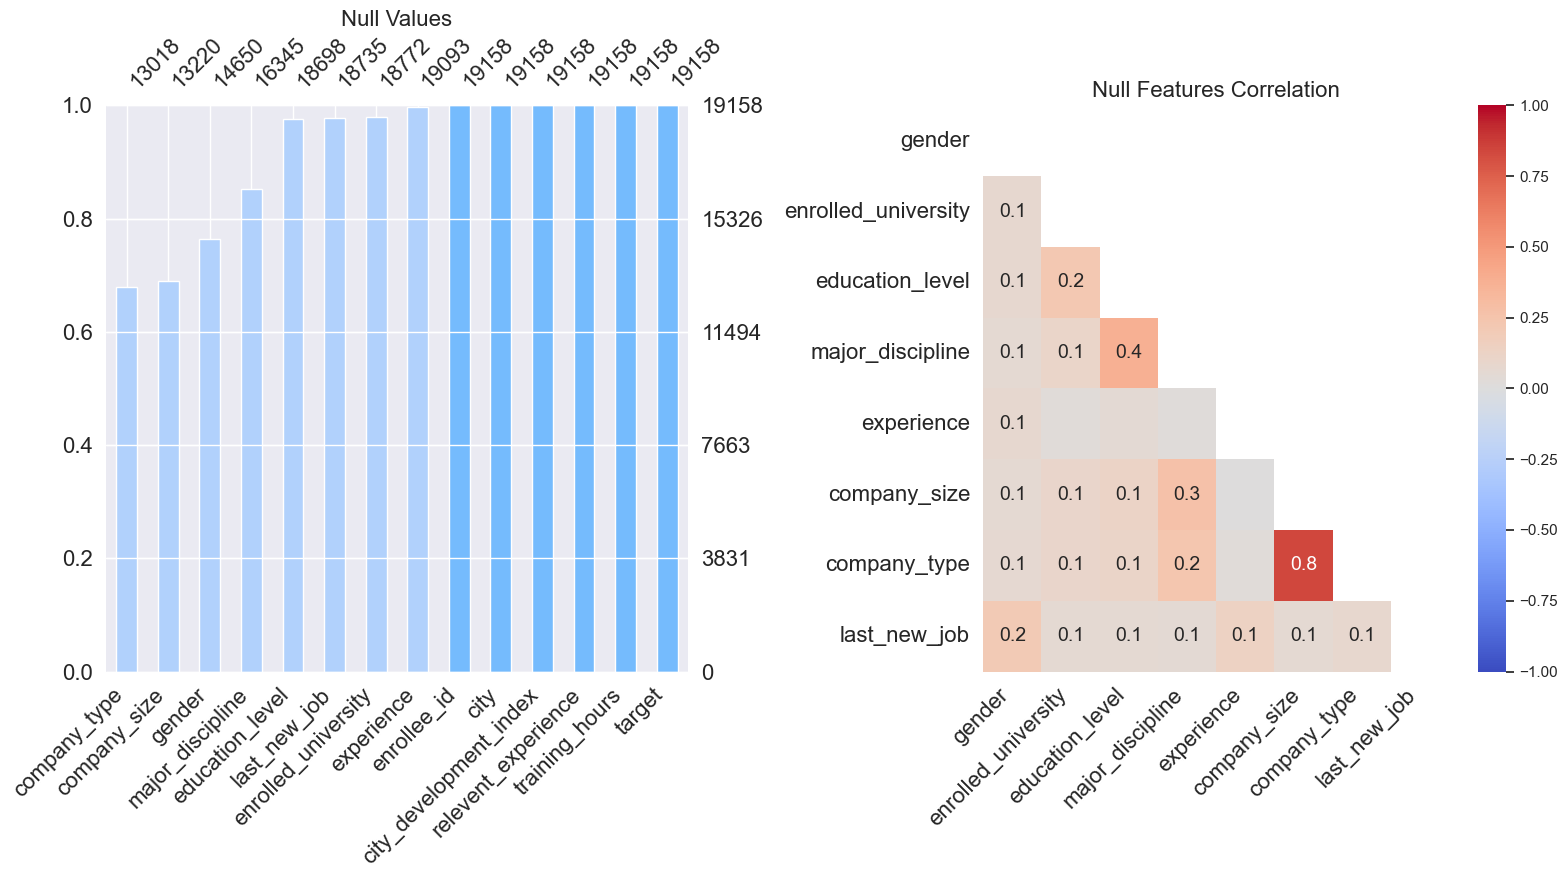

In [20]:
d = data.count().sort_values()
barpallete = ['xkcd:powder blue' if (x < max(d)) else 'xkcd:sky blue' for x in d]

f, ax = plt.subplots(1,2)
missingno.bar(data, color=barpallete, sort='ascending', ax=ax[0])
missingno.heatmap(data, cmap='coolwarm', ax=ax[1])
ax[0].set_title('Null Values')
ax[1].set_title('Null Features Correlation')
plt.tight_layout()

## **Correlation With Null Values**
Korelasi dicari menggunakan library dython berbasis feature selection ANOVA untuk menghitung korelasi antara Categorical-Numerical Features karena sebagaian besar features merupakan categorical features.

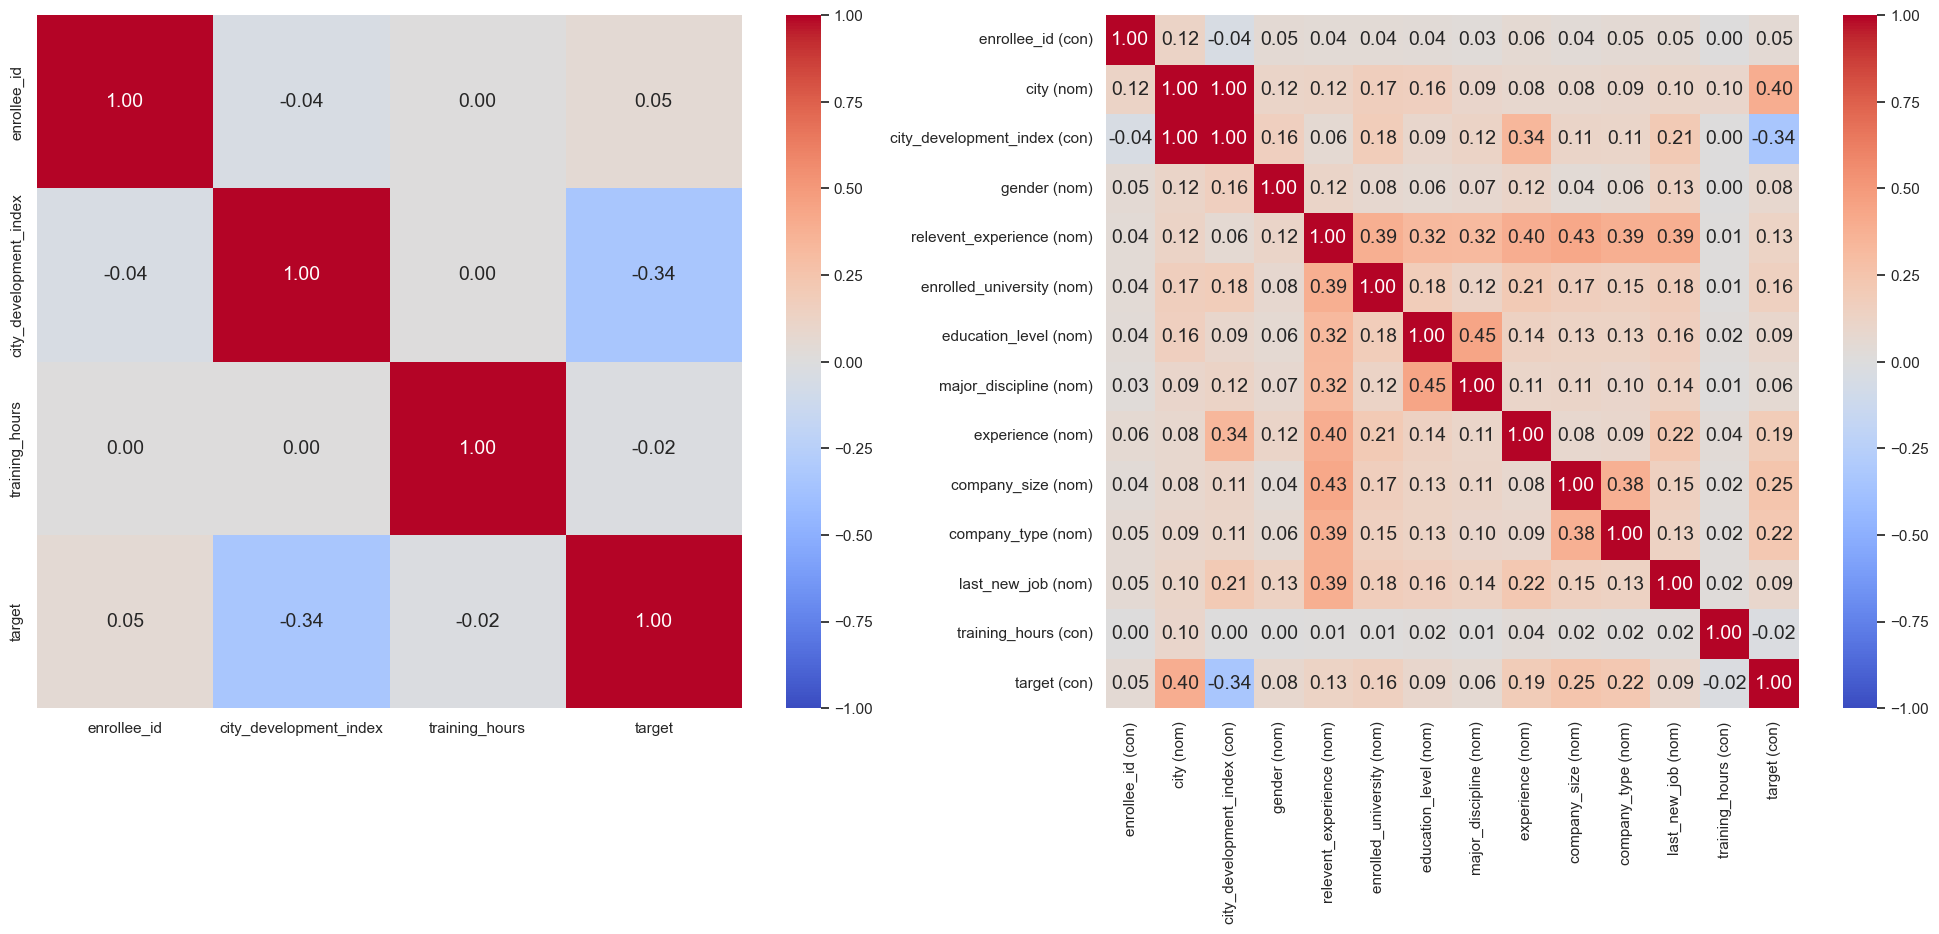

<Figure size 1600x900 with 0 Axes>

In [21]:
from dython import nominal

f, ax = plt.subplots(1,2,figsize=(25,9))
sns.heatmap(data.corr(), cmap='coolwarm', vmax=1, vmin=-1, ax=ax[0], annot=True, fmt='.2f')
nominal.associations(data, ax=ax[1], mark_columns=True, cmap='coolwarm');
plt.tight_layout()

## **Numerical**

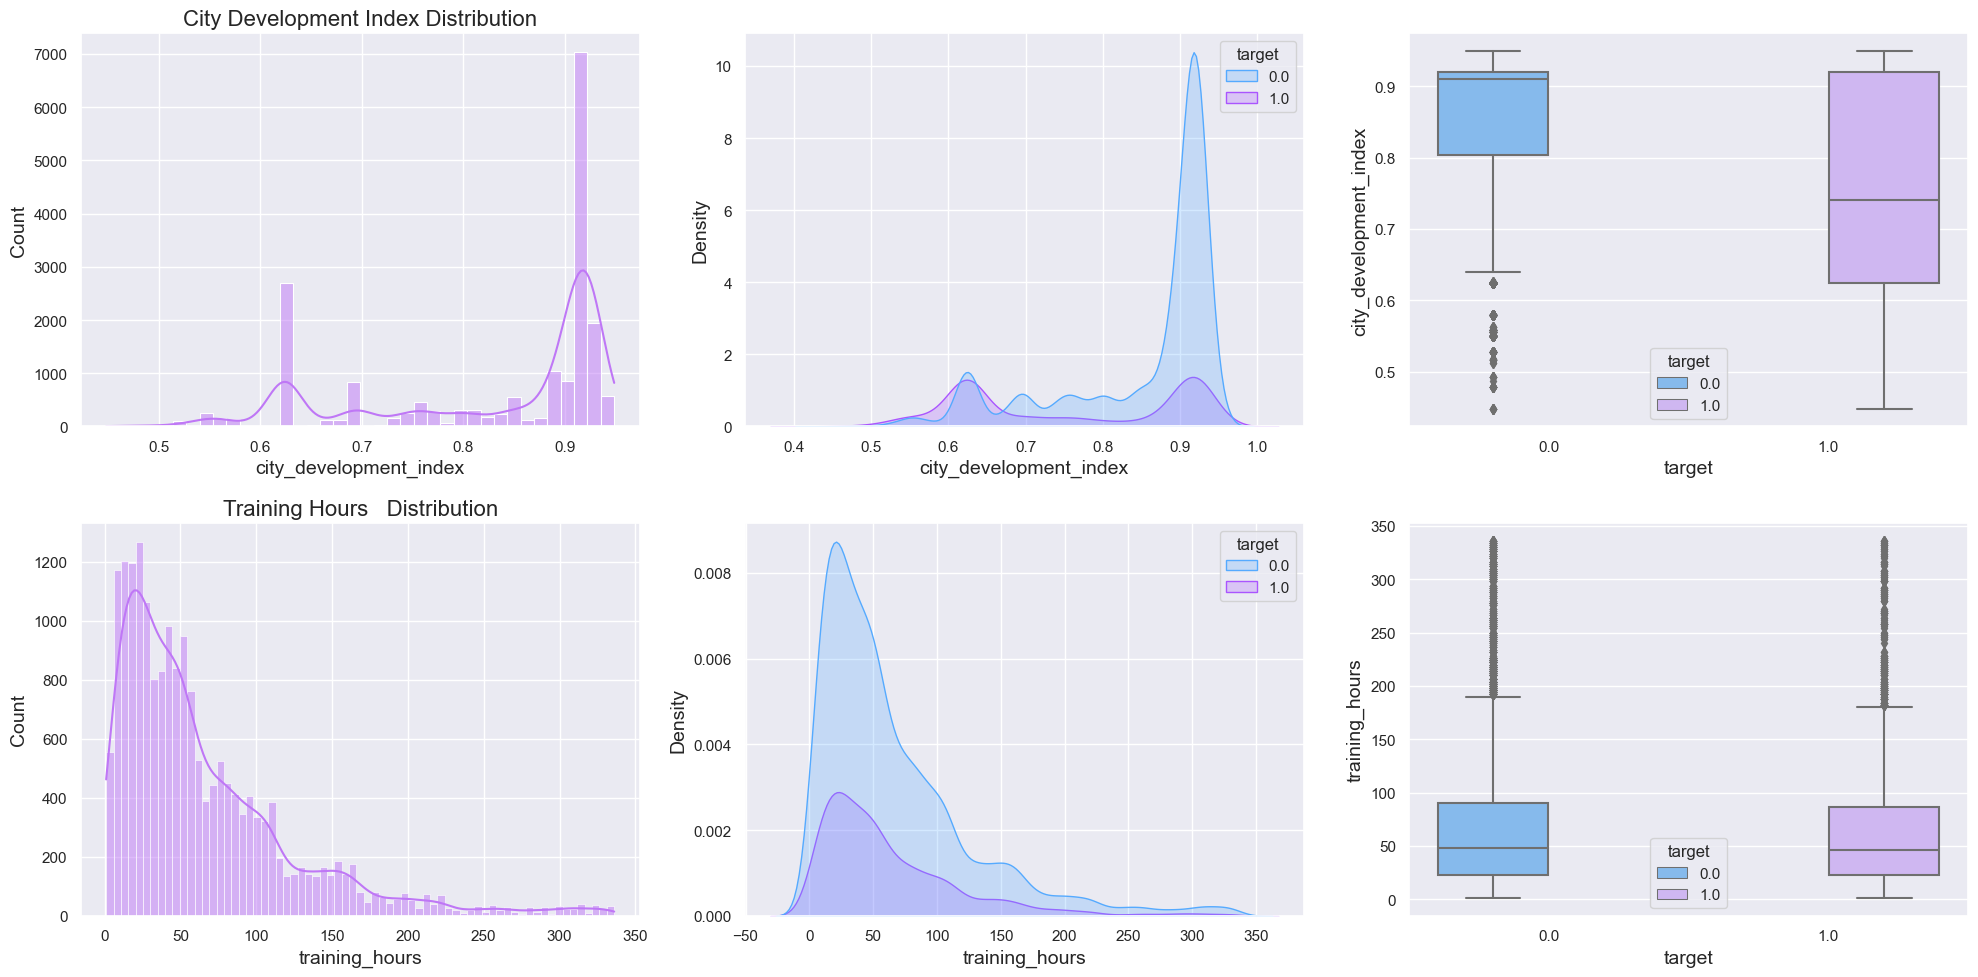

In [22]:
f, ax = plt.subplots(2,3, figsize=(20,10))
#
sns.histplot(ax=ax[0,0], data=data, x='city_development_index', kde=True, color=colorSet1_1).set(title='City Development Index Distribution')
sns.kdeplot(ax=ax[0,1], data=data, x='city_development_index', hue='target', palette='cool', shade=True)
sns.boxplot(ax=ax[0,2], data=data, x='target', y='city_development_index', hue='target', palette=['xkcd:sky blue', colorSet1_2])
#
sns.histplot(ax=ax[1,0], data=data, x='training_hours', kde=True, color=colorSet1_1).set(title='Training Hours   Distribution')
sns.kdeplot(ax=ax[1,1], data=data, x='training_hours', hue='target', palette='cool', shade=True)
sns.boxplot(ax=ax[1,2], data=data, x='target', y='training_hours', hue='target', palette=['xkcd:sky blue', colorSet1_2])
plt.tight_layout()

## **Categorical**

[(0.0, 100.0), Text(0.5, 1.0, 'Top Conversion Rate by City')]

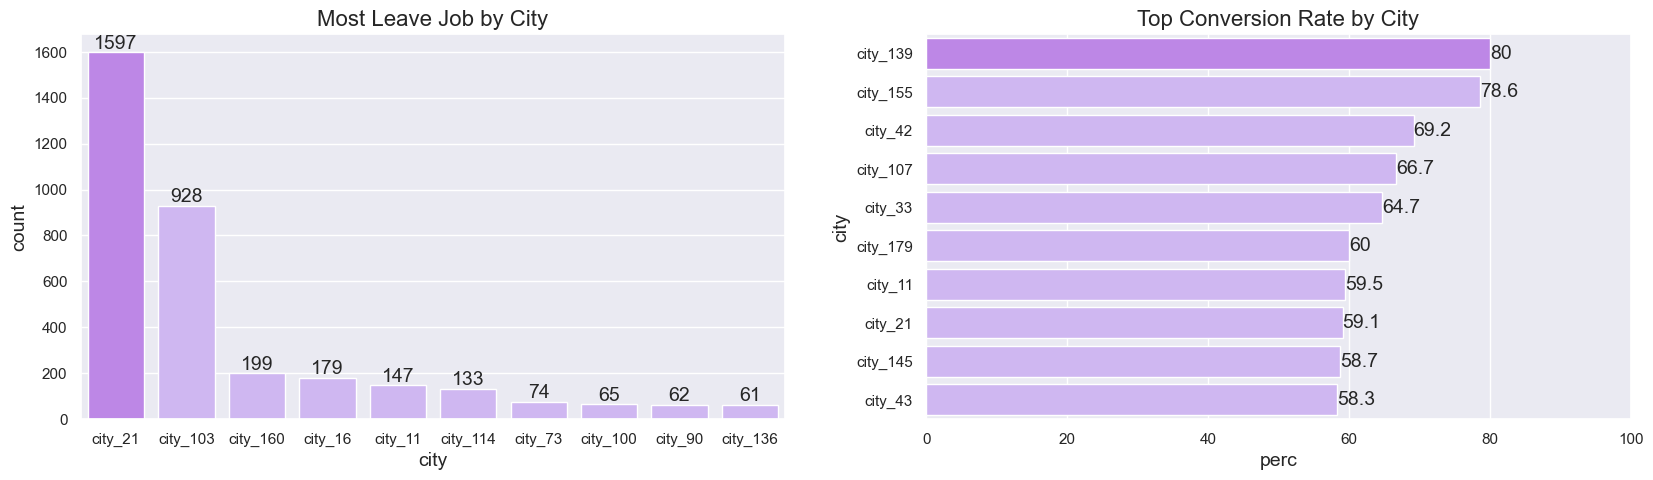

In [23]:
f, ax = plt.subplots(1,2, figsize=(20,5))

barpallete = [colorSet1_2 if (x < max(dataChurn.city.value_counts().head(10))) else colorSet1_1 for x in dataChurn.city.value_counts().head(10)]
d1 = data.groupby(['city','target']).city.count().unstack()
d1['perc'] = round((d1[1.0]/(d1[0.0]+d1[1.0]))*100,1)
d1 = d1.sort_values('perc', ascending=False).head(10).reset_index()
barpallete1 = [colorSet1_2 if (x < max(d1.perc)) else colorSet1_1 for x in d1.perc]

sns.countplot(ax=ax[0], data=dataChurn, x='city', order=dataChurn.city.value_counts().head(10).index, palette=barpallete).set(title='Most Leave Job by City')
sns.barplot(ax=ax[1], data=d1, y='city', x='perc', palette=barpallete1)
ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])
ax[1].set(xlim=[0, 100], title='Top Conversion Rate by City')

In [24]:
dataDummy = data.copy()
dataDummy.gender = dataDummy.gender.fillna('n/a')
dataDummy.relevent_experience = dataDummy.relevent_experience.fillna('n/a')
dataDummy.enrolled_university = dataDummy.enrolled_university.fillna('n/a')
dataDummy.education_level = dataDummy.education_level.fillna('n/a')
dataDummy.major_discipline = dataDummy.major_discipline.fillna('n/a')
dataDummy.experience = dataDummy.experience.fillna('n/a')
dataDummy.company_size = dataDummy.company_size.fillna('n/a')
dataDummy.company_type = dataDummy.company_type.fillna('n/a')
dataDummy.last_new_job = dataDummy.last_new_job.fillna('n/a')

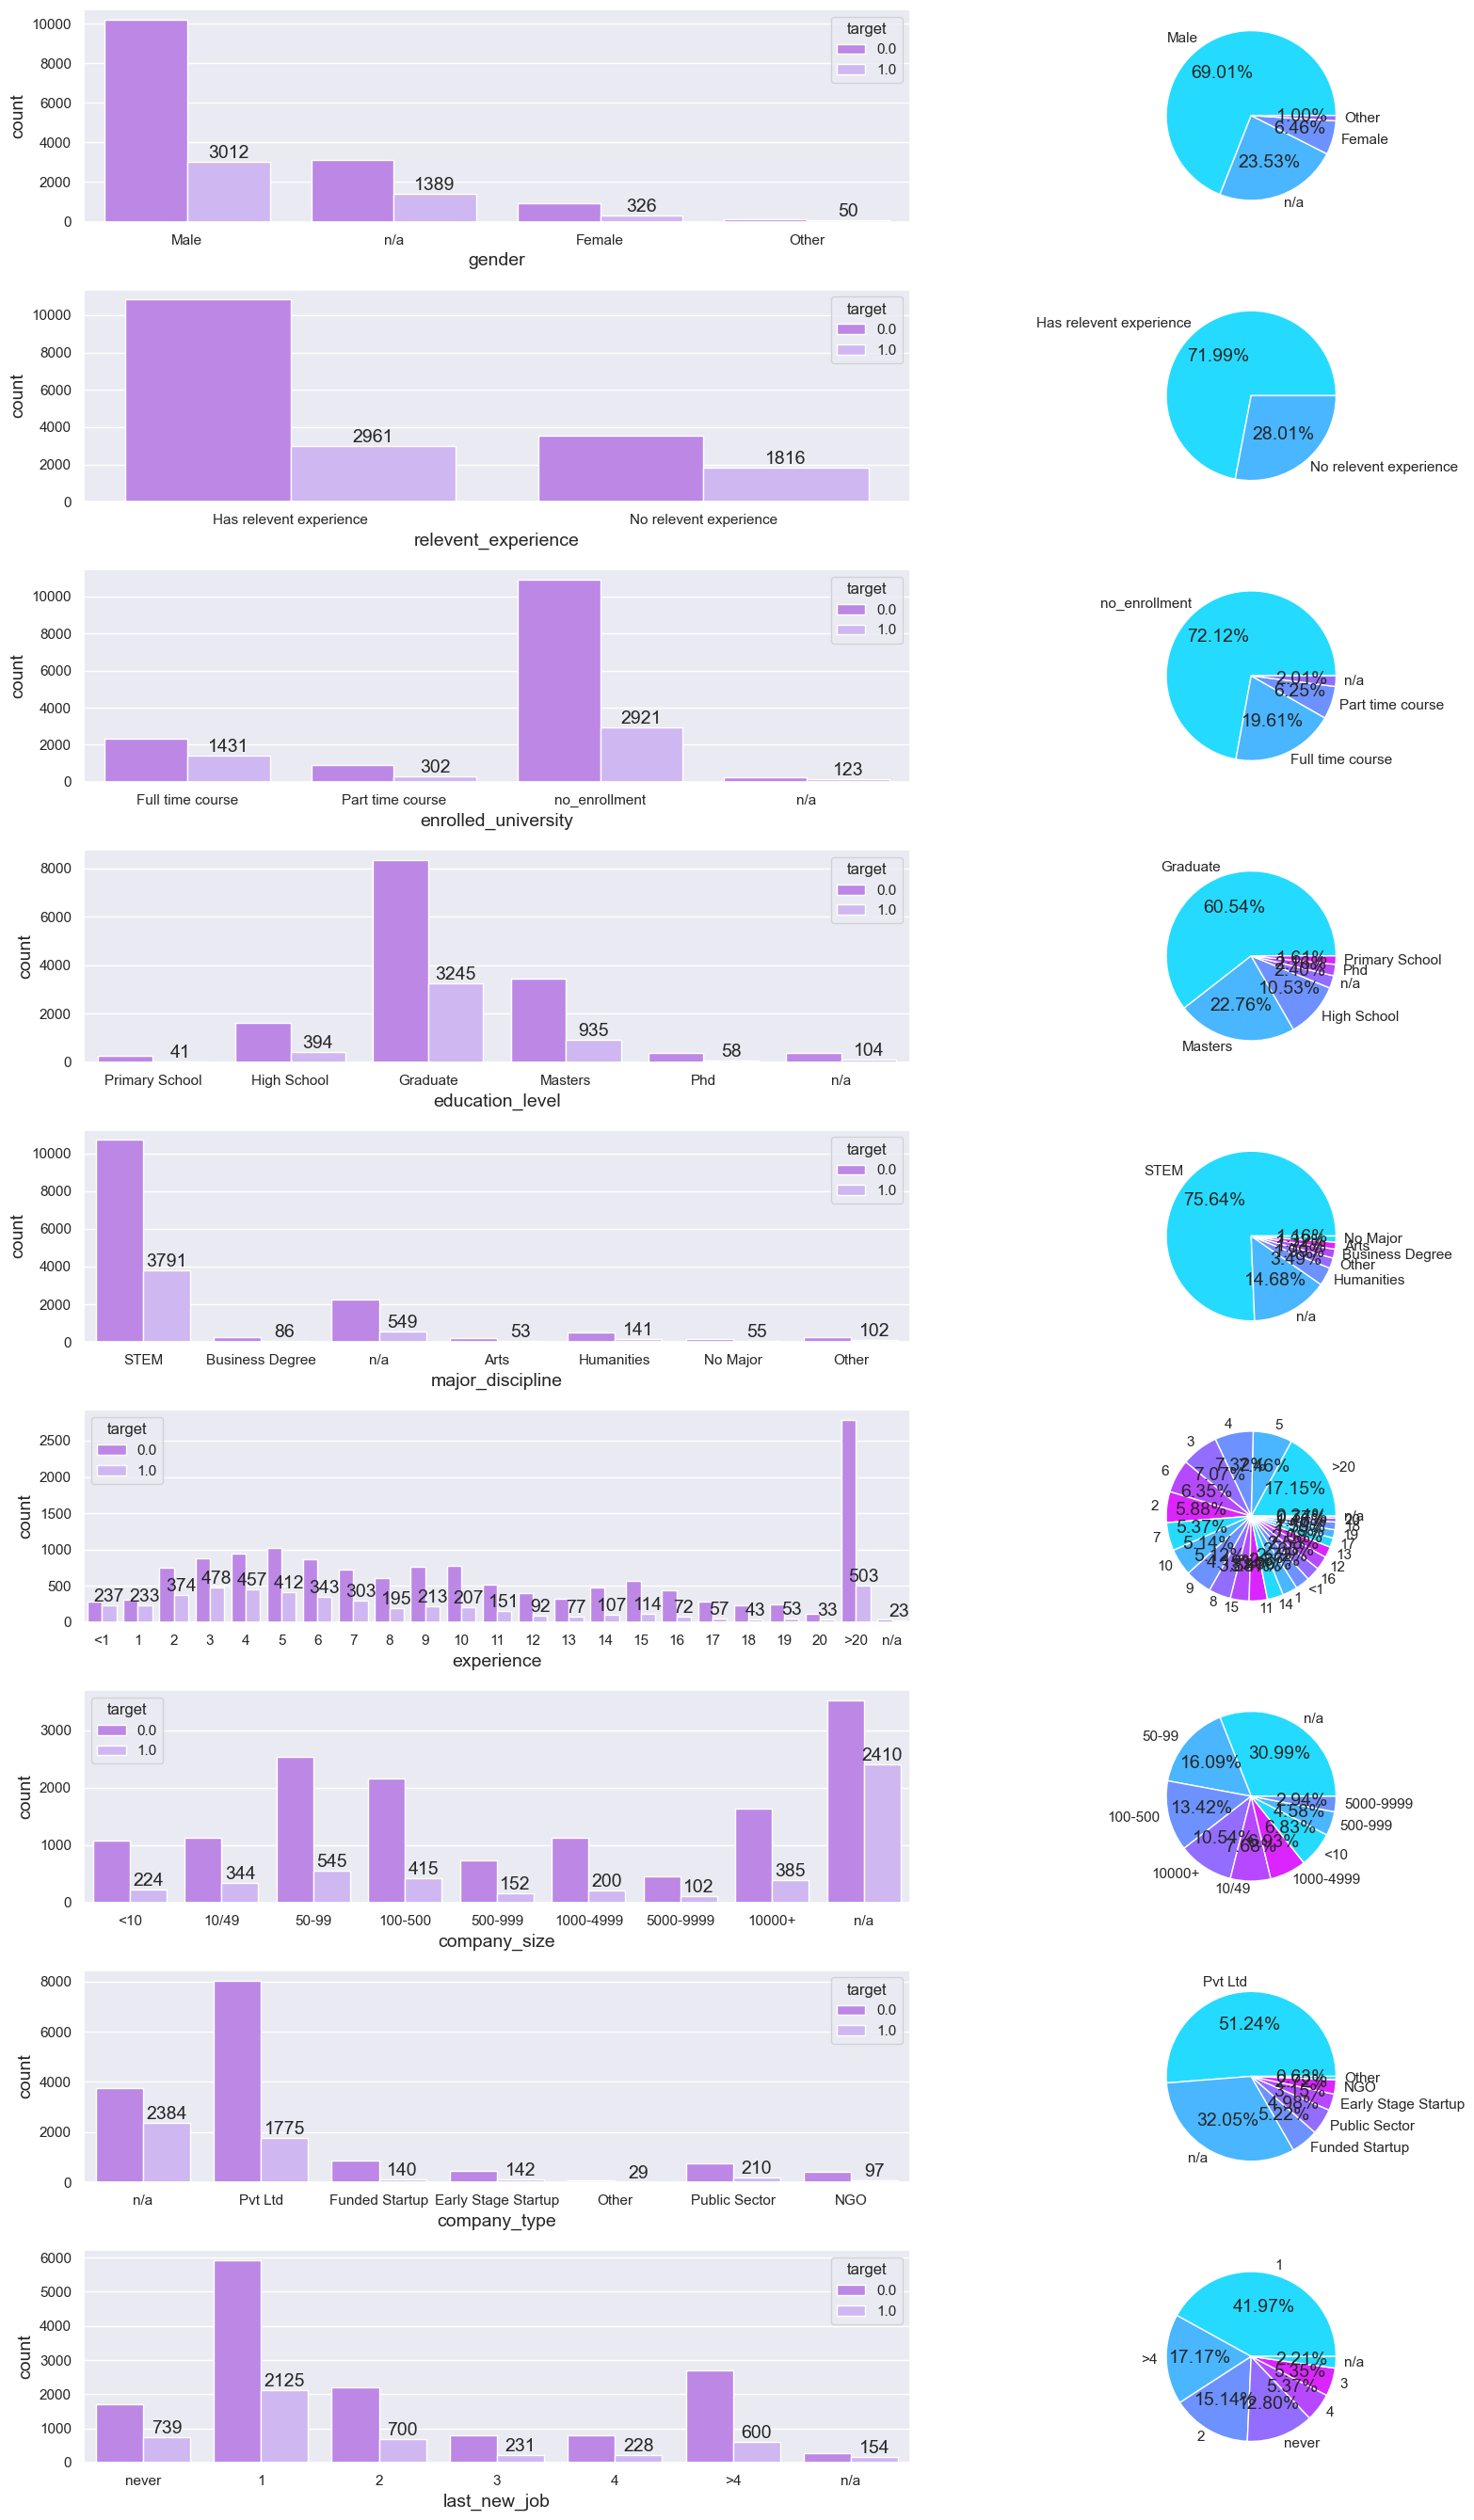

In [25]:
f, ax = plt.subplots(9,2, figsize=(18,27))
#
sns.countplot(ax=ax[0,0], data=dataDummy, x='gender', hue='target', palette=[colorSet1_1,colorSet1_2])
plt.subplot2grid((9,2),(0,1))
plt.pie(dataDummy.gender.value_counts().values, labels=dataDummy.gender.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
# ax[0,0].bar_label(ax[0,0].containers[0])
ax[0,0].bar_label(ax[0,0].containers[1])
#
sns.countplot(ax=ax[1,0], data=dataDummy, x='relevent_experience', hue='target', palette=[colorSet1_1,colorSet1_2])
plt.subplot2grid((9,2),(1,1))
plt.pie(dataDummy.relevent_experience.value_counts().values, labels=dataDummy.relevent_experience.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
# ax[1,0].bar_label(ax[1,0].containers[0])
ax[1,0].bar_label(ax[1,0].containers[1])
#
sns.countplot(ax=ax[2,0], data=dataDummy, x='enrolled_university', hue='target', palette=[colorSet1_1,colorSet1_2],
              order=['Full time course', 'Part time course', 'no_enrollment', 'n/a'])
plt.subplot2grid((9,2),(2,1))
plt.pie(dataDummy.enrolled_university.value_counts().values, labels=dataDummy.enrolled_university.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
# ax[2,0].bar_label(ax[2,0].containers[0])
ax[2,0].bar_label(ax[2,0].containers[1])
#
sns.countplot(ax=ax[3,0], data=dataDummy, x='education_level', hue='target', palette=[colorSet1_1,colorSet1_2],
              order=['Primary School','High School','Graduate','Masters','Phd','n/a'])
plt.subplot2grid((9,2),(3,1))
plt.pie(dataDummy.education_level.value_counts().values, labels=dataDummy.education_level.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
# ax[3,0].bar_label(ax[3,0].containers[0])
ax[3,0].bar_label(ax[3,0].containers[1])
#
sns.countplot(ax=ax[4,0], data=dataDummy, x='major_discipline', hue='target', palette=[colorSet1_1,colorSet1_2])
plt.subplot2grid((9,2),(4,1))
plt.pie(dataDummy.major_discipline.value_counts().values, labels=dataDummy.major_discipline.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
# ax[4,0].bar_label(ax[4,0].containers[0])
ax[4,0].bar_label(ax[4,0].containers[1])
#
sns.countplot(ax=ax[5,0], data=dataDummy, x='experience', hue='target', palette=[colorSet1_1,colorSet1_2],
              order=['<1', '1', '2', '3', '4','5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15','16', '17', '18', '19', '20', '>20', 'n/a'])
plt.subplot2grid((9,2),(5,1))
plt.pie(dataDummy.experience.value_counts().values, labels=dataDummy.experience.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
# ax[5,0].bar_label(ax[5,0].containers[0])
ax[5,0].bar_label(ax[5,0].containers[1])
#
sns.countplot(ax=ax[6,0], data=dataDummy, x='company_size', hue='target', palette=[colorSet1_1,colorSet1_2],
              order=['<10','10/49','50-99','100-500','500-999','1000-4999','5000-9999','10000+','n/a'])
plt.subplot2grid((9,2),(6,1))
plt.pie(dataDummy.company_size.value_counts().values, labels=dataDummy.company_size.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
# ax[6,0].bar_label(ax[6,0].containers[0])
ax[6,0].bar_label(ax[6,0].containers[1])
#
sns.countplot(ax=ax[7,0], data=dataDummy, x='company_type', hue='target', palette=[colorSet1_1,colorSet1_2])
plt.subplot2grid((9,2),(7,1))
plt.pie(dataDummy.company_type.value_counts().values, labels=dataDummy.company_type.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
# ax[7,0].bar_label(ax[7,0].containers[0])
ax[7,0].bar_label(ax[7,0].containers[1])
#
sns.countplot(ax=ax[8,0], data=dataDummy, x='last_new_job', hue='target', palette=[colorSet1_1,colorSet1_2],
              order=['never', '1', '2', '3', '4', '>4', 'n/a'])
plt.subplot2grid((9,2),(8,1))
plt.pie(dataDummy.last_new_job.value_counts().values, labels=dataDummy.last_new_job.value_counts().index, colors=sns.color_palette('cool'), autopct='%.2f%%')
# ax[8,0].bar_label(ax[8,0].containers[0])
ax[8,0].bar_label(ax[8,0].containers[1])

plt.tight_layout()

# **DATA PREPROCESSING**

## **Data Cleansing**

In [26]:
dataPre = data.copy()
dataPre.rename(columns={'relevent_experience': 'relevant_experience'}, inplace=True)
dataPre.drop(['enrollee_id'], axis=1, inplace=True)

In [158]:
def toCleanString(df, cols): 
  for value in cols:
    df[value] = df[value].str.replace('_', '').str.replace(' ', '').str.lower()
  df.company_size = np.where(df.company_size=='10/49', '10-49', np.where(df.company_size=='10000+', '>10000', df.company_size))
  return df

In [28]:
catColumns = [x for x in dataPre.columns if dataPre[x].dtype == 'object']
dataPre = toCleanString(dataPre, catColumns)
# dataPre.company_size = np.where(dataPre.company_size=='10/49', '10-49', np.where(dataPre.company_size=='10000+', '>10000', dataPre.company_size))

In [29]:
dataPre

city  city_development_index gender    relevant_experience  \
0      city103                   0.920   male  hasreleventexperience   
1       city40                   0.776   male   noreleventexperience   
2       city21                   0.624    NaN   noreleventexperience   
3      city115                   0.789    NaN   noreleventexperience   
4      city162                   0.767   male  hasreleventexperience   
...        ...                     ...    ...                    ...   
19153  city173                   0.878   male   noreleventexperience   
19154  city103                   0.920   male  hasreleventexperience   
19155  city103                   0.920   male  hasreleventexperience   
19156   city65                   0.802   male  hasreleventexperience   
19157   city67                   0.855    NaN   noreleventexperience   

      enrolled_university education_level major_discipline experience  \
0            noenrollment        graduate             stem        >20   
1            noenrollment        graduate             stem         15   
2          fulltimecourse        graduate             stem          5   
3                     NaN        graduate   businessdegree         <1   
4            noenrollment         masters             stem        >20   
...                   ...             ...              ...        ...   
19153        noenrollment        graduate       humanities         14   
19154        noenrollment        graduate             stem         14   
19155        noenrollment        graduate             stem        >20   
19156        noenrollment      highschool              NaN         <1   
19157        noenrollment   primaryschool              NaN          2   

      company_size   company_type last_new_job  training_hours  target  
0              NaN            NaN            1              36     1.0  
1            50-99         pvtltd           >4              47     0.0  
2              NaN            NaN        never              83     0.0  
3              NaN         pvtltd        never              52     1.0  
4            50-99  fundedstartup            4               8     0.0  
...            ...            ...          ...             ...     ...  
19153          NaN            NaN            1              42     1.0  
19154          NaN            NaN            4              52     1.0  
19155        50-99         pvtltd            4              44     0.0  
19156      500-999         pvtltd            2              97     0.0  
19157          NaN            NaN            1             127     0.0  

[19158 rows x 13 columns]

## **Feature Encoding - Label Encoding**

In [30]:
labelColumns = []
oheColumns = []
for value in catColumns:
  if value in ['city', 'gender', 'major_discipline', 'company_type']:
    oheColumns.append(value)
  else: labelColumns.append(value)

In [31]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders import OrdinalEncoder

def toOhe(data, cols):
  ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
  ohe.fit(data[cols])
  dfOhe = pd.DataFrame(ohe.transform(data[cols]), columns=ohe.get_feature_names_out())
  data = pd.concat([data.reset_index(drop=True), dfOhe], axis=1).drop(columns=cols)
  return data

def toOrdinalEncoding(data, cols, mapping):
  oe = OrdinalEncoder(cols=cols, mapping=mapping, handle_missing='value', handle_unknown='return_nan')
  oe.fit(data[cols])
  dfOe = pd.DataFrame(oe.transform(data[cols]), columns=oe.get_feature_names())
  data = data.drop(columns=cols)
  data = pd.concat([data.reset_index(drop=True), dfOe.reset_index(drop=True)], axis=1)
  return data

def toLabelEncoding(data, cols):
  for value in cols:
    data[value] = LabelEncoder().fit_transform(data[value])
  return data

mappingLabel = [{
    'col': 'relevant_experience', 
    'mapping': {
      'noreleventexperience': 0, 
      'hasreleventexperience': 1 
  }}, {
    'col': 'enrolled_university', 
    'mapping': {
      'noenrollment': 0,
      'parttimecourse': 1,
      'fulltimecourse': 2
  }}, {
    'col': 'education_level', 
    'mapping': {
      'primaryschool': 0,
      'highschool': 1,
      'graduate': 2,
      'masters': 3,
      'phd': 4
  }}, {
    'col': 'experience', 
    'mapping': {
      '<1': 0, '1': 1, '2': 2, '3': 3,'4': 4,
      '5': 5, '6': 6, '7': 7, '8': 8,'9': 9,
      '10': 10, '11': 11, '12': 12, '13': 13,'14': 14,
      '15': 15, '16': 16, '17': 17, '18': 18,'19': 19,'20': 20,'>20':21
  }}, {
    'col': 'company_size', 
    'mapping': {
      '<10': 0,
      '10-49': 1,
      '50-99': 2,
      '100-500': 3,
      '500-999': 4,
      '1000-4999': 5,
      '5000-9999': 6,
      '>10000': 7
  }}, {
    'col': 'last_new_job', 
    'mapping': {
      'never': 0,
      '1': 1,
      '2': 2,
      '3': 3,
      '4': 4,
      '>4': 5
  }}]

In [32]:
#label encoding
dataPre = toOrdinalEncoding(dataPre, catColumns, mappingLabel)
# dataPre = toLabelEncoding(dataPre, ['city'])

#one-hot encoding nnti setelah missing values
## label encoding sementara untuk handle missing value setelah itu akan di-inverse untuk OHE
leCity = LabelEncoder()
leGender = LabelEncoder()
leMajorDiscipline = LabelEncoder()
leCompanyType = LabelEncoder()
dataPre.city = leCity.fit_transform(dataPre.city)
dataPre.gender = leGender.fit_transform(dataPre.gender) 
dataPre.major_discipline = leMajorDiscipline.fit_transform(dataPre.major_discipline) 
dataPre.company_type = leCompanyType.fit_transform(dataPre.company_type)
## label to nan
dataPre.gender = np.where(dataPre.gender==len(leGender.classes_)-1, np.nan, dataPre.gender)
dataPre.city = np.where(dataPre.city==len(leCity.classes_)-1, np.nan, dataPre.city)
dataPre.major_discipline = np.where(dataPre.major_discipline==len(leMajorDiscipline.classes_)-1, np.nan, dataPre.major_discipline)
dataPre.company_type = np.where(dataPre.company_type==len(leCompanyType.classes_)-1, np.nan, dataPre.company_type)

In [33]:
dataPre

city_development_index  training_hours  target  city  gender  \
0                       0.920              36     1.0   5.0     1.0   
1                       0.776              47     0.0  77.0     1.0   
2                       0.624              83     0.0  64.0     NaN   
3                       0.789              52     1.0  14.0     NaN   
4                       0.767               8     0.0  50.0     1.0   
...                       ...             ...     ...   ...     ...   
19153                   0.878              42     1.0  55.0     1.0   
19154                   0.920              52     1.0   5.0     1.0   
19155                   0.920              44     0.0   5.0     1.0   
19156                   0.802              97     0.0  94.0     1.0   
19157                   0.855             127     0.0  95.0     NaN   

       relevant_experience  enrolled_university  education_level  \
0                        1                  0.0              2.0   
1                        0                  0.0              2.0   
2                        0                  2.0              2.0   
3                        0                  NaN              2.0   
4                        1                  0.0              3.0   
...                    ...                  ...              ...   
19153                    0                  0.0              2.0   
19154                    1                  0.0              2.0   
19155                    1                  0.0              2.0   
19156                    1                  0.0              1.0   
19157                    0                  0.0              0.0   

       major_discipline  experience  company_size  company_type  last_new_job  
0                   5.0        21.0           NaN           NaN           1.0  
1                   5.0        15.0           2.0           5.0           5.0  
2                   5.0         5.0           NaN           NaN           0.0  
3                   1.0         0.0           NaN           5.0           0.0  
4                   5.0        21.0           2.0           1.0           4.0  
...                 ...         ...           ...           ...           ...  
19153               2.0        14.0           NaN           NaN           1.0  
19154               5.0        14.0           NaN           NaN           4.0  
19155               5.0        21.0           2.0           5.0           4.0  
19156               NaN         0.0           4.0           5.0           2.0  
19157               NaN         2.0           NaN           NaN           1.0  

[19158 rows x 13 columns]

## **Handle Missing Value For Categorical**

In [34]:
from sklearn.impute import KNNImputer

numOfNeighbors = 3
knnImputer = KNNImputer(n_neighbors=numOfNeighbors)

In [35]:
numericalColumns = ['city_development_index','training_hours','target']
dataCategorical = dataPre[[x for x in dataPre.columns if x not in numericalColumns]]
dataCategoricalNonMissing = knnImputer.fit_transform(dataCategorical)
dataPreCategoricalNonMissing = pd.DataFrame(np.intc(np.round(dataCategoricalNonMissing)), columns=dataCategorical.columns)
dataPreNonMissing = pd.concat([dataPre[numericalColumns], dataPreCategoricalNonMissing], axis=1)
dataPreNonMissing

city_development_index  training_hours  target  city  gender  \
0                       0.920              36     1.0     5       1   
1                       0.776              47     0.0    77       1   
2                       0.624              83     0.0    64       1   
3                       0.789              52     1.0    14       1   
4                       0.767               8     0.0    50       1   
...                       ...             ...     ...   ...     ...   
19153                   0.878              42     1.0    55       1   
19154                   0.920              52     1.0     5       1   
19155                   0.920              44     0.0     5       1   
19156                   0.802              97     0.0    94       1   
19157                   0.855             127     0.0    95       1   

       relevant_experience  enrolled_university  education_level  \
0                        1                    0                2   
1                        0                    0                2   
2                        0                    2                2   
3                        0                    1                2   
4                        1                    0                3   
...                    ...                  ...              ...   
19153                    0                    0                2   
19154                    1                    0                2   
19155                    1                    0                2   
19156                    1                    0                1   
19157                    0                    0                0   

       major_discipline  experience  company_size  company_type  last_new_job  
0                     5          21             2             2             1  
1                     5          15             2             5             5  
2                     5           5             0             3             0  
3                     1           0             2             5             0  
4                     5          21             2             1             4  
...                 ...         ...           ...           ...           ...  
19153                 2          14             3             4             1  
19154                 5          14             4             5             4  
19155                 5          21             2             5             4  
19156                 4           0             4             5             2  
19157                 4           2             1             4             1  

[19158 rows x 13 columns]

## **Feature Encoding - OHE**

In [36]:
dataPreNonMissing.city = leCity.inverse_transform(dataPreNonMissing.city)
dataPreNonMissing.gender = leGender.inverse_transform(dataPreNonMissing.gender)
dataPreNonMissing.major_discipline = leMajorDiscipline.inverse_transform(dataPreNonMissing.major_discipline)
dataPreNonMissing.company_type = leCompanyType.inverse_transform(dataPreNonMissing.company_type)

In [37]:
print('NULL VALUES:')
print(dataPreNonMissing.isnull().sum())
dataPreNonMissing

NULL VALUES:
city_development_index    0
training_hours            0
target                    0
city                      0
gender                    0
relevant_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
dtype: int64


city_development_index  training_hours  target     city gender  \
0                       0.920              36     1.0  city103   male   
1                       0.776              47     0.0   city40   male   
2                       0.624              83     0.0   city21   male   
3                       0.789              52     1.0  city115   male   
4                       0.767               8     0.0  city162   male   
...                       ...             ...     ...      ...    ...   
19153                   0.878              42     1.0  city173   male   
19154                   0.920              52     1.0  city103   male   
19155                   0.920              44     0.0  city103   male   
19156                   0.802              97     0.0   city65   male   
19157                   0.855             127     0.0   city67   male   

       relevant_experience  enrolled_university  education_level  \
0                        1                    0                2   
1                        0                    0                2   
2                        0                    2                2   
3                        0                    1                2   
4                        1                    0                3   
...                    ...                  ...              ...   
19153                    0                    0                2   
19154                    1                    0                2   
19155                    1                    0                2   
19156                    1                    0                1   
19157                    0                    0                0   

      major_discipline  experience  company_size   company_type  last_new_job  
0                 stem          21             2            ngo             1  
1                 stem          15             2         pvtltd             5  
2                 stem           5             0          other             0  
3       businessdegree           0             2         pvtltd             0  
4                 stem          21             2  fundedstartup             4  
...                ...         ...           ...            ...           ...  
19153       humanities          14             3   publicsector             1  
19154             stem          14             4         pvtltd             4  
19155             stem          21             2         pvtltd             4  
19156            other           0             4         pvtltd             2  
19157            other           2             1   publicsector             1  

[19158 rows x 13 columns]

In [38]:
# OHE
dataPreNonMissing = toOhe(data=dataPreNonMissing, cols=oheColumns)
dataPreNonMissing

city_development_index  training_hours  target  relevant_experience  \
0                       0.920              36     1.0                    1   
1                       0.776              47     0.0                    0   
2                       0.624              83     0.0                    0   
3                       0.789              52     1.0                    0   
4                       0.767               8     0.0                    1   
...                       ...             ...     ...                  ...   
19153                   0.878              42     1.0                    0   
19154                   0.920              52     1.0                    1   
19155                   0.920              44     0.0                    1   
19156                   0.802              97     0.0                    1   
19157                   0.855             127     0.0                    0   

       enrolled_university  education_level  experience  company_size  \
0                        0                2          21             2   
1                        0                2          15             2   
2                        2                2           5             0   
3                        1                2           0             2   
4                        0                3          21             2   
...                    ...              ...         ...           ...   
19153                    0                2          14             3   
19154                    0                2          14             4   
19155                    0                2          21             2   
19156                    0                1           0             4   
19157                    0                0           2             1   

       last_new_job  city_city1  ...  major_discipline_humanities  \
0                 1         0.0  ...                          0.0   
1                 5         0.0  ...                          0.0   
2                 0         0.0  ...                          0.0   
3                 0         0.0  ...                          0.0   
4                 4         0.0  ...                          0.0   
...             ...         ...  ...                          ...   
19153             1         0.0  ...                          1.0   
19154             4         0.0  ...                          0.0   
19155             4         0.0  ...                          0.0   
19156             2         0.0  ...                          0.0   
19157             1         0.0  ...                          0.0   

       major_discipline_nomajor  major_discipline_other  \
0                           0.0                     0.0   
1                           0.0                     0.0   
2                           0.0                     0.0   
3                           0.0                     0.0   
4                           0.0                     0.0   
...                         ...                     ...   
19153                       0.0                     0.0   
19154                       0.0                     0.0   
19155                       0.0                     0.0   
19156                       0.0                     1.0   
19157                       0.0                     1.0   

       major_discipline_stem  company_type_earlystagestartup  \
0                        1.0                             0.0   
1                        1.0                             0.0   
2                        1.0                             0.0   
3                        0.0                             0.0   
4                        1.0                             0.0   
...                      ...                             ...   
19153                    0.0                             0.0   
19154                    1.0                             0.0   
19155                    1.0                             0.0   
19156          

# **MODELING**

In [39]:
# Logistic Regression, SVC, Random Forest, dll
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

## **Evaluation Metrics**

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

randomState = 0
testSize = 0.33
numOfNeighbors = 5
numOfFold = 5

models = {
    'logistic_regression': LogisticRegression(),
    'svc': SVC(probability=True),
    'random_forest': RandomForestClassifier(),
    'decision_tree': DecisionTreeClassifier(),
    'knn': KNeighborsClassifier(n_neighbors=numOfNeighbors),
    'gaussian_naive_bayes': GaussianNB(),
    'multinomial_naive_bayes': MultinomialNB(),
    'complement_naive_bayes': ComplementNB(),
    'bernoulli_naive_bayes': BernoulliNB(),
    'xgb': XGBClassifier(objective ='reg:squarederror'),
    'neural_network': MLPClassifier()
}

def compareBestModelFunc(xTrain, yTrain, xTest, yTest, modelArr):
  scores = []
  columns = ['algorithm', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'roc_auc_score']
  for index, model in modelArr.items():
    model.fit(xTrain, yTrain)
    yPred = model.predict(xTest)
    accuracy = accuracy_score(yTest, yPred)
    precision = precision_score(yTest, yPred)
    recall = recall_score(yTest, yPred)
    f1 = f1_score(yTest, yPred)
    yTestPredProb = model.predict_proba(xTest)
    rocAuc = roc_auc_score(yTest, yTestPredProb[:,-1])
    scores.append([index, round(accuracy,5), round(precision,5), round(recall,5), round(f1,5), round(rocAuc,5)])
  return pd.DataFrame(scores, columns=columns)

def compareTrainTestScore(xTrain, yTrain, xTest, yTest, model):
  return 'ea'

In [41]:
from sklearn.model_selection import train_test_split

x = dataPreNonMissing.drop(['target'], axis=1)
y = dataPreNonMissing.target 

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=testSize, random_state=randomState)

In [42]:
compareModel = compareBestModelFunc(xTrain, yTrain, xTest, yTest, models)

In [43]:
compareModelBy = {
  'accuracy': compareModel.sort_values(['accuracy_score'], ascending=False),
  'precision': compareModel.sort_values(['precision_score'], ascending=False),
  'recall': compareModel.sort_values(['recall_score'], ascending=False),
  'f1': compareModel.sort_values(['f1_score'], ascending=False),
  'roc_auc': compareModel.sort_values(['roc_auc_score'], ascending=False),
}
compareModel

algorithm  accuracy_score  precision_score  recall_score  \
0       logistic_regression         0.77590          0.60276       0.32895   
1                       svc         0.74759          0.00000       0.00000   
2             random_forest         0.76404          0.54906       0.36466   
3             decision_tree         0.69619          0.39709       0.39286   
4                       knn         0.71944          0.39199       0.20238   
5      gaussian_naive_bayes         0.44552          0.29436       0.85652   
6   multinomial_naive_bayes         0.68401          0.39703       0.48559   
7    complement_naive_bayes         0.62597          0.36360       0.64223   
8     bernoulli_naive_bayes         0.76498          0.55511       0.34712   
9                       xgb         0.76277          0.54181       0.38972   
10           neural_network         0.75265          0.51057       0.48434   

    f1_score  roc_auc_score  
0    0.42562        0.75118  
1    0.00000        0.70595  
2    0.43825        0.74018  
3    0.39496        0.59553  
4    0.26694        0.59392  
5    0.43814        0.70504  
6    0.43687        0.66154  
7    0.46433        0.66154  
8    0.42714        0.74836  
9    0.45335        0.74618  
10   0.49711        0.73024

In [44]:
def compareModelPlot(data, figsize=(12,6.75), palette='cool', onlyMae=False, onlyRmse=False, onlyR2Score=False, xMae='mae', yMae='model_type', xRmse='rmse', yRmse='model_type', yR2Score='model_type', xR2Score='r2_score', isType=False):
  f, ax = plt.subplots(5, 1, figsize=figsize)
  barpalleteBy = {
    'accuracy': [colorSet1_2 if (x < max(data['accuracy'].accuracy_score)) else colorSet1_1 for x in data['accuracy'].accuracy_score],
    'precision': [colorSet1_2 if (x < max(data['precision'].precision_score)) else colorSet1_1 for x in data['precision'].precision_score],
    'recall': [colorSet1_2 if (x < max(data['recall'].recall_score)) else colorSet1_1 for x in data['recall'].recall_score],
    'f1': [colorSet1_2 if (x < max(data['f1'].f1_score)) else colorSet1_1 for x in data['f1'].f1_score],
    'roc_auc': [colorSet1_2 if (x < max(data['roc_auc'].roc_auc_score)) else colorSet1_1 for x in data['roc_auc'].roc_auc_score],
  }
  types = lambda x: 'type' if isType else 'algorithm'
  sns.barplot(ax=ax[0], data=data['accuracy'], x='accuracy_score', y=types(isType), palette=barpalleteBy['accuracy'])
  sns.barplot(ax=ax[1], data=data['precision'], x='precision_score', y=types(isType), palette=barpalleteBy['precision'])
  sns.barplot(ax=ax[2], data=data['recall'], x='recall_score', y=types(isType), palette=barpalleteBy['recall'])
  sns.barplot(ax=ax[3], data=data['f1'], x='f1_score', y=types(isType), palette=barpalleteBy['f1'])
  sns.barplot(ax=ax[4], data=data['roc_auc'], x='roc_auc_score', y=types(isType), palette=barpalleteBy['roc_auc'])
  ax[0].set(title='Accuracy', ylabel='', xlabel='', xlim=[0,1])
  ax[1].set(title='Precision', ylabel='', xlabel='', xlim=[0,1])
  ax[2].set(title='Recall', ylabel='', xlabel='', xlim=[0,1])
  ax[3].set(title='F1', ylabel='', xlabel='', xlim=[0,1])
  ax[4].set(title='ROC-AUC', ylabel='', xlabel='score', xlim=[0,1])
  ax[0].bar_label(ax[0].containers[0])
  ax[1].bar_label(ax[1].containers[0])
  ax[2].bar_label(ax[2].containers[0])
  ax[3].bar_label(ax[3].containers[0])
  ax[4].bar_label(ax[4].containers[0])
  plt.tight_layout()
  return plt.show()

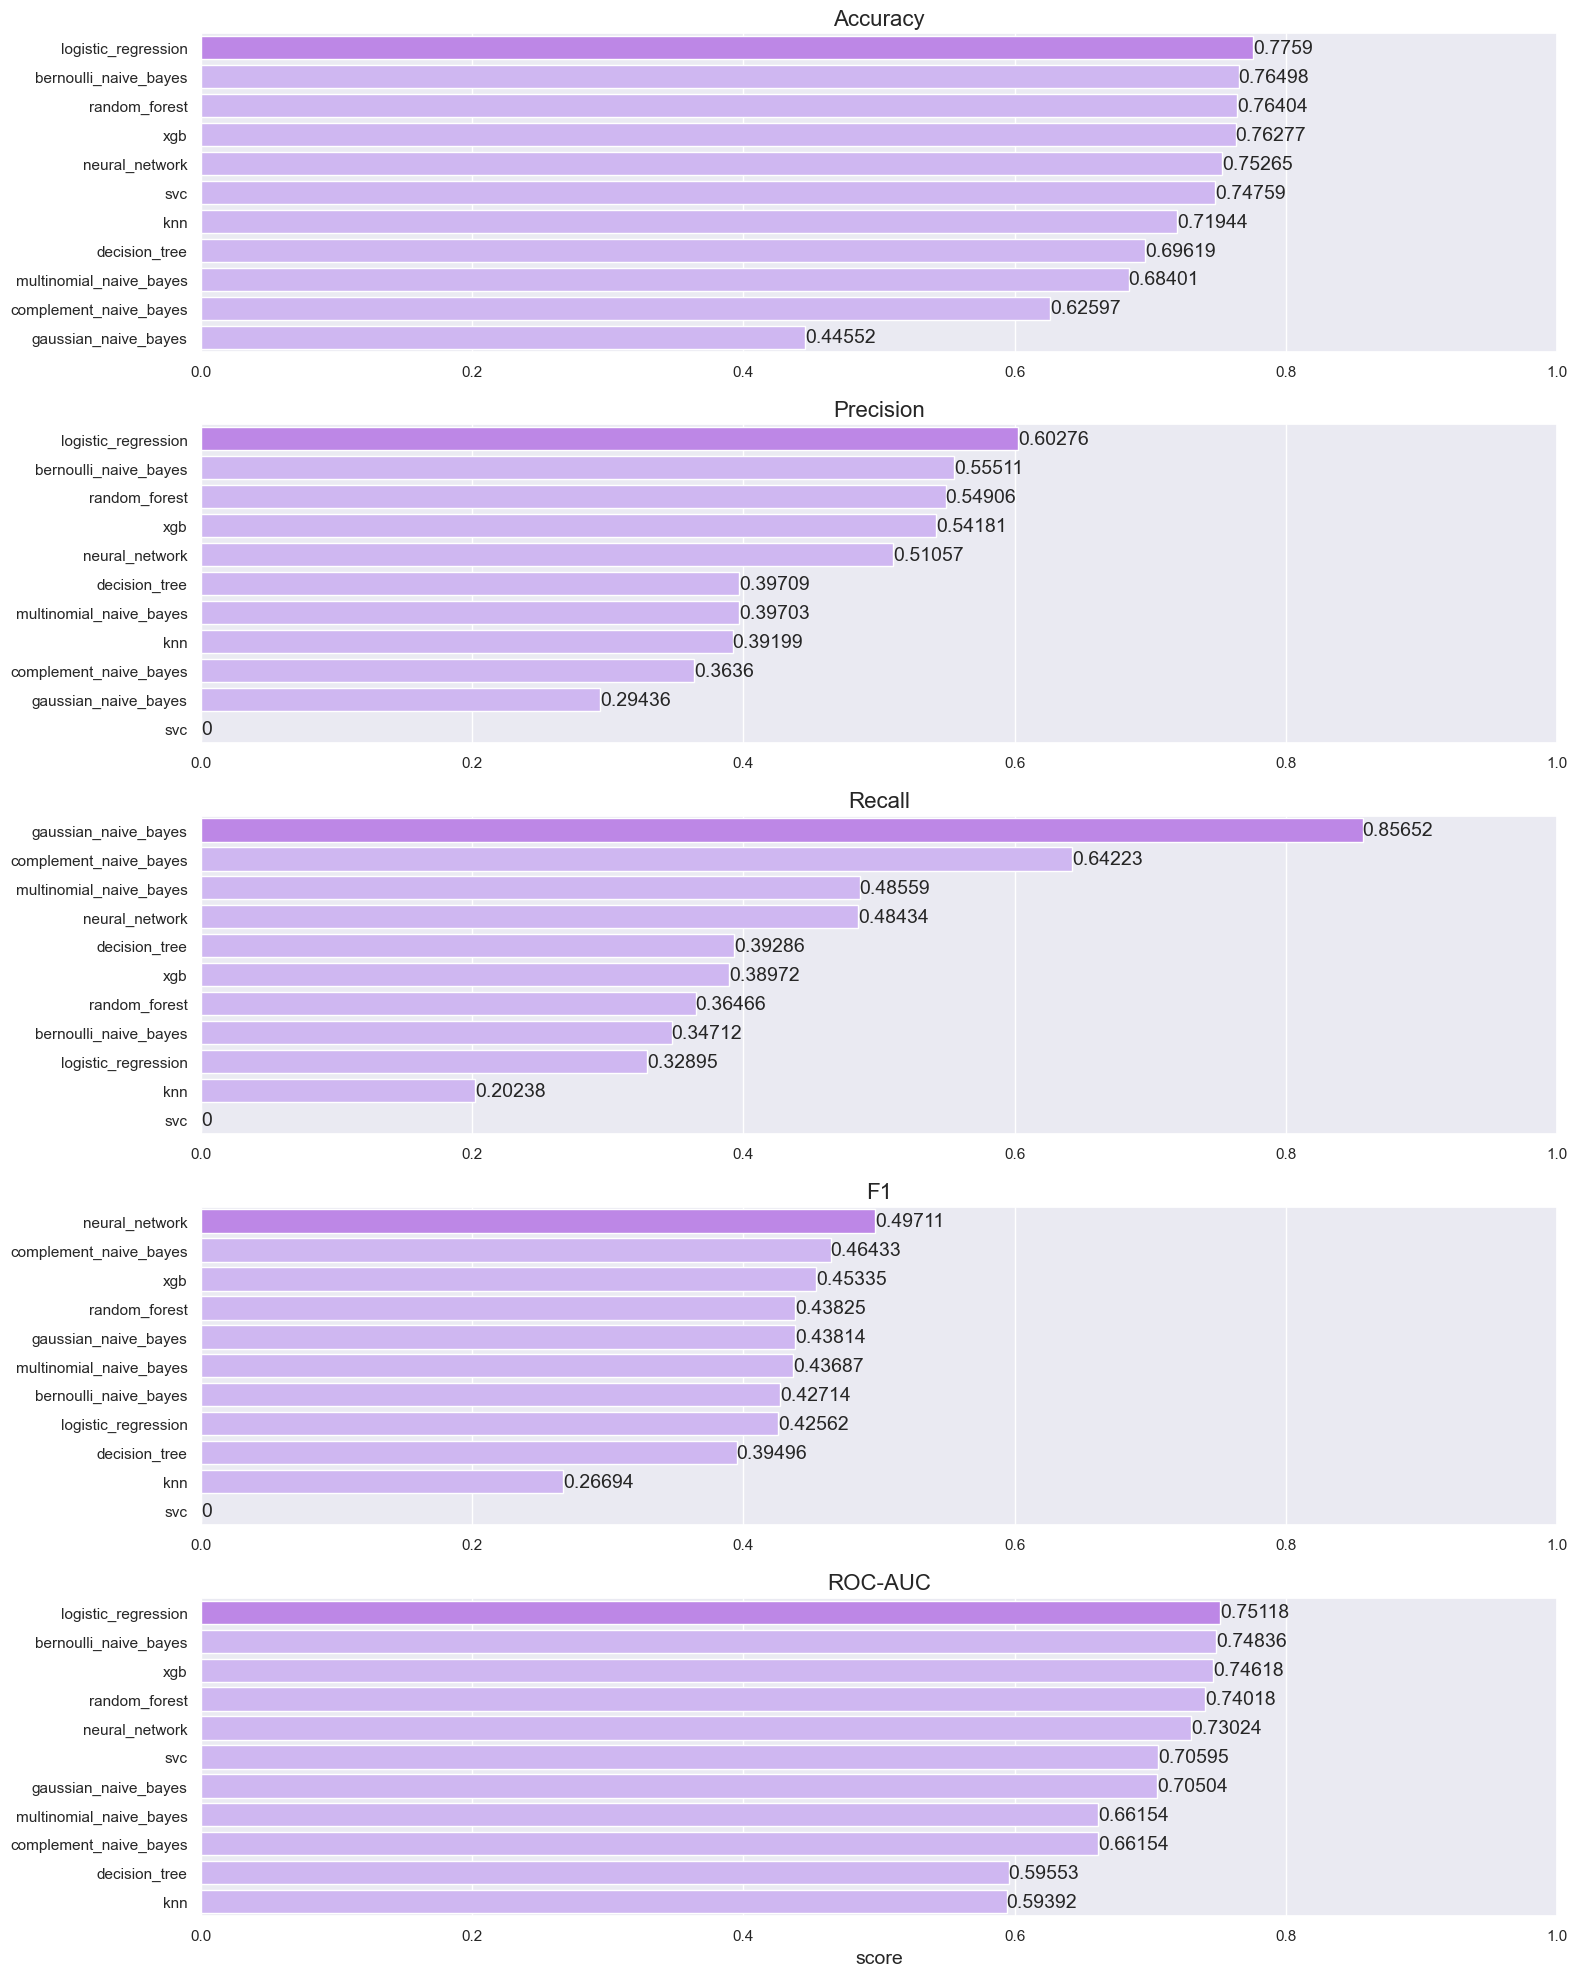

In [45]:
compareModelPlot(compareModelBy, figsize=(16,20))

## **ROC-AUC Curve**

In [46]:
from sklearn.metrics import roc_curve
def rocAucCurve(xTrain, yTrain, xTest, yTest, models):
    rocAucData = []
    for key, value in models.items():
        model = value.fit(xTrain,yTrain)
        yTestPredProb = model.predict_proba(xTest)[:,1]
        falsePositiveRate, truePositiveRate, threshold = roc_curve(yTest, yTestPredProb)
        rocAucData.append({
            'model': key,
            'FPR': falsePositiveRate,
            'TPR': truePositiveRate
        })
    f, ax = plt.subplots(nrows=1, ncols=len(rocAucData), figsize=(4*len(rocAucData), 4))
    for idx, value in enumerate(rocAucData): 
        sns.lineplot(ax=ax[idx], x=value['FPR'], y=value['TPR'], color=colorSet1_1)
        ax[idx].set(title='ROC-AUC Curve {}'.format(value['model']), ylabel='True Positive Rate', xlabel='False Positive Rate')
        ax[idx].fill_between(value['FPR'], value['TPR'], alpha=0.5, color=colorSet1_2)
    plt.tight_layout()
    return plt.show()

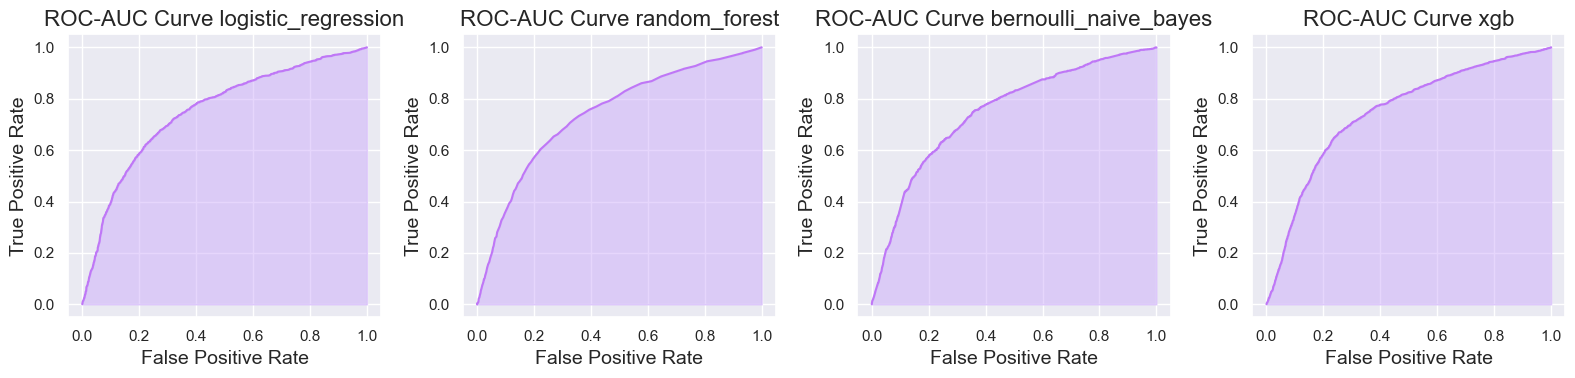

In [47]:
bestModel = {
    'logistic_regression': LogisticRegression(),
    'random_forest': RandomForestClassifier(),
    'bernoulli_naive_bayes': BernoulliNB(),
    'xgb': XGBClassifier(objective ='reg:squarederror')
    # 'neural_network': MLPClassifier(), # terlalu slow --> butuh spek tinggi
}
rocAucCurve(xTrain, yTrain, xTest, yTest, bestModel)

## **Learning Curve - Overfit Test**

In [48]:
from sklearn.metrics import log_loss

def learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, model, start=200, steps=300):
    trainLoss, testLoss = [], []
    for value in np.arange(start,len(xTrain),steps):
        model.fit(xTrain.iloc[:value,:], yTrain[:value])
        yTrainPredProb = model.predict_proba(xTrain.iloc[:value,:])
        trainLoss.append(log_loss(yTrain[:value], yTrainPredProb))
        yTestPredProb = model.predict_proba(xTest)
        testLoss.append(log_loss(yTest, yTestPredProb))
    return [trainLoss, testLoss]

def learningCurveDataByAucRoc(xTrain, yTrain, xTest, yTest, model, start=200, steps=300):
    trainAucRoc, testAucRoc = [], []
    for value in np.arange(start,len(xTrain),steps):
        model.fit(xTrain.iloc[:value,:], yTrain[:value])
        yTrainPredProb = model.predict_proba(xTrain.iloc[:value,:])
        trainAucRoc.append(roc_auc_score(yTrain[:value], yTrainPredProb[:,1]))
        yTestPredProb = model.predict_proba(xTest)
        testAucRoc.append(roc_auc_score(yTest, yTestPredProb[:,1]))
    return [trainAucRoc, testAucRoc]

def learningCurveDataByPrecision(xTrain, yTrain, xTest, yTest, model, start=200, steps=300):
    trainPrecision, testPrecision = [], []
    for value in np.arange(start,len(xTrain),steps):
        model.fit(xTrain.iloc[:value,:], yTrain[:value])
        yTrainPredProb = model.predict(xTrain.iloc[:value,:])
        trainPrecision.append(precision_score(yTrain[:value], yTrainPredProb))
        yTestPredProb = model.predict(xTest)
        testPrecision.append(precision_score(yTest, yTestPredProb))
    return [trainPrecision, testPrecision]

def learningCurveDataByAccuracy(xTrain, yTrain, xTest, yTest, model, start=200, steps=300):
    trainAcc, testAcc = [], []
    for value in np.arange(start,len(xTrain),steps):
        model.fit(xTrain.iloc[:value,:], yTrain[:value])
        yTrainPredProb = model.predict(xTrain.iloc[:value,:])
        trainAcc.append(accuracy_score(yTrain[:value], yTrainPredProb))
        yTestPredProb = model.predict(xTest)
        testAcc.append(accuracy_score(yTest, yTestPredProb))
    return [trainAcc, testAcc]


def plotLearningCurve(data, labels, color1=colorSet1_2, color2=colorSet1_1, lw=4, xLabel='', yLabel='', ylim=[0,1], lenOfData=0, steps=300):
    f, ax = plt.subplots(nrows=1, ncols=len(data), figsize=(5*len(data), 5))
    count = 0
    for key, value in data.items():
        plt.subplot2grid((1, len(data)), ((0, count)))
        sns.lineplot(data=value[0], label=labels[0], color=color1, lw=lw)
        sns.lineplot(data=value[1], label=labels[1], color=color2, lw=lw)
        if(xLabel=='' and lenOfData!=0):
            xLabel = 'N = {}, Steps {}, Number of Iteration = {}'.format(lenOfData, steps, len(value[0]))
        plt.xlabel(xLabel)
        plt.ylabel(yLabel)
        plt.ylim(ylim)
        plt.title('Learning Curve - {}'.format(key))
        count = count + 1
    plt.tight_layout()
    return plt.show()

In [49]:
learningCurveLossLR = learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, bestModel['logistic_regression'])
learningCurveLossBNB = learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, bestModel['bernoulli_naive_bayes'])
learningCurveLossRF = learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, bestModel['random_forest'])
learningCurveLossXGB = learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, bestModel['xgb'])

In [50]:
# learningCurveAucRocLR = learningCurveDataByAucRoc(xTrain, yTrain, xTest, yTest, bestModel['logistic_regression'])
# learningCurveAucRocBNB = learningCurveDataByAucRoc(xTrain, yTrain, xTest, yTest, bestModel['bernoulli_naive_bayes'])
# learningCurveAucRocRF = learningCurveDataByAucRoc(xTrain, yTrain, xTest, yTest, bestModel['random_forest'])
# learningCurveAucRocXGB = learningCurveDataByAucRoc(xTrain, yTrain, xTest, yTest, bestModel['xgb'])

In [51]:
# learningCurvePrecisionLR = learningCurveDataByPrecision(xTrain, yTrain, xTest, yTest, bestModel['logistic_regression'])
# learningCurvePrecisionBNB = learningCurveDataByPrecision(xTrain, yTrain, xTest, yTest, bestModel['bernoulli_naive_bayes'])
# learningCurvePrecisionRF = learningCurveDataByPrecision(xTrain, yTrain, xTest, yTest, bestModel['random_forest'])
# learningCurvePrecisionXGB = learningCurveDataByPrecision(xTrain, yTrain, xTest, yTest, bestModel['xgb'])

In [52]:
# learningCurveAccLR = learningCurveDataByAccuracy(xTrain, yTrain, xTest, yTest, bestModel['logistic_regression'])
# learningCurveAccBNB = learningCurveDataByAccuracy(xTrain, yTrain, xTest, yTest, bestModel['bernoulli_naive_bayes'])
# learningCurveAccRF = learningCurveDataByAccuracy(xTrain, yTrain, xTest, yTest, bestModel['random_forest'])
# learningCurveAccXGB = learningCurveDataByAccuracy(xTrain, yTrain, xTest, yTest, bestModel['xgb'])

In [53]:
learningCurveDataLoss = {
  'logistic_regression': learningCurveLossLR,
  'bernoulli_naive_bayes': learningCurveLossBNB,
  'random_forest': learningCurveLossRF,
  'xgb': learningCurveLossXGB
}
# learningCurveDataAucRoc = {
#   'logistic_regression': learningCurveAucRocLR,
#   'bernoulli_naive_bayes': learningCurveAucRocBNB,
#   'random_forest': learningCurveAucRocRF,
#   'xgb': learningCurveAucRocXGB
# }
# learningCurveDataPrecision = {
#   'logistic_regression': learningCurvePrecisionLR,
#   'bernoulli_naive_bayes': learningCurvePrecisionBNB,
#   'random_forest': learningCurvePrecisionRF,
#   'xgb': learningCurvePrecisionXGB
# }
# learningCurveDataAcc = {
#   'logistic_regression': learningCurveAccLR,
#   'bernoulli_naive_bayes': learningCurveAccBNB,
#   'random_forest': learningCurveAccRF,
#   'xgb': learningCurveAccXGB
# }

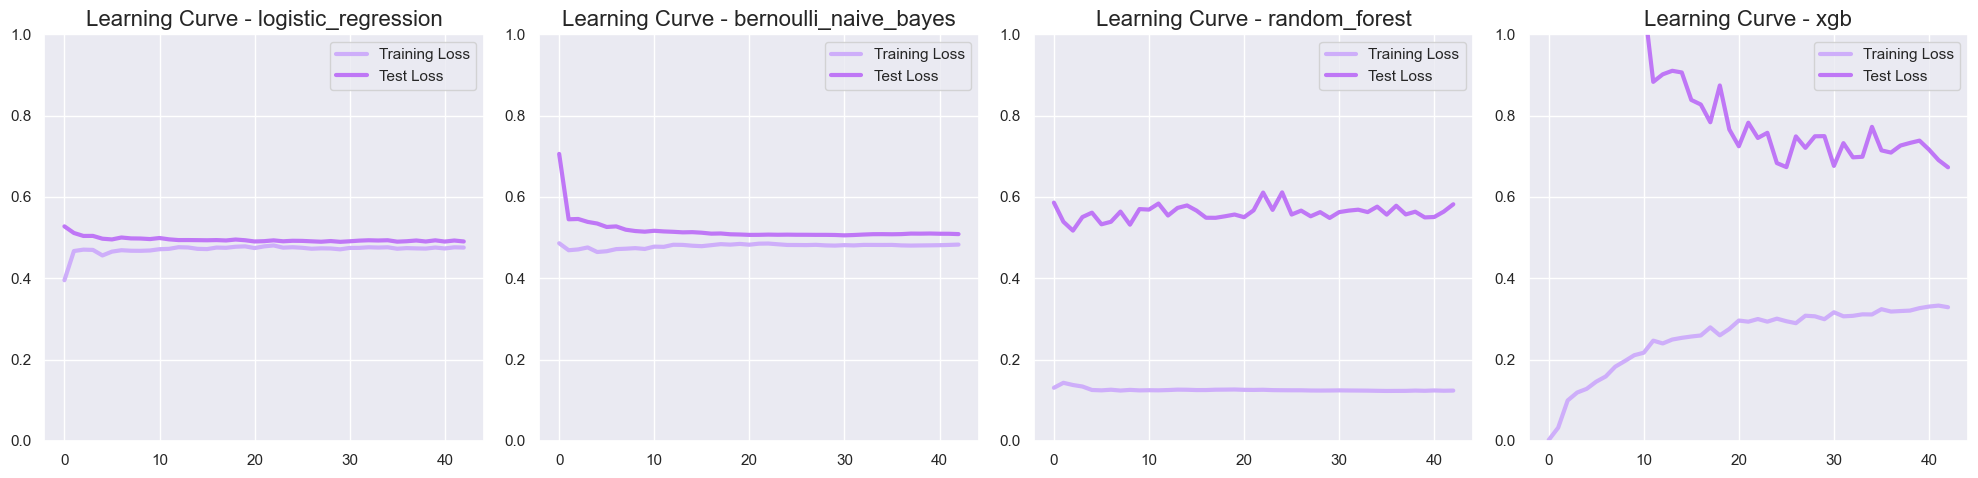

In [54]:
plotLearningCurve(learningCurveDataLoss, labels=['Training Loss', 'Test Loss'], lw=3)

In [55]:
# plotLearningCurve(learningCurveDataAucRoc, labels=['Training AUC-ROC', 'Test AUC-ROC'], lw=3, ylim=[0.65, 1])

In [56]:
# plotLearningCurve(learningCurveDataPrecision, labels=['Training Precision', 'Test Precision'], lw=3, ylim=[0.4, 1])

In [57]:
# plotLearningCurve(learningCurveDataAcc, labels=['Training Accuracy', 'Test Accuracy'], lw=3, ylim=[0.7, 1])

## **Coclusion**
Metrics yang cocok untuk jadi acuan pertimbangan dalam kasus yang menentukan karyawan resign atau tidak adalah Precision dan ROC-AUC. Karena memprediksikan karyawan resign yang pada kenyataannya tidak resign (FP) lebih baik dibanding hal sebaliknya. Kemudian ROC-AUC digunakan untuk melihat kemampuan dan ketepatan model dalam membedakan class target variable. Pada kasus ini algoritma terbaik adalah:

- logistic_regression
- bernoulli_naive_bayes
- random_forest
- XGB
- neural_network (memerlukan resource besar (spek tinggi))

Dari chart Learning Curve dapat disimpulkan bahwa logistic_regression dan bernoulli_naive_bayes memiliki karakteristik low variance underfitting. Sedangkan pada random_forest dan xgb memiliki karakteristik high variance overfitting. Di sini model naive_bayes akan dipilih sementara karena lebih cepat dalam computing untuk membandingkan data setelah optimisasi. 

# **DATA OPTIMIZING**

In [58]:
dataTuning = data.copy()
dataTuning.rename(columns={'relevent_experience': 'relevant_experience'}, inplace=True)
dataTuning.drop(['enrollee_id'], axis=1, inplace=True)
#
dataTuning = toCleanString(dataTuning, catColumns)
# dataTuning.company_size = np.where(dataTuning.company_size=='10/49', '10-49', np.where(dataTuning.company_size=='10000+', '>10000', dataTuning.company_size))
#
catColumns = [x for x in dataTuning.columns if dataTuning[x].dtype == 'object']
labelColumns = []
oheColumns = []
for value in catColumns:
  if value in ['city', 'gender', 'major_discipline', 'company_type']:
    oheColumns.append(value)
  else: labelColumns.append(value)
# label encoding
dataTuning = toOrdinalEncoding(dataTuning, catColumns, mappingLabel)
# one-hot encoding nnti setelah missing values
## label encoding sementara untuk handle missing value setelah itu akan di-inverse untuk OHE
leCity = LabelEncoder()
leGender = LabelEncoder()
leMajorDiscipline = LabelEncoder()
leCompanyType = LabelEncoder()
dataTuning.city = leCity.fit_transform(dataTuning.city)
dataTuning.gender = leGender.fit_transform(dataTuning.gender) 
dataTuning.major_discipline = leMajorDiscipline.fit_transform(dataTuning.major_discipline) 
dataTuning.company_type = leCompanyType.fit_transform(dataTuning.company_type)
## label to nan
dataTuning.gender = np.where(dataTuning.gender==len(leGender.classes_)-1, np.nan, dataTuning.gender)
dataTuning.city = np.where(dataTuning.city==len(leCity.classes_)-1, np.nan, dataTuning.city)
dataTuning.major_discipline = np.where(dataTuning.major_discipline==len(leMajorDiscipline.classes_)-1, np.nan, dataTuning.major_discipline)
dataTuning.company_type = np.where(dataTuning.company_type==len(leCompanyType.classes_)-1, np.nan, dataTuning.company_type)
#
numOfNeighbors = 5
numericalColumns = ['city_development_index','training_hours','target']
knnImputer = KNNImputer(n_neighbors=numOfNeighbors)
dataCategorical = dataTuning[[x for x in dataTuning.columns if x not in numericalColumns]]
dataCategoricalNonMissing = knnImputer.fit_transform(dataCategorical)
dataTuningCategoricalNonMissing = pd.DataFrame(np.intc(np.round(dataCategoricalNonMissing)), columns=dataCategorical.columns)
dataTuning = pd.concat([dataTuning[numericalColumns], dataTuningCategoricalNonMissing], axis=1)
#
dataTuning.city = leCity.inverse_transform(dataTuning.city)
dataTuning.gender = leGender.inverse_transform(dataTuning.gender)
dataTuning.major_discipline = leMajorDiscipline.inverse_transform(dataTuning.major_discipline)
dataTuning.company_type = leCompanyType.inverse_transform(dataTuning.company_type)
# OHE
dataTuning = toOhe(data=dataTuning, cols=oheColumns)
dataTuning

city_development_index  training_hours  target  relevant_experience  \
0                       0.920              36     1.0                    1   
1                       0.776              47     0.0                    0   
2                       0.624              83     0.0                    0   
3                       0.789              52     1.0                    0   
4                       0.767               8     0.0                    1   
...                       ...             ...     ...                  ...   
19153                   0.878              42     1.0                    0   
19154                   0.920              52     1.0                    1   
19155                   0.920              44     0.0                    1   
19156                   0.802              97     0.0                    1   
19157                   0.855             127     0.0                    0   

       enrolled_university  education_level  experience  company_size  \
0                        0                2          21             4   
1                        0                2          15             2   
2                        2                2           5             2   
3                        1                2           0             3   
4                        0                3          21             2   
...                    ...              ...         ...           ...   
19153                    0                2          14             3   
19154                    0                2          14             3   
19155                    0                2          21             2   
19156                    0                1           0             4   
19157                    0                0           2             1   

       last_new_job  city_city1  ...  major_discipline_humanities  \
0                 1         0.0  ...                          0.0   
1                 5         0.0  ...                          0.0   
2                 0         0.0  ...                          0.0   
3                 0         0.0  ...                          0.0   
4                 4         0.0  ...                          0.0   
...             ...         ...  ...                          ...   
19153             1         0.0  ...                          1.0   
19154             4         0.0  ...                          0.0   
19155             4         0.0  ...                          0.0   
19156             2         0.0  ...                          0.0   
19157             1         0.0  ...                          0.0   

       major_discipline_nomajor  major_discipline_other  \
0                           0.0                     0.0   
1                           0.0                     0.0   
2                           0.0                     0.0   
3                           0.0                     0.0   
4                           0.0                     0.0   
...                         ...                     ...   
19153                       0.0                     0.0   
19154                       0.0                     0.0   
19155                       0.0                     0.0   
19156                       1.0                     0.0   
19157                       0.0                     1.0   

       major_discipline_stem  company_type_earlystagestartup  \
0                        1.0                             0.0   
1                        1.0                             0.0   
2                        1.0                             0.0   
3                        0.0                             0.0   
4                        1.0                             0.0   
...                      ...                             ...   
19153                    0.0                             0.0   
19154                    1.0                             0.0   
19155                    1.0                             0.0   
19156          

## **Feature Transform**

### **Box-Cox**
All the values of lambda vary from -5 to 5 are considered and the best value for the data is selected. The “Best” value is one that results in the best skewness of the distribution. Log transformation will take place when we have lambda is zero.
- engga bisa buat 0 values dan negative

In [59]:
from scipy.stats import boxcox

def toBoxCoxScaling(data, cols):
  for value in cols:
    data[value], lamb = boxcox(data[value])
  return data

In [60]:
dataTuningTS0 = dataTuning.copy()
dataTuningTS0 = toBoxCoxScaling(dataTuningTS0, ['training_hours', 'city_development_index'])
dataTuningTS0

city_development_index  training_hours  target  relevant_experience  \
0                   -0.065805        4.958749     1.0                    1   
1                   -0.131262        5.464899     0.0                    0   
2                   -0.158535        6.625445     0.0                    0   
3                   -0.127373        5.662980     1.0                    0   
4                   -0.133773        2.501093     0.0                    1   
...                       ...             ...     ...                  ...   
19153               -0.090720        5.248538     1.0                    0   
19154               -0.065805        5.662980     1.0                    1   
19155               -0.065805        5.337514     0.0                    1   
19156               -0.123155        6.963912     0.0                    1   
19157               -0.102088        7.570963     0.0                    0   

       enrolled_university  education_level  experience  company_size  \
0                        0                2          21             4   
1                        0                2          15             2   
2                        2                2           5             2   
3                        1                2           0             3   
4                        0                3          21             2   
...                    ...              ...         ...           ...   
19153                    0                2          14             3   
19154                    0                2          14             3   
19155                    0                2          21             2   
19156                    0                1           0             4   
19157                    0                0           2             1   

       last_new_job  city_city1  ...  major_discipline_humanities  \
0                 1         0.0  ...                          0.0   
1                 5         0.0  ...                          0.0   
2                 0         0.0  ...                          0.0   
3                 0         0.0  ...                          0.0   
4                 4         0.0  ...                          0.0   
...             ...         ...  ...                          ...   
19153             1         0.0  ...                          1.0   
19154             4         0.0  ...                          0.0   
19155             4         0.0  ...                          0.0   
19156             2         0.0  ...                          0.0   
19157             1         0.0  ...                          0.0   

       major_discipline_nomajor  major_discipline_other  \
0                           0.0                     0.0   
1                           0.0                     0.0   
2                           0.0                     0.0   
3                           0.0                     0.0   
4                           0.0                     0.0   
...                         ...                     ...   
19153                       0.0                     0.0   
19154                       0.0                     0.0   
19155                       0.0                     0.0   
19156                       1.0                     0.0   
19157                       0.0                     1.0   

       major_discipline_stem  company_type_earlystagestartup  \
0                        1.0                             0.0   
1                        1.0                             0.0   
2                        1.0                             0.0   
3                        0.0                             0.0   
4                        1.0                             0.0   
...                      ...                             ...   
19153                    0.0                             0.0   
19154                    1.0                             0.0   
19155                    1.0                             0.0   
19156          

In [61]:
def plotBeforeAfteScaling(data, column, color=colorSet1_1):
  f, ax = plt.subplots(nrows=1, ncols=len(data), figsize=(8*len(data), 5))
  for idx, value in enumerate(data):
    title = lambda x: 'Before Scaling' if x==0 else 'After Scaling' 
    sns.histplot(ax=ax[idx], x=value[column], kde=True, color=color, label='skew: {}'.format(value[column].skew()))
    ax[idx].set(ylabel='', title=title(idx))
    ax[idx].legend()
  plt.tight_layout()
  return plt.show()

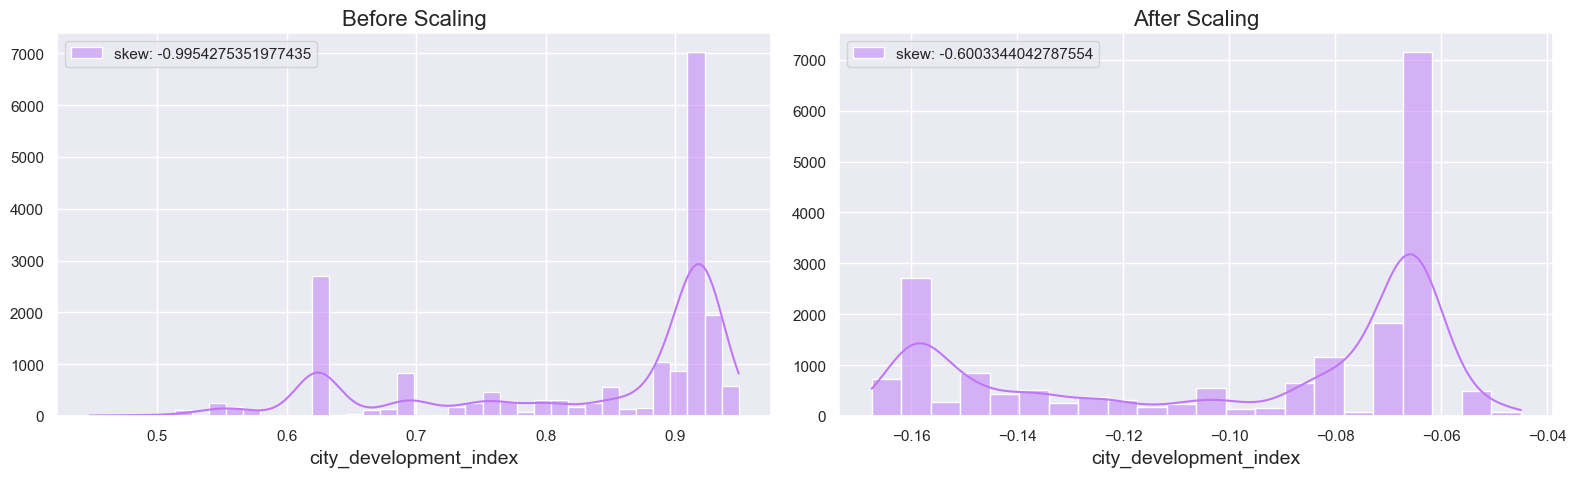

In [62]:
beforeAfterBoxCox = [dataTuning, dataTuningTS0]
plotBeforeAfteScaling(beforeAfterBoxCox, column='city_development_index')

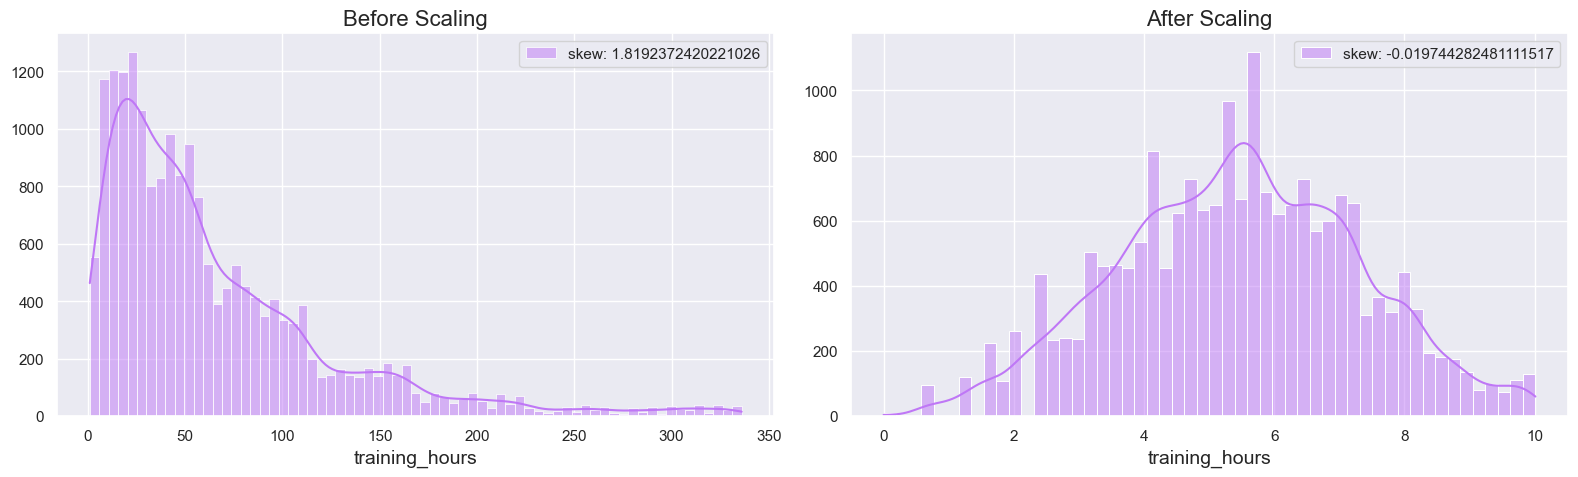

In [63]:
beforeAfterBoxCox = [dataTuning, dataTuningTS0]
plotBeforeAfteScaling(beforeAfterBoxCox, column='training_hours')

### **Log**
Log transformation is a data transformation method in which in which each variable of x will be replaced by log(x) with base 10, base 2, or natural log.. The choice of the logarithm base is usually left up to the analyst and it would depend on the purposes of statistical modeling When our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid. In other words, the log transformation reduces or removes the skewness of our original data. The important caveat here is that the original data has to follow or approximately follow a log-normal distribution. Otherwise, the log transformation won’t work.

- non zero
- non negative

In [64]:
def toLogScaling(data, cols):
  for value in cols:
    data[value] = np.log1p(data[value])
  return data

In [65]:
dataTuningTS1 = dataTuning.copy()
dataTuningTS1 = toLogScaling(dataTuningTS1, ['training_hours', 'city_development_index'])
dataTuningTS1

city_development_index  training_hours  target  relevant_experience  \
0                    0.652325        3.610918     1.0                    1   
1                    0.574364        3.871201     0.0                    0   
2                    0.484892        4.430817     0.0                    0   
3                    0.581657        3.970292     1.0                    0   
4                    0.569283        2.197225     0.0                    1   
...                       ...             ...     ...                  ...   
19153                0.630207        3.761200     1.0                    0   
19154                0.652325        3.970292     1.0                    1   
19155                0.652325        3.806662     0.0                    1   
19156                0.588897        4.584967     0.0                    1   
19157                0.617885        4.852030     0.0                    0   

       enrolled_university  education_level  experience  company_size  \
0                        0                2          21             4   
1                        0                2          15             2   
2                        2                2           5             2   
3                        1                2           0             3   
4                        0                3          21             2   
...                    ...              ...         ...           ...   
19153                    0                2          14             3   
19154                    0                2          14             3   
19155                    0                2          21             2   
19156                    0                1           0             4   
19157                    0                0           2             1   

       last_new_job  city_city1  ...  major_discipline_humanities  \
0                 1         0.0  ...                          0.0   
1                 5         0.0  ...                          0.0   
2                 0         0.0  ...                          0.0   
3                 0         0.0  ...                          0.0   
4                 4         0.0  ...                          0.0   
...             ...         ...  ...                          ...   
19153             1         0.0  ...                          1.0   
19154             4         0.0  ...                          0.0   
19155             4         0.0  ...                          0.0   
19156             2         0.0  ...                          0.0   
19157             1         0.0  ...                          0.0   

       major_discipline_nomajor  major_discipline_other  \
0                           0.0                     0.0   
1                           0.0                     0.0   
2                           0.0                     0.0   
3                           0.0                     0.0   
4                           0.0                     0.0   
...                         ...                     ...   
19153                       0.0                     0.0   
19154                       0.0                     0.0   
19155                       0.0                     0.0   
19156                       1.0                     0.0   
19157                       0.0                     1.0   

       major_discipline_stem  company_type_earlystagestartup  \
0                        1.0                             0.0   
1                        1.0                             0.0   
2                        1.0                             0.0   
3                        0.0                             0.0   
4                        1.0                             0.0   
...                      ...                             ...   
19153                    0.0                             0.0   
19154                    1.0                             0.0   
19155                    1.0                             0.0   
19156          

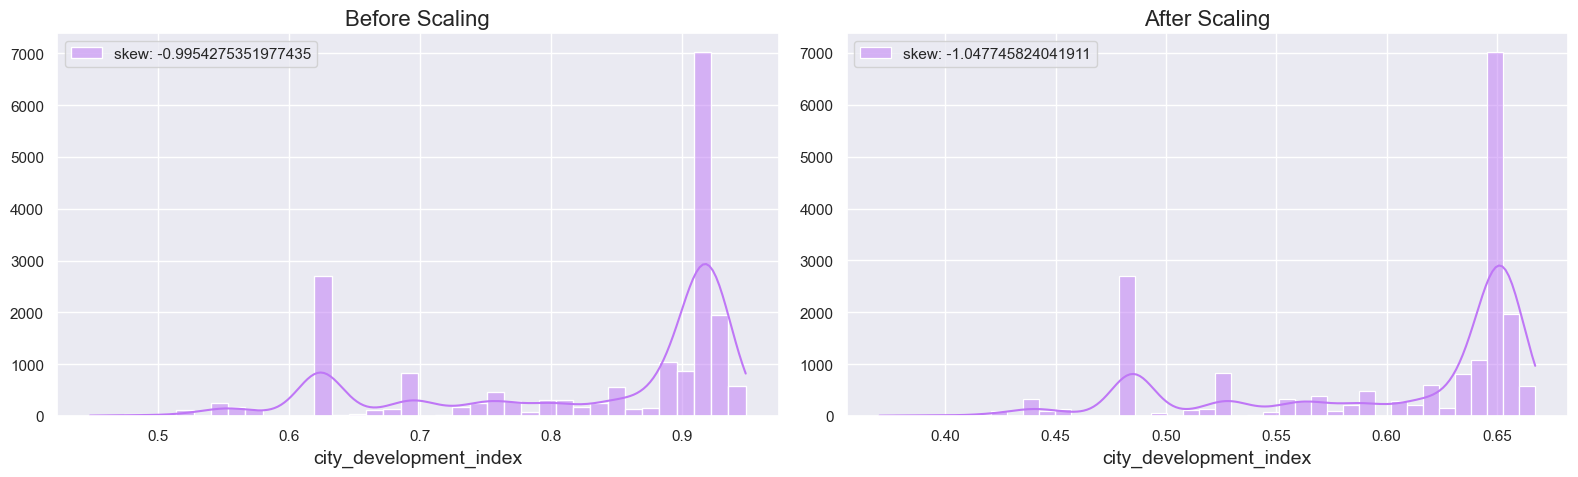

In [66]:
beforeAfterLog = [dataTuning, dataTuningTS1]
plotBeforeAfteScaling(beforeAfterLog, column='city_development_index')

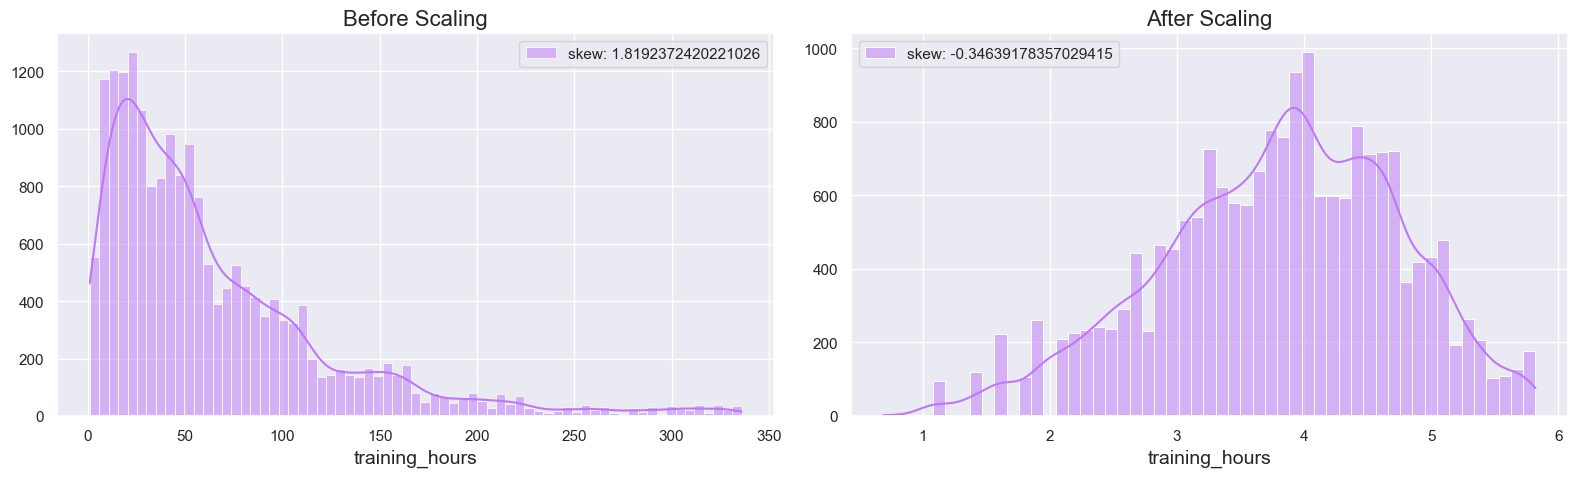

In [67]:
beforeAfterLog = [dataTuning, dataTuningTS1]
plotBeforeAfteScaling(beforeAfterLog, column='training_hours')

### **Yeo-Johnson**
This is one of the older transformation technique which is very similar to Box-cox transformation but does not require the values to be strictly positive. This transformation is also having the ability to make the distribution more symmetric.

In [68]:
from scipy.stats import yeojohnson

def toYeoJohnsonScaling(data, cols):
  for value in cols:
    data[value], lamb = yeojohnson(data[value])
  return data

In [69]:
dataTuningTS2 = dataTuning.copy()
dataTuningTS2 = toYeoJohnsonScaling(dataTuningTS2, ['training_hours', 'city_development_index'])
dataTuningTS2

city_development_index  training_hours  target  relevant_experience  \
0                  428.390539        4.719120     1.0                    1   
1                  152.414580        5.162193     0.0                    0   
2                   46.518156        6.172195     0.0                    0   
3                  167.887762        5.335229     1.0                    0   
4                  142.486310        2.579150     0.0                    1   
...                       ...             ...     ...                  ...   
19153              319.539157        4.972939     1.0                    0   
19154              428.390539        5.335229     1.0                    1   
19155              428.390539        5.050797     0.0                    1   
19156              184.801595        6.464819     0.0                    1   
19157              271.386262        6.987214     0.0                    0   

       enrolled_university  education_level  experience  company_size  \
0                        0                2          21             4   
1                        0                2          15             2   
2                        2                2           5             2   
3                        1                2           0             3   
4                        0                3          21             2   
...                    ...              ...         ...           ...   
19153                    0                2          14             3   
19154                    0                2          14             3   
19155                    0                2          21             2   
19156                    0                1           0             4   
19157                    0                0           2             1   

       last_new_job  city_city1  ...  major_discipline_humanities  \
0                 1         0.0  ...                          0.0   
1                 5         0.0  ...                          0.0   
2                 0         0.0  ...                          0.0   
3                 0         0.0  ...                          0.0   
4                 4         0.0  ...                          0.0   
...             ...         ...  ...                          ...   
19153             1         0.0  ...                          1.0   
19154             4         0.0  ...                          0.0   
19155             4         0.0  ...                          0.0   
19156             2         0.0  ...                          0.0   
19157             1         0.0  ...                          0.0   

       major_discipline_nomajor  major_discipline_other  \
0                           0.0                     0.0   
1                           0.0                     0.0   
2                           0.0                     0.0   
3                           0.0                     0.0   
4                           0.0                     0.0   
...                         ...                     ...   
19153                       0.0                     0.0   
19154                       0.0                     0.0   
19155                       0.0                     0.0   
19156                       1.0                     0.0   
19157                       0.0                     1.0   

       major_discipline_stem  company_type_earlystagestartup  \
0                        1.0                             0.0   
1                        1.0                             0.0   
2                        1.0                             0.0   
3                        0.0                             0.0   
4                        1.0                             0.0   
...                      ...                             ...   
19153                    0.0                             0.0   
19154                    1.0                             0.0   
19155                    1.0                             0.0   
19156          

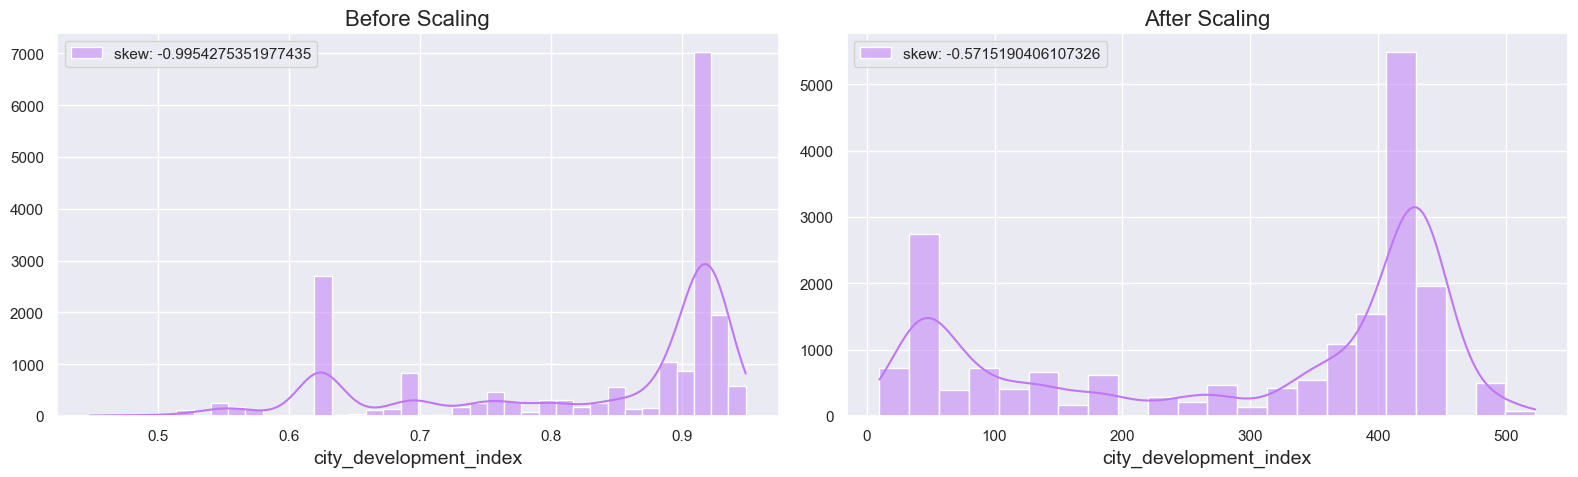

In [70]:
beforeAfterYeoJohnson = [dataTuning, dataTuningTS2]
plotBeforeAfteScaling(beforeAfterYeoJohnson, column='city_development_index')

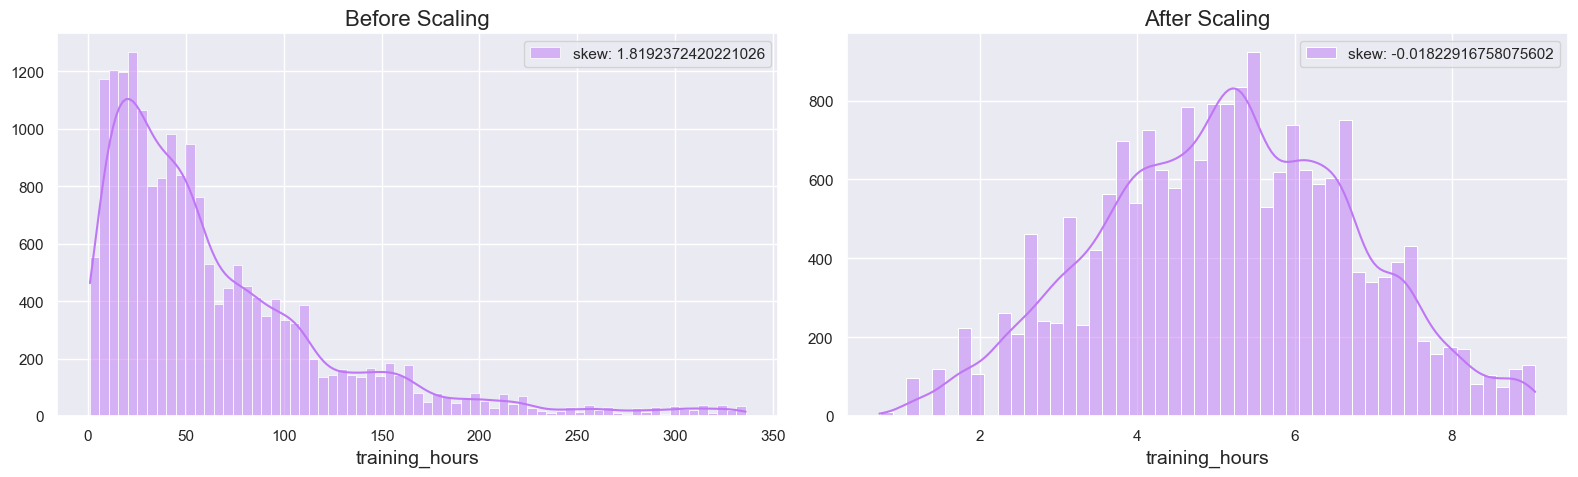

In [71]:
beforeAfterYeoJohnson = [dataTuning, dataTuningTS2]
plotBeforeAfteScaling(beforeAfterYeoJohnson, column='training_hours')

### **Comparing**

In [72]:
# modelsSelected = {'xgb': XGBClassifier(objective ='reg:squarederror')}
modelsSelected = {'bernoulli_naive_bayes': BernoulliNB()}
# modelsSelected = {'logistic_regression': LogisticRegression()}
x0 = dataTuningTS0.drop(['target'], axis=1)
y0 = dataTuningTS0.target
xTrain0, xTest0, yTrain0, yTest0 = train_test_split(x0, y0, test_size=testSize, random_state=randomState)
x1 = dataTuningTS1.drop(['target'], axis=1)
y1 = dataTuningTS1.target
xTrain1, xTest1, yTrain1, yTest1 = train_test_split(x1, y1, test_size=testSize, random_state=randomState)
x2 = dataTuningTS2.drop(['target'], axis=1)
y2 = dataTuningTS2.target
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(x2, y2, test_size=testSize, random_state=randomState)

compareModelTS0 = compareBestModelFunc(xTrain0, yTrain0, xTest0, yTest0, modelsSelected)
compareModelTS1 = compareBestModelFunc(xTrain1, yTrain1, xTest1, yTest1, modelsSelected)
compareModelTS2 = compareBestModelFunc(xTrain2, yTrain2, xTest2, yTest2, modelsSelected)

In [73]:
# compareModel_ = compareModel[compareModel.algorithm.isin(['xgb'])].copy()
compareModel_ = compareModel[compareModel.algorithm.isin(['bernoulli_naive_bayes'])].copy()
# compareModel_ = compareModel[compareModel.algorithm.isin(['logistic_regression'])].copy()
compareModel_['type'] = compareModel_.algorithm + ' (original)'
compareModelTS0['type'] = compareModelTS0.algorithm + ' (box-cox scaling)'
compareModelTS1['type'] = compareModelTS1.algorithm + ' (log scaling)'
compareModelTS2['type'] = compareModelTS2.algorithm + ' (yeo-johnson scaling)'
compareBestModel = pd.concat([compareModel_, compareModelTS0, compareModelTS1, compareModelTS2]).reset_index(drop=True)
compareBestModelBy = {
  'accuracy': compareBestModel.sort_values(['accuracy_score'], ascending=False),
  'precision': compareBestModel.sort_values(['precision_score'], ascending=False),
  'recall': compareBestModel.sort_values(['recall_score'], ascending=False),
  'f1': compareBestModel.sort_values(['f1_score'], ascending=False),
  'roc_auc': compareBestModel.sort_values(['roc_auc_score'], ascending=False),
}
compareBestModel

algorithm  accuracy_score  precision_score  recall_score  \
0  bernoulli_naive_bayes         0.76498          0.55511       0.34712   
1  bernoulli_naive_bayes         0.76356          0.54787       0.36216   
2  bernoulli_naive_bayes         0.76356          0.54787       0.36216   
3  bernoulli_naive_bayes         0.76356          0.54787       0.36216   

   f1_score  roc_auc_score                                         type  
0   0.42714        0.74836             bernoulli_naive_bayes (original)  
1   0.43606        0.75034      bernoulli_naive_bayes (box-cox scaling)  
2   0.43606        0.75034          bernoulli_naive_bayes (log scaling)  
3   0.43606        0.75034  bernoulli_naive_bayes (yeo-johnson scaling)

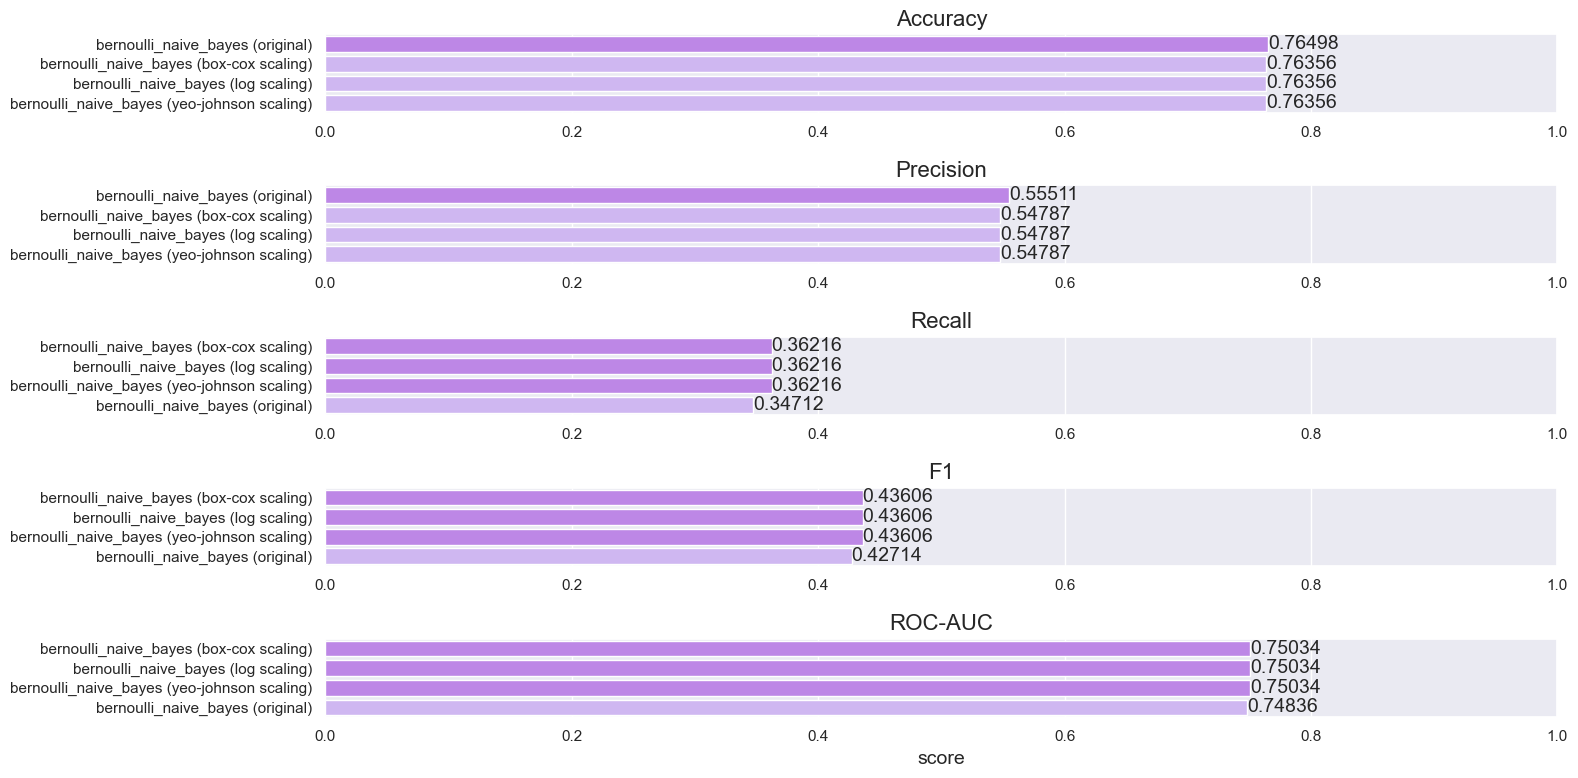

In [74]:
compareModelPlot(compareBestModelBy, figsize=(16, 8), isType=True)

#### **Conclusion**
Walaupun accuracy dan precision menurun sedikit, data yang terdistribusi normal dapat memprediksi lebih baik. Tidak terdapat perbedaan dalam feature transform karena algoritma yang dipilih adalah naive_bayes maka akan dipilih randomly. Box-cox transformation akan dipilih untuk model selanjutnya.

## **Feature Scaling**

### **Min-Max**

In [75]:
from sklearn.preprocessing import MinMaxScaler
def toMinMaxScaling(data, cols):
  for value in cols:
    data[value] = MinMaxScaler().fit_transform(data[[value]])
  return data

In [76]:
dataTuningSc0 = dataTuningTS0.copy()
dataTuningSc0 = toMinMaxScaling(dataTuningSc0, ['city_development_index', 'training_hours'])
beforeAfterMinMax = [dataTuningTS0, dataTuningSc0]

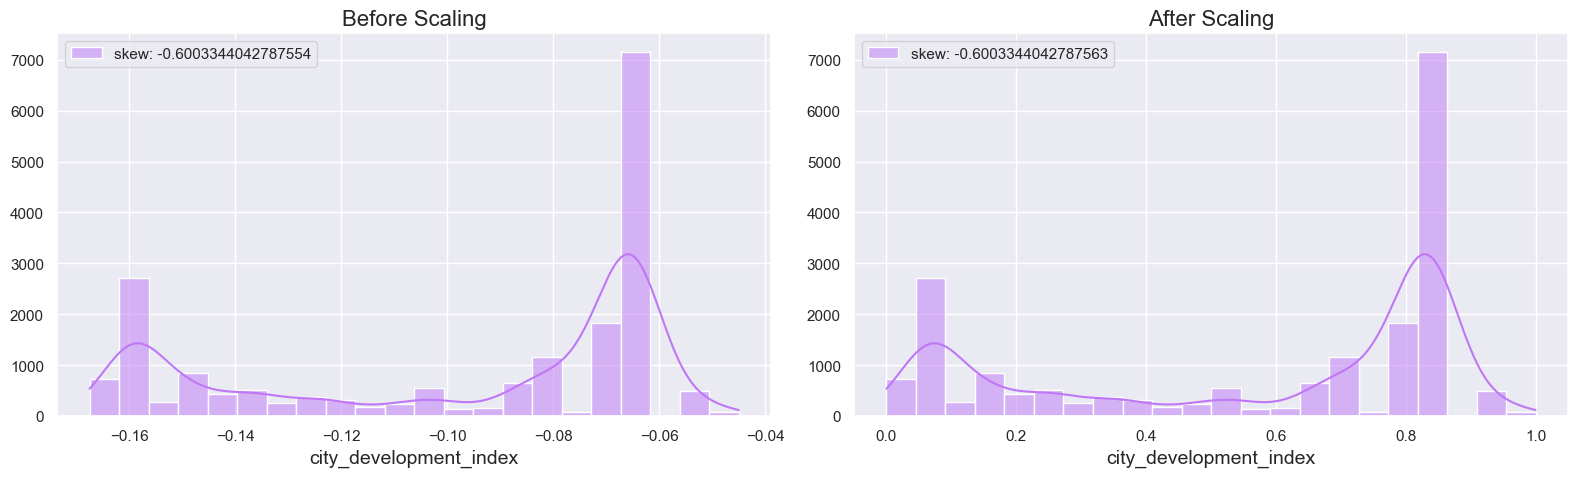

In [77]:
plotBeforeAfteScaling(beforeAfterMinMax, column='city_development_index')

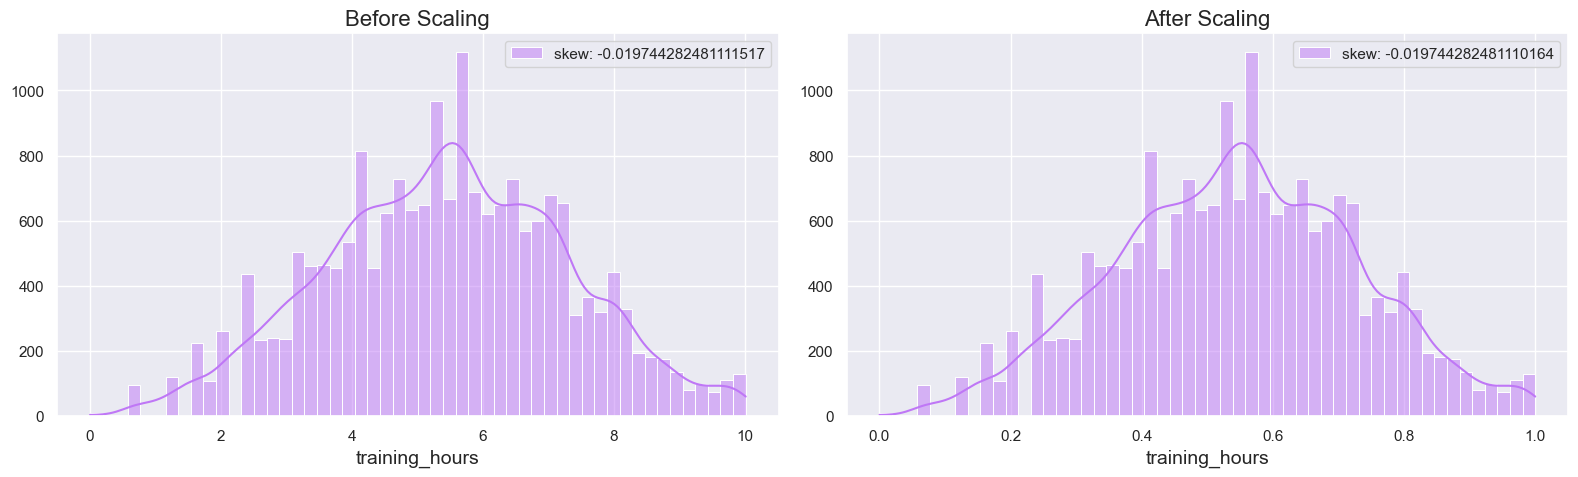

In [78]:
plotBeforeAfteScaling(beforeAfterMinMax, column='training_hours')

### **Standardization**

In [79]:
from sklearn.preprocessing import StandardScaler
def toStandardScaling(data, cols):
  for value in cols:
    data[value] = StandardScaler().fit_transform(data[[value]])
  return data

In [80]:
dataTuningSc1 = dataTuningTS0.copy()
dataTuningSc1 = toStandardScaling(dataTuningSc1, ['city_development_index', 'training_hours'])
beforeAfterStandard = [dataTuningTS0, dataTuningSc1]

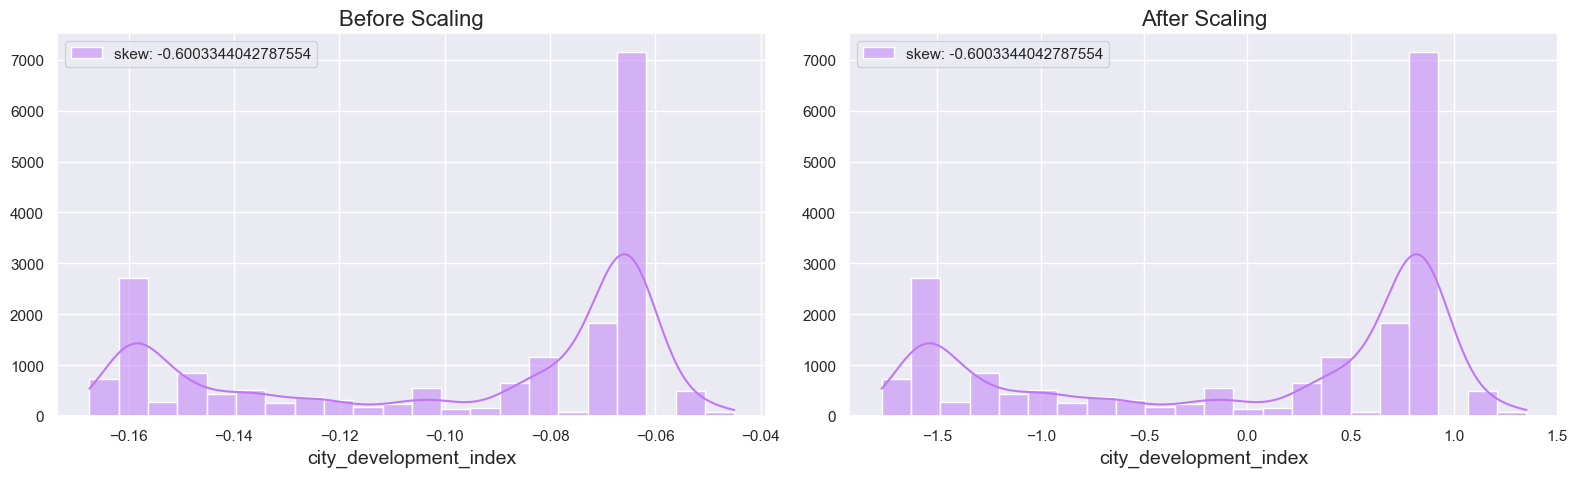

In [81]:
plotBeforeAfteScaling(beforeAfterStandard, column='city_development_index')

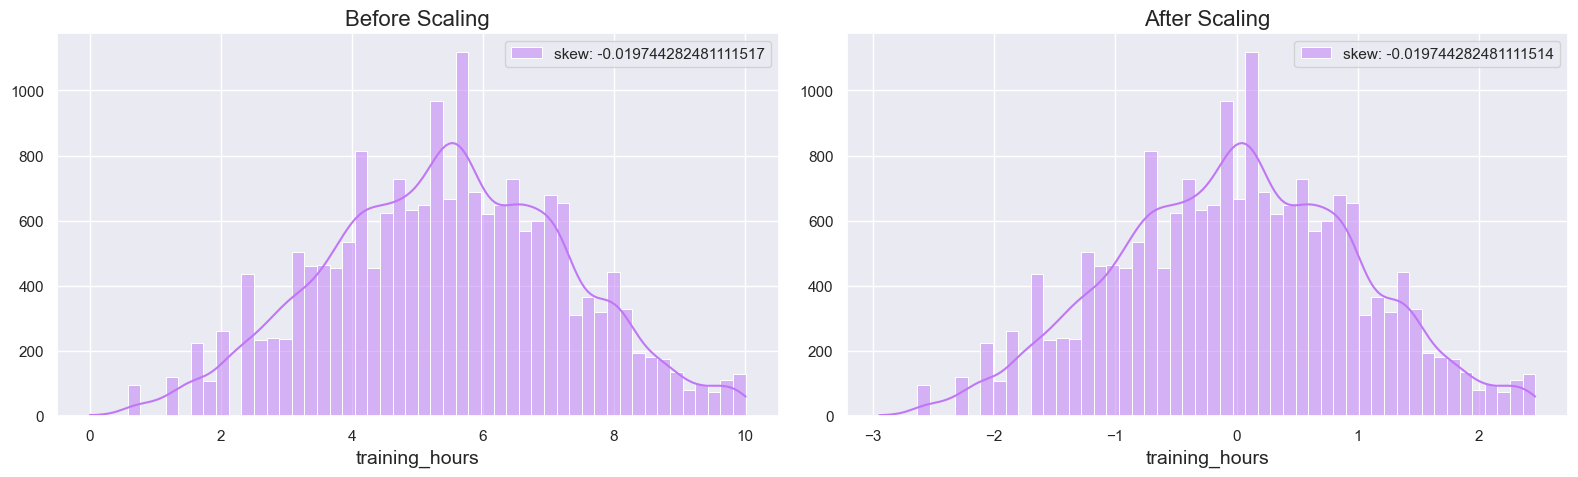

In [82]:
plotBeforeAfteScaling(beforeAfterStandard, column='training_hours')

### **Robust**

In [83]:
from sklearn.preprocessing import RobustScaler
def toRobustScaling(data, cols):
  for value in cols:
    data[value] = RobustScaler().fit_transform(data[[value]])
  return data

In [84]:
dataTuningSc2 = dataTuningTS0.copy()
dataTuningSc2 = toRobustScaling(dataTuningSc2, ['city_development_index', 'training_hours'])
beforeAfterRobust = [dataTuningTS0, dataTuningSc2]

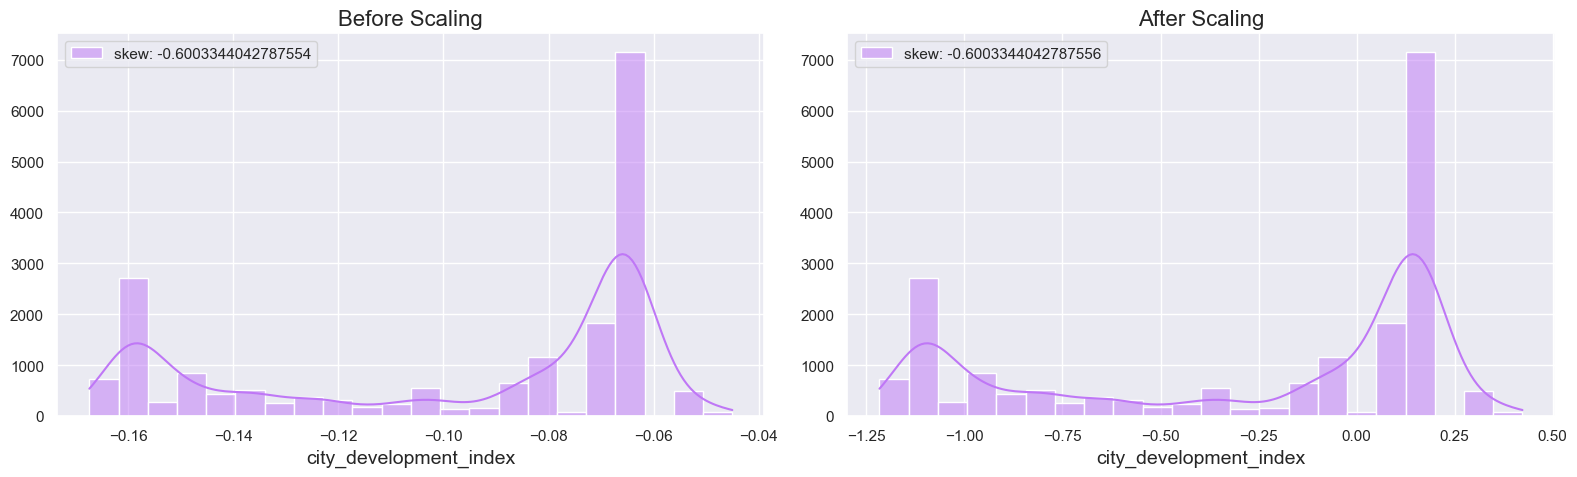

In [85]:
plotBeforeAfteScaling(beforeAfterRobust, column='city_development_index')

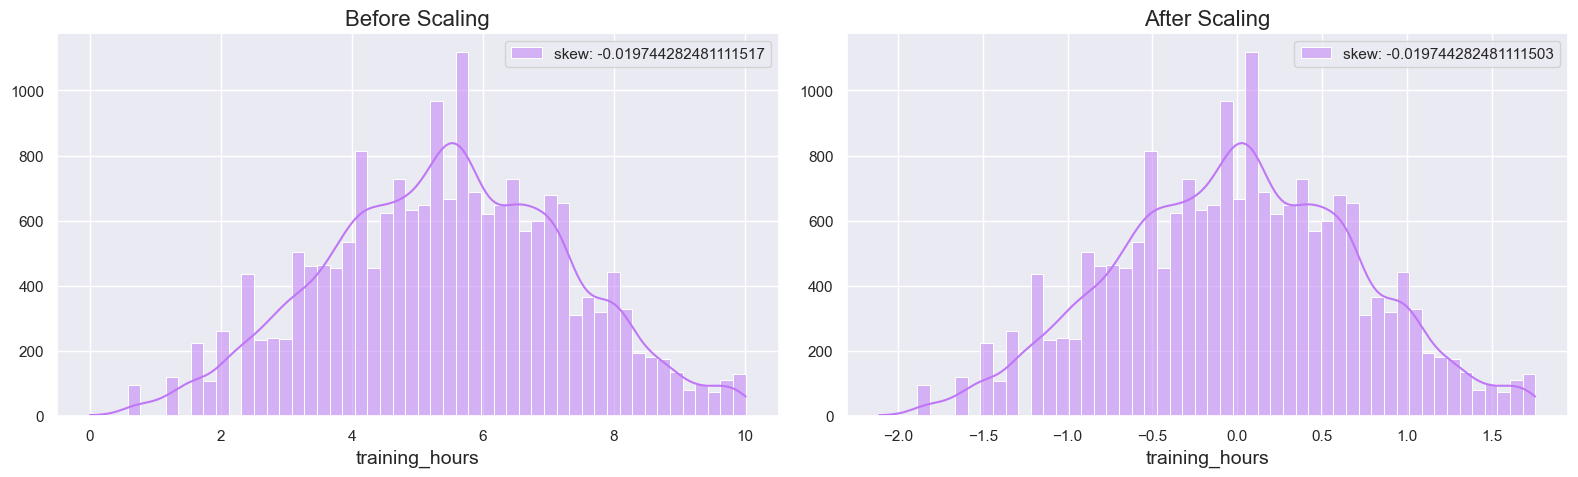

In [86]:
plotBeforeAfteScaling(beforeAfterRobust, column='training_hours')

### **Comparing**

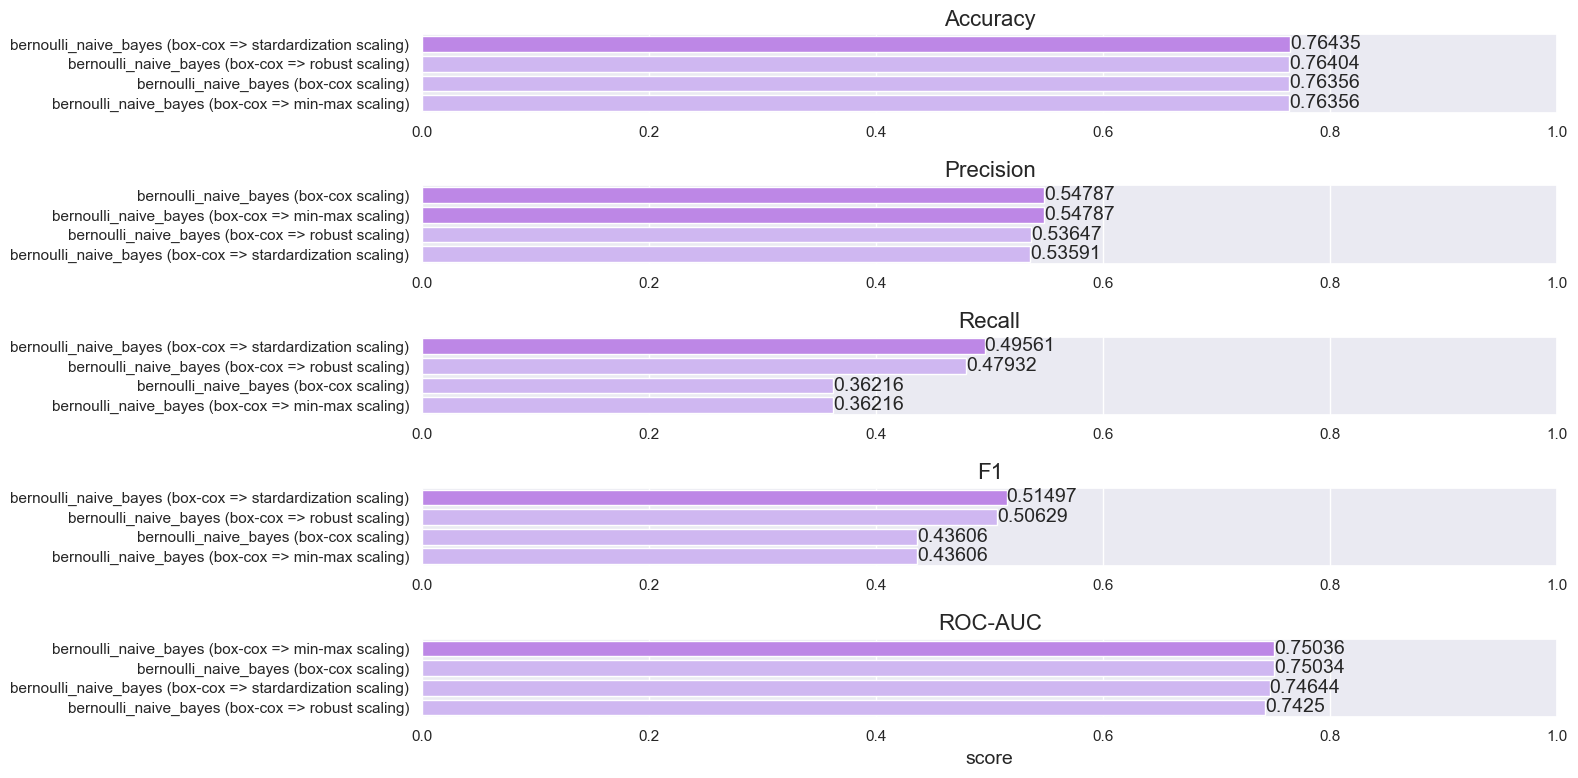

In [87]:
modelsSelected = {
    # 'logistic_regression': LogisticRegression(),
    'bernoulli_naive_bayes': BernoulliNB()
}
# modelsSelected = {'xgb': XGBClassifier(objective ='reg:squarederror')}
x0 = dataTuningSc0.drop(['target'], axis=1)
y0 = dataTuningSc0.target
xTrain0, xTest0, yTrain0, yTest0 = train_test_split(x0, y0, test_size=testSize, random_state=randomState)
x1 = dataTuningSc1.drop(['target'], axis=1)
y1 = dataTuningSc1.target
xTrain1, xTest1, yTrain1, yTest1 = train_test_split(x1, y1, test_size=testSize, random_state=randomState)
x2 = dataTuningSc2.drop(['target'], axis=1)
y2 = dataTuningSc2.target
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(x2, y2, test_size=testSize, random_state=randomState)
compareModelSc0 = compareBestModelFunc(xTrain0, yTrain0, xTest0, yTest0, modelsSelected)
compareModelSc1 = compareBestModelFunc(xTrain1, yTrain1, xTest1, yTest1, modelsSelected)
compareModelSc2 = compareBestModelFunc(xTrain2, yTrain2, xTest2, yTest2, modelsSelected)
# compareModel_ = compareModel[compareModel.algorithm.isin(['logistic_regression','bernoulli_naive_bayes'])].copy()
# compareModel_['type'] = compareModel_.algorithm + ' (original)'
compareModelSc0['type'] = compareModelSc0.algorithm + ' (box-cox => min-max scaling)'
compareModelSc1['type'] = compareModelSc1.algorithm + ' (box-cox => stardardization scaling)'
compareModelSc2['type'] = compareModelSc2.algorithm + ' (box-cox => robust scaling)'
compareBestModelSc = pd.concat([compareBestModel[compareBestModel.type == 'bernoulli_naive_bayes (box-cox scaling)'], 
                                compareModelSc0, compareModelSc1, compareModelSc2]).reset_index(drop=True)
compareBestModelScBy = {
  'accuracy': compareBestModelSc.sort_values(['accuracy_score'], ascending=False),
  'precision': compareBestModelSc.sort_values(['precision_score'], ascending=False),
  'recall': compareBestModelSc.sort_values(['recall_score'], ascending=False),
  'f1': compareBestModelSc.sort_values(['f1_score'], ascending=False),
  'roc_auc': compareBestModelSc.sort_values(['roc_auc_score'], ascending=False),
}
# compareBestModelSc
compareModelPlot(compareBestModelScBy, figsize=(16, 8), isType=True)

#### **Coclusion**
Dari chart diatas menunjukkan bahwa min-max scaling memiliki precision tertinggi dan recall terendah serta AUC terbaik. Oleh karena itu min-max scaling akan digunakan pada dataset.

## **Imbalance**

### **Oversampling**

##### **SMOTE**

In [88]:
from imblearn.over_sampling import SMOTE
def toOVSmote(data, targetVariable, strategy='auto', kNeighbors=numOfNeighbors):
  ov = SMOTE(sampling_strategy=strategy, k_neighbors=kNeighbors, n_jobs=-1, random_state=randomState)
  x, y = ov.fit_resample(data.drop([targetVariable], axis=1), data[targetVariable])
  return pd.concat([x, y], axis=1)

In [89]:
dataTuningOV0 = dataTuningSc0.copy()
dataTuningOV0 = toOVSmote(dataTuningOV0, targetVariable='target')
print(f'Dimension Before Oversampling: {dataTuningSc0.shape}')
print(f'Dimension After Oversampling: {dataTuningOV0.shape}')
print('===========')
print(f'Target Variable')
print(dataTuningOV0.target.value_counts())
dataTuningOV0

Dimension Before Oversampling: (19158, 146)
Dimension After Oversampling: (28762, 146)
Target Variable
1.0    14381
0.0    14381
Name: target, dtype: int64


city_development_index  training_hours  relevant_experience  \
0                    0.830134        0.495226                    1   
1                    0.295433        0.545774                    0   
2                    0.072641        0.661677                    0   
3                    0.327202        0.565556                    0   
4                    0.274921        0.249782                    1   
...                       ...             ...                  ...   
28757                0.830134        0.512912                    1   
28758                0.018095        0.596589                    0   
28759                0.830134        0.673740                    1   
28760                0.072641        0.539381                    0   
28761                0.072641        0.641376                    1   

       enrolled_university  education_level  experience  company_size  \
0                        0                2          21             4   
1                        0                2          15             2   
2                        2                2           5             2   
3                        1                2           0             3   
4                        0                3          21             2   
...                    ...              ...         ...           ...   
28757                    2                3          10             4   
28758                    0                3           9             1   
28759                    0                2           5             7   
28760                    0                2           2             3   
28761                    1                2          13             4   

       last_new_job  city_city1  city_city10  ...  major_discipline_nomajor  \
0                 1         0.0          0.0  ...                       0.0   
1                 5         0.0          0.0  ...                       0.0   
2                 0         0.0          0.0  ...                       0.0   
3                 0         0.0          0.0  ...                       0.0   
4                 4         0.0          0.0  ...                       0.0   
...             ...         ...          ...  ...                       ...   
28757             1         0.0          0.0  ...                       0.0   
28758             1         0.0          0.0  ...                       0.0   
28759             1         0.0          0.0  ...                       0.0   
28760             1         0.0          0.0  ...                       0.0   
28761             1         0.0          0.0  ...                       0.0   

       major_discipline_other  major_discipline_stem  \
0                         0.0                    1.0   
1                         0.0                    1.0   
2                         0.0                    1.0   
3                         0.0                    0.0   
4                         0.0                    1.0   
...                       ...                    ...   
28757                     0.0                    1.0   
28758                     0.0                    1.0   
28759                     0.0                    1.0   
28760                     0.0                    1.0   
28761                     0.0                    1.0   

       company_type_earlystagestartup  company_type_fundedstartup  \
0                            0.000000                         0.0   
1                            0.000000                         0.0   
2                            0.000000                         0.0   
3                            0.000000                         0.0   
4                            0.000000                         1.0   
...                               ...                         ...   
28757                        0.000000                         0.0   
28758                        0.917679                         0.0   
28759                        0.000000         

##### **ADASYN**

In [90]:
from imblearn.over_sampling import ADASYN
def toOVAdasyn(data, targetVariable, strategy='auto', kNeighbors=numOfNeighbors):
  ov =ADASYN(sampling_strategy=strategy, n_neighbors=kNeighbors, n_jobs=-1, random_state=randomState)
  x, y = ov.fit_resample(data.drop([targetVariable], axis=1), data[targetVariable])
  return pd.concat([x, y], axis=1)

In [91]:
dataTuningOV1 = dataTuningSc0.copy()
dataTuningOV1 = toOVAdasyn(dataTuningOV1, targetVariable='target')
print(f'Dimension Before Oversampling: {dataTuningSc0.shape}')
print(f'Dimension After Oversampling: {dataTuningOV1.shape}')
print('===========')
print(f'Target Variable')
print(dataTuningOV1.target.value_counts())
dataTuningOV1

Dimension Before Oversampling: (19158, 146)
Dimension After Oversampling: (28407, 146)
Target Variable
0.0    14381
1.0    14026
Name: target, dtype: int64


city_development_index  training_hours  relevant_experience  \
0                    0.830134        0.495226                    1   
1                    0.295433        0.545774                    0   
2                    0.072641        0.661677                    0   
3                    0.327202        0.565556                    0   
4                    0.274921        0.249782                    1   
...                       ...             ...                  ...   
28402                0.650304        0.525703                    0   
28403                0.420728        0.585276                    0   
28404                0.830134        0.774717                    1   
28405                0.830134        0.581314                    1   
28406                0.830134        0.458318                    1   

       enrolled_university  education_level  experience  company_size  \
0                        0                2          21             4   
1                        0                2          15             2   
2                        2                2           5             2   
3                        1                2           0             3   
4                        0                3          21             2   
...                    ...              ...         ...           ...   
28402                    0                2          14             2   
28403                    0                2          14             3   
28404                    0                2          14             3   
28405                    0                2          14             2   
28406                    0                2          14             3   

       last_new_job  city_city1  city_city10  ...  major_discipline_nomajor  \
0                 1         0.0          0.0  ...                       0.0   
1                 5         0.0          0.0  ...                       0.0   
2                 0         0.0          0.0  ...                       0.0   
3                 0         0.0          0.0  ...                       0.0   
4                 4         0.0          0.0  ...                       0.0   
...             ...         ...          ...  ...                       ...   
28402             1         0.0          0.0  ...                       0.0   
28403             1         0.0          0.0  ...                       0.0   
28404             4         0.0          0.0  ...                       0.0   
28405             4         0.0          0.0  ...                       0.0   
28406             4         0.0          0.0  ...                       0.0   

       major_discipline_other  major_discipline_stem  \
0                         0.0               1.000000   
1                         0.0               1.000000   
2                         0.0               1.000000   
3                         0.0               0.000000   
4                         0.0               1.000000   
...                       ...                    ...   
28402                     0.0               0.000000   
28403                     0.0               0.371653   
28404                     0.0               1.000000   
28405                     0.0               1.000000   
28406                     0.0               1.000000   

       company_type_earlystagestartup  company_type_fundedstartup  \
0                                 0.0                         0.0   
1                                 0.0                         0.0   
2                                 0.0                         0.0   
3                                 0.0                         0.0   
4                                 0.0                         1.0   
...                               ...                         ...   
28402                             0.0                         0.0   
28403                             0.0                         0.0   
28404                             0.0         

##### **KMeans SMOTE**

In [92]:
from imblearn.over_sampling import KMeansSMOTE
from sklearn.cluster import MiniBatchKMeans
def toOVKmeansSmote(data, targetVariable, strategy='auto', kNeighbors=numOfNeighbors):
  ov =KMeansSMOTE(sampling_strategy=strategy, 
                  k_neighbors=kNeighbors, 
                  n_jobs=-1, 
                  random_state=randomState, 
                  cluster_balance_threshold=0.295,
                  kmeans_estimator=MiniBatchKMeans(n_init=1, random_state=randomState))
  x, y = ov.fit_resample(data.drop([targetVariable], axis=1), data[targetVariable])
  return pd.concat([x, y], axis=1)
  ## cluster_balance_threshold dicoba satu satu

In [93]:
dataTuningOV2 = dataTuningSc0.copy()
dataTuningOV2 = toOVKmeansSmote(dataTuningOV2, targetVariable='target')
print(f'Dimension Before Oversampling: {dataTuningSc0.shape}')
print(f'Dimension After Oversampling: {dataTuningOV2.shape}')
print('===========')
print(f'Target Variable')
print(dataTuningOV2.target.value_counts())
dataTuningOV2

Dimension Before Oversampling: (19158, 146)
Dimension After Oversampling: (28763, 146)
Target Variable
1.0    14382
0.0    14381
Name: target, dtype: int64


city_development_index  training_hours  relevant_experience  \
0                    0.830134        0.495226                    1   
1                    0.295433        0.545774                    0   
2                    0.072641        0.661677                    0   
3                    0.327202        0.565556                    0   
4                    0.274921        0.249782                    1   
...                       ...             ...                  ...   
28758                0.303921        0.595145                    0   
28759                0.830134        0.797476                    0   
28760                0.167878        0.368314                    1   
28761                0.365402        0.571371                    1   
28762                0.046566        0.481547                    1   

       enrolled_university  education_level  experience  company_size  \
0                        0                2          21             4   
1                        0                2          15             2   
2                        2                2           5             2   
3                        1                2           0             3   
4                        0                3          21             2   
...                    ...              ...         ...           ...   
28758                    2                1           4             4   
28759                    0                2           5             4   
28760                    2                2           4             3   
28761                    0                2           4             5   
28762                    0                2           5             3   

       last_new_job  city_city1  city_city10  ...  major_discipline_nomajor  \
0                 1         0.0          0.0  ...                       0.0   
1                 5         0.0          0.0  ...                       0.0   
2                 0         0.0          0.0  ...                       0.0   
3                 0         0.0          0.0  ...                       0.0   
4                 4         0.0          0.0  ...                       0.0   
...             ...         ...          ...  ...                       ...   
28758             0         0.0          0.0  ...                       0.0   
28759             2         0.0          0.0  ...                       0.0   
28760             0         0.0          0.0  ...                       0.0   
28761             1         0.0          0.0  ...                       0.0   
28762             1         0.0          0.0  ...                       0.0   

       major_discipline_other  major_discipline_stem  \
0                         0.0                    1.0   
1                         0.0                    1.0   
2                         0.0                    1.0   
3                         0.0                    0.0   
4                         0.0                    1.0   
...                       ...                    ...   
28758                     0.0                    1.0   
28759                     0.0                    1.0   
28760                     0.0                    1.0   
28761                     0.0                    1.0   
28762                     0.0                    1.0   

       company_type_earlystagestartup  company_type_fundedstartup  \
0                                 0.0                         0.0   
1                                 0.0                         0.0   
2                                 0.0                         0.0   
3                                 0.0                         0.0   
4                                 0.0                         1.0   
...                               ...                         ...   
28758                             0.0                         0.0   
28759                             0.0                         0.0   
28760                             0.0         

##### **SVM SMOTE**

In [94]:
from imblearn.over_sampling import SVMSMOTE
def toOVSvmSmote(data, targetVariable, strategy='auto', kNeighbors=numOfNeighbors):
  ov = SVMSMOTE(sampling_strategy=strategy, n_neighbors=kNeighbors, n_jobs=-1, random_state=randomState)
  x, y = ov.fit_resample(data.drop([targetVariable], axis=1), data[targetVariable])
  return pd.concat([x, y], axis=1)

In [95]:
dataTuningOV3 = dataTuningSc0.copy()
dataTuningOV3 = toOVAdasyn(dataTuningOV3, targetVariable='target')
print(f'Dimension Before Oversampling: {dataTuningSc0.shape}')
print(f'Dimension After Oversampling: {dataTuningOV3.shape}')
print('===========')
print(f'Target Variable')
print(dataTuningOV3.target.value_counts())
dataTuningOV3

Dimension Before Oversampling: (19158, 146)
Dimension After Oversampling: (28407, 146)
Target Variable
0.0    14381
1.0    14026
Name: target, dtype: int64


city_development_index  training_hours  relevant_experience  \
0                    0.830134        0.495226                    1   
1                    0.295433        0.545774                    0   
2                    0.072641        0.661677                    0   
3                    0.327202        0.565556                    0   
4                    0.274921        0.249782                    1   
...                       ...             ...                  ...   
28402                0.650304        0.525703                    0   
28403                0.420728        0.585276                    0   
28404                0.830134        0.774717                    1   
28405                0.830134        0.581314                    1   
28406                0.830134        0.458318                    1   

       enrolled_university  education_level  experience  company_size  \
0                        0                2          21             4   
1                        0                2          15             2   
2                        2                2           5             2   
3                        1                2           0             3   
4                        0                3          21             2   
...                    ...              ...         ...           ...   
28402                    0                2          14             2   
28403                    0                2          14             3   
28404                    0                2          14             3   
28405                    0                2          14             2   
28406                    0                2          14             3   

       last_new_job  city_city1  city_city10  ...  major_discipline_nomajor  \
0                 1         0.0          0.0  ...                       0.0   
1                 5         0.0          0.0  ...                       0.0   
2                 0         0.0          0.0  ...                       0.0   
3                 0         0.0          0.0  ...                       0.0   
4                 4         0.0          0.0  ...                       0.0   
...             ...         ...          ...  ...                       ...   
28402             1         0.0          0.0  ...                       0.0   
28403             1         0.0          0.0  ...                       0.0   
28404             4         0.0          0.0  ...                       0.0   
28405             4         0.0          0.0  ...                       0.0   
28406             4         0.0          0.0  ...                       0.0   

       major_discipline_other  major_discipline_stem  \
0                         0.0               1.000000   
1                         0.0               1.000000   
2                         0.0               1.000000   
3                         0.0               0.000000   
4                         0.0               1.000000   
...                       ...                    ...   
28402                     0.0               0.000000   
28403                     0.0               0.371653   
28404                     0.0               1.000000   
28405                     0.0               1.000000   
28406                     0.0               1.000000   

       company_type_earlystagestartup  company_type_fundedstartup  \
0                                 0.0                         0.0   
1                                 0.0                         0.0   
2                                 0.0                         0.0   
3                                 0.0                         0.0   
4                                 0.0                         1.0   
...                               ...                         ...   
28402                             0.0                         0.0   
28403                             0.0                         0.0   
28404                             0.0         

### **Comparing**

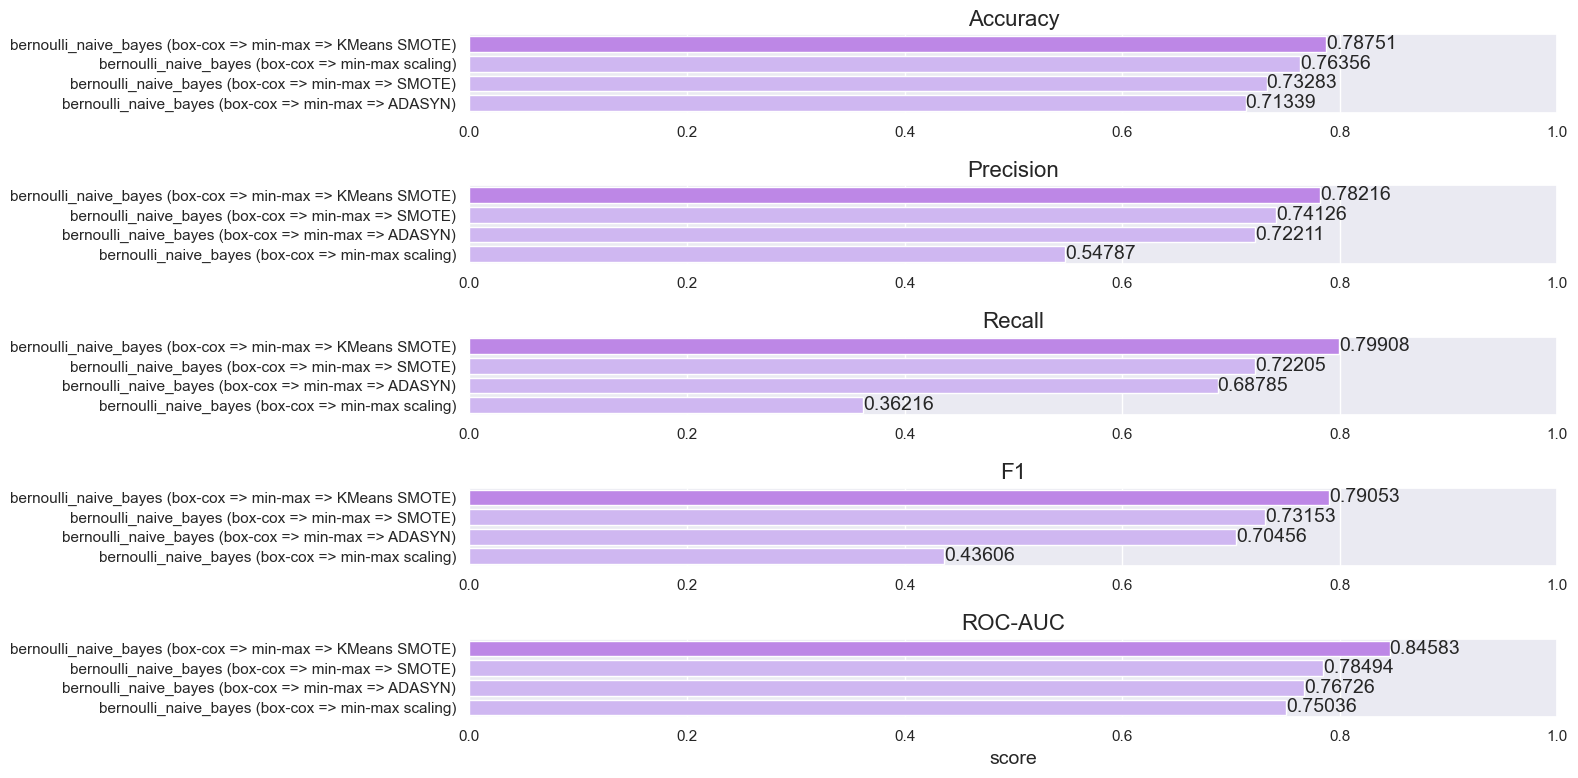

In [96]:
modelsSelected = {
    # 'logistic_regression': LogisticRegression()
    'bernoulli_naive_bayes': BernoulliNB()
}
# modelsSelected = {'xgb': XGBClassifier(objective ='reg:squarederror')}
x0 = dataTuningOV0.drop(['target'], axis=1)
y0 = dataTuningOV0.target
xTrain0, xTest0, yTrain0, yTest0 = train_test_split(x0, y0, test_size=testSize, random_state=randomState)
x1 = dataTuningOV1.drop(['target'], axis=1)
y1 = dataTuningOV1.target
xTrain1, xTest1, yTrain1, yTest1 = train_test_split(x1, y1, test_size=testSize, random_state=randomState)
x2 = dataTuningOV2.drop(['target'], axis=1)
y2 = dataTuningOV2.target
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(x2, y2, test_size=testSize, random_state=randomState)
x3 = dataTuningOV3.drop(['target'], axis=1)
y3 = dataTuningOV3.target
xTrain3, xTest3, yTrain3, yTest3 = train_test_split(x3, y3, test_size=testSize, random_state=randomState)
#
compareModelOV0 = compareBestModelFunc(xTrain0, yTrain0, xTest0, yTest0, modelsSelected)
compareModelOV1 = compareBestModelFunc(xTrain1, yTrain1, xTest1, yTest1, modelsSelected)
compareModelOV2 = compareBestModelFunc(xTrain2, yTrain2, xTest2, yTest2, modelsSelected)
compareModelOV3 = compareBestModelFunc(xTrain3, yTrain3, xTest3, yTest3, modelsSelected)
#
compareModelOV0['type'] = compareModelOV0.algorithm + ' (box-cox => min-max => SMOTE)'
compareModelOV1['type'] = compareModelOV1.algorithm + ' (box-cox => min-max => ADASYN)'
compareModelOV2['type'] = compareModelOV2.algorithm + ' (box-cox => min-max => KMeans SMOTE)'
compareBestModelOV = pd.concat([compareBestModelSc[compareBestModelSc.type == 'bernoulli_naive_bayes (box-cox => min-max scaling)'], 
                                compareModelOV0, compareModelOV1, compareModelOV2]).reset_index(drop=True)
compareBestModelOVBy = {
  'accuracy': compareBestModelOV.sort_values(['accuracy_score'], ascending=False),
  'precision': compareBestModelOV.sort_values(['precision_score'], ascending=False),
  'recall': compareBestModelOV.sort_values(['recall_score'], ascending=False),
  'f1': compareBestModelOV.sort_values(['f1_score'], ascending=False),
  'roc_auc': compareBestModelOV.sort_values(['roc_auc_score'], ascending=False),
}
# compareBestModelOV
compareModelPlot(compareBestModelOVBy, figsize=(16, 8), isType=True)

#### **Conclusion**
Dengan chart diatas maka model naive_bayes dengan resampling KMean SMOTE menghasilkan performa terbaik.

# **MODEL SELECTION AFTER DATA OPTIMIZATION**

## **Evaluation Metrics**

In [97]:
dataOptimize = dataTuningOV2.copy()
models = {
    'logistic_regression': LogisticRegression(),
    # 'svc': SVC(probability=True), #very-very slow
    'random_forest': RandomForestClassifier(),
    'decision_tree': DecisionTreeClassifier(),
    'knn': KNeighborsClassifier(n_neighbors=numOfNeighbors),
    'gaussian_naive_bayes': GaussianNB(),
    # 'multinomial_naive_bayes': MultinomialNB(), #negatif value and zero value
    # 'complement_naive_bayes': ComplementNB(), #negatif value and zero value
    'bernoulli_naive_bayes': BernoulliNB(),
    'xgb': XGBClassifier(objective ='reg:squarederror'),
    'neural_network': MLPClassifier() #very slow
}
x = dataOptimize.drop('target', axis=1)
y = dataOptimize.target
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=testSize, random_state=randomState)
compareBestModelAfterOptimizing = compareBestModelFunc(xTrain, yTrain, xTest, yTest, models)


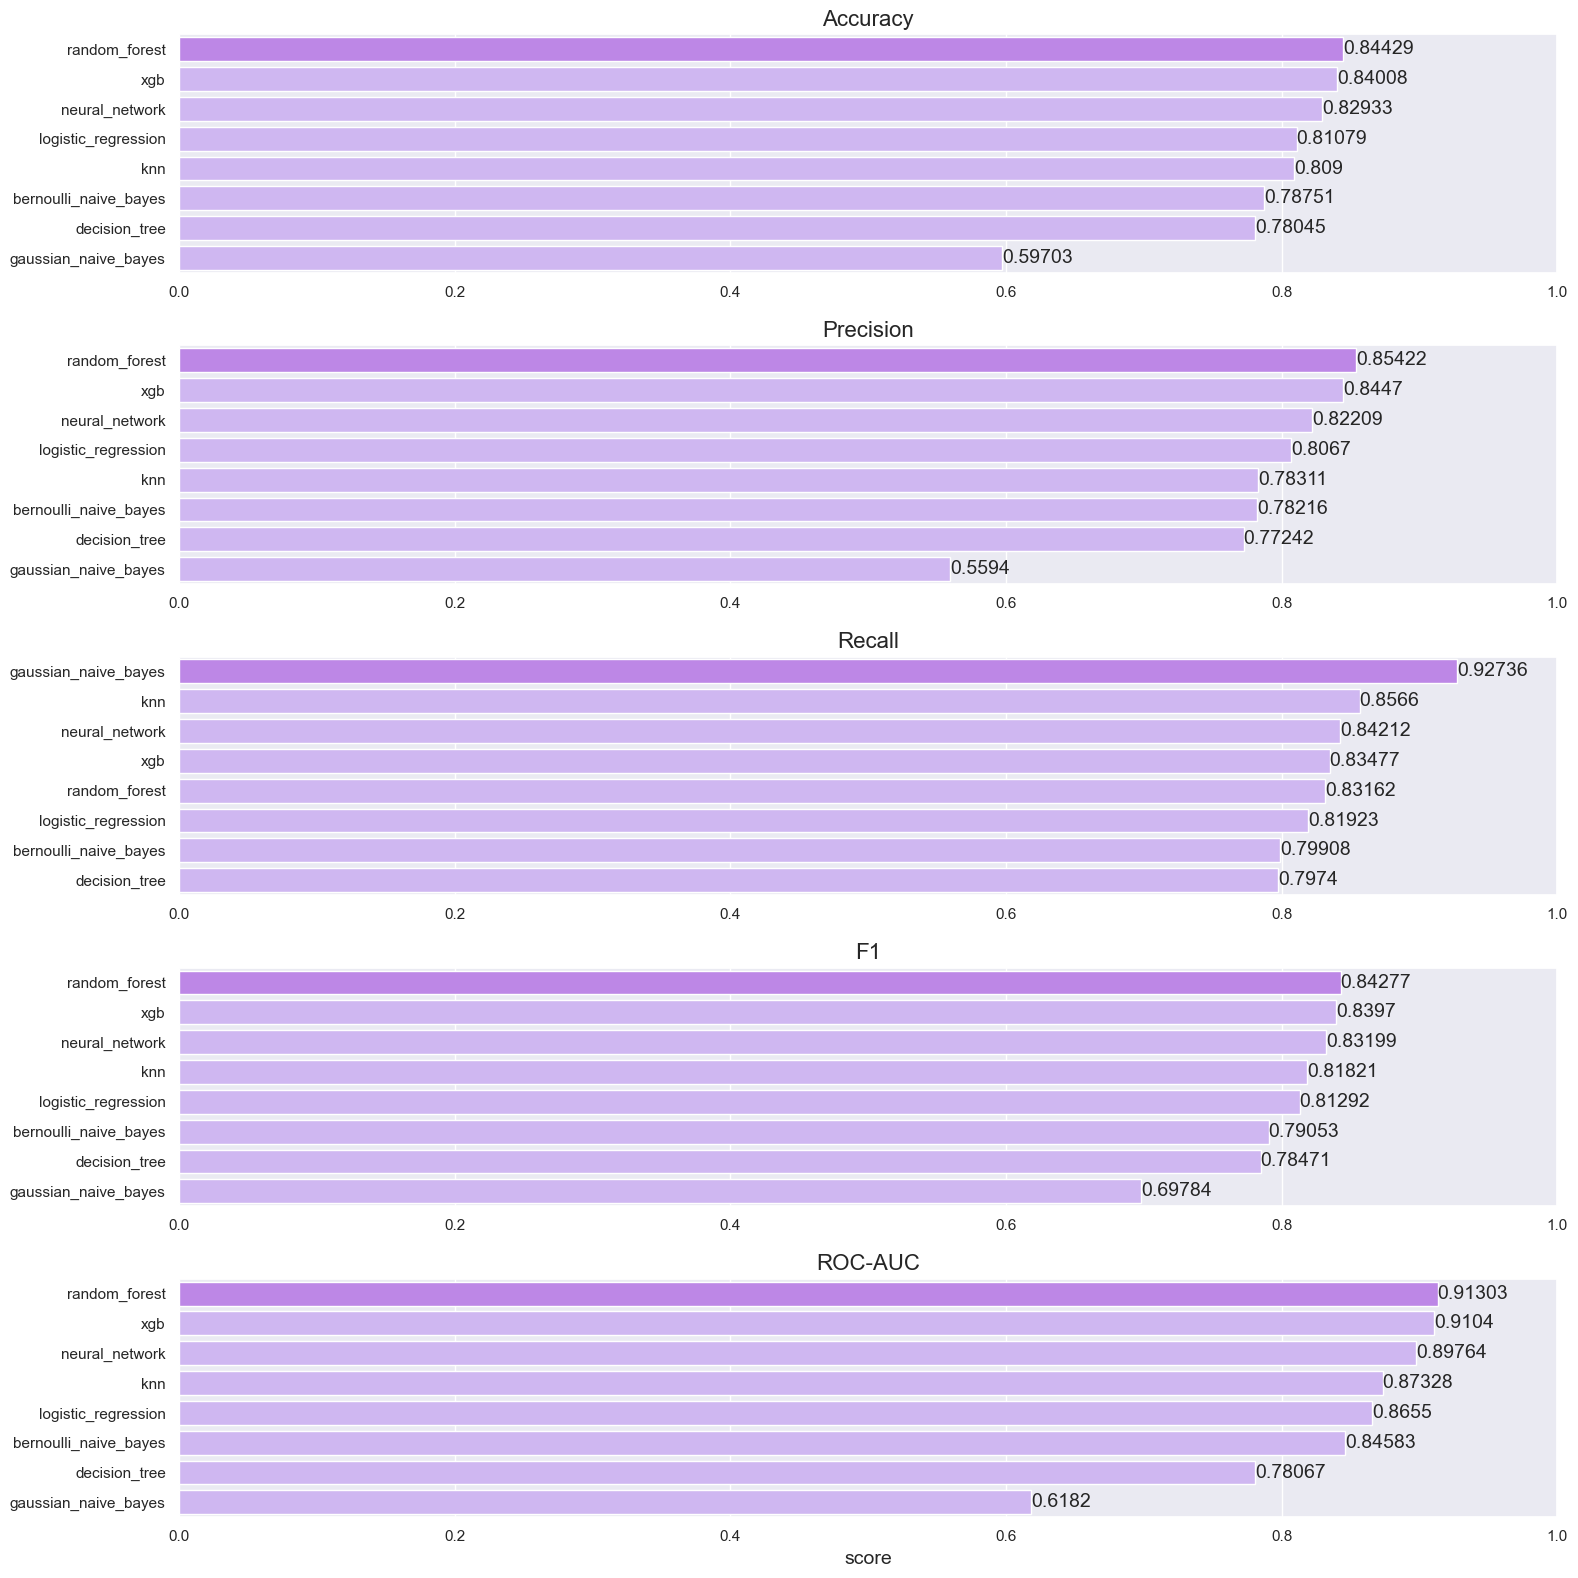

In [98]:
compareBestModelAfterOptimizingBy = {
  'accuracy': compareBestModelAfterOptimizing.sort_values(['accuracy_score'], ascending=False),
  'precision': compareBestModelAfterOptimizing.sort_values(['precision_score'], ascending=False),
  'recall': compareBestModelAfterOptimizing.sort_values(['recall_score'], ascending=False),
  'f1': compareBestModelAfterOptimizing.sort_values(['f1_score'], ascending=False),
  'roc_auc': compareBestModelAfterOptimizing.sort_values(['roc_auc_score'], ascending=False),
}
compareModelPlot(compareBestModelAfterOptimizingBy, figsize=(16, 16))

Best algorithm by Precision:
- random_forest
- xgb
- neural_network (eliminated due need more resource) 
- logistic_regression
- knn

## **KFold Cross-Validation**

In [99]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
models = {
    'random_forest': RandomForestClassifier(),
    'xgb': XGBClassifier(objective ='reg:squarederror'),
    'logistic_regression': LogisticRegression(),
    'knn': KNeighborsClassifier(n_neighbors=numOfNeighbors)
}
xCV = dataOptimize.drop(['target'], axis=1)
yCV = dataOptimize.target
def kFoldCV(k=numOfFold): return StratifiedKFold(n_splits=k, random_state=randomState, shuffle=True)
def crossValidationScore(models): 
  res = []
  for key, value in models.items():
    score = cross_val_score(value, xCV, yCV, cv=kFoldCV(numOfFold), scoring='accuracy')
    res.append({
      'model': key,
      'mean': round(score.mean(), 4),
      'stdDev': round(score.std(),4),
      'eachScore': np.round(score, 4)
    })
  return res


In [100]:
crossValidationScore(models)

[{'model': 'random_forest',
  'mean': 0.8499,
  'stdDev': 0.0021,
  'eachScore': array([0.8474, 0.8528, 0.8483, 0.8521, 0.8491])},
 {'model': 'xgb',
  'mean': 0.8445,
  'stdDev': 0.0035,
  'eachScore': array([0.8394, 0.8483, 0.8486, 0.8434, 0.843 ])},
 {'model': 'logistic_regression',
  'mean': 0.8092,
  'stdDev': 0.0038,
  'eachScore': array([0.8041, 0.8081, 0.8126, 0.8145, 0.8068])},
 {'model': 'knn',
  'mean': 0.8101,
  'stdDev': 0.0044,
  'eachScore': array([0.8095, 0.8091, 0.8114, 0.8171, 0.8034])}]

- random_forest dan xgb memiliki accuracy score tertinggi
- xgb memiliki variance terendah

## **Learning Curve**

In [101]:
learningCurveLossRF = learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, models['random_forest'])
learningCurveLossXGB = learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, models['xgb'])
# learningCurveLossNN = learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, models['neural_network']) #Slow
# learningCurveLossSVC = learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, models['svc']) #VeryVerySlow
learningCurveLossLR = learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, models['logistic_regression'])
learningCurveLossKNN = learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, models['knn'])

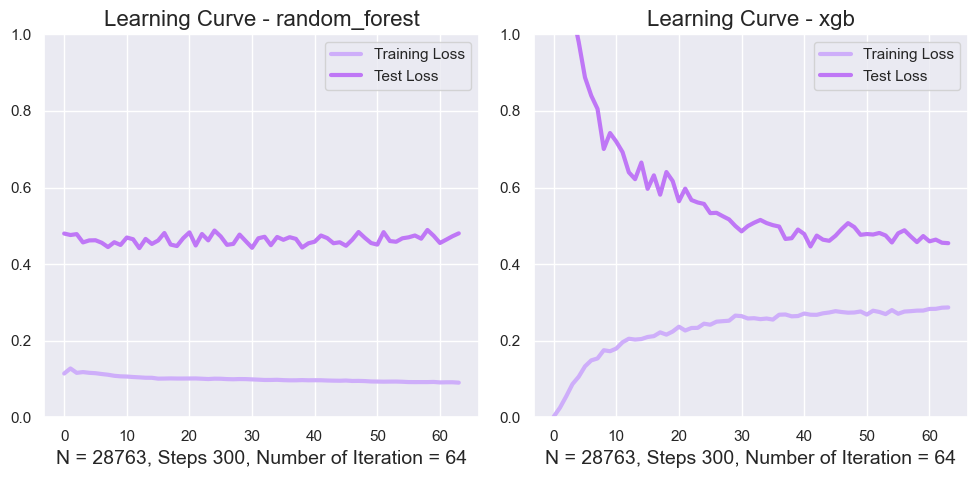

In [102]:
learningCurveDataLoss = {
  'random_forest': learningCurveLossRF,
  'xgb': learningCurveLossXGB,
  # 'neural_network': learningCurveLossNN,
  # 'knn': learningCurveLossKNN,
  # 'logistic_regression': learningCurveLossLR,
  # 'svc': learningCurveLossSVC 
  # 'decision_tree': learningCurveLossDT,
  # 'bernoulli_naive_bayes': learningCurveLossBNB
}
plotLearningCurve(learningCurveDataLoss, labels=['Training Loss', 'Test Loss'], lw=3, lenOfData=len(dataOptimize), steps=300)

## **Conclusion**
- ketiganya memiliki validation error yang hampir sama besar.
- random forest memiliki variance yang besar.
- xgb memiliki variance jauh lebih kecil berbanding dengan jumlah data. 

Masih terdapat variance untuk itu diperlukan optimizing kembali dan melihat apakah bias dan variance dapat lebih optimal.

# **HYPERPARAMETER TUNING**

## **Bayesian Optimization**

In [103]:
from hyperopt import hp, STATUS_OK
from skopt import space 
spaceXgb = {
  # 'learning_rate': hp.uniform('learning_rate', 0.1, 1),
  'max_depth': hp.quniform('max_depth', 5,40,1),
  'gamma': hp.uniform('gamma', 0,1),
  'reg_alpha': hp.uniform('reg_alpha', 0,10),
  'reg_lambda': hp.uniform('reg_lambda', 0,10),
  'colsample_bytree': hp.uniform('colsample_bytree',0,1),
  'min_child_weight': hp.uniform('min_child_weight',0,30)
}
def xgbHyperparam(space):
  model = XGBClassifier(seed=randomState, tree_method='hist',
                        max_depth=int(space['max_depth']),
                        gamma=space['gamma'],
                        reg_alpha=space['reg_alpha'],
                        reg_lambda=space['reg_lambda'],
                        colsample_bytree=space['colsample_bytree'],
                        min_child_weight=space['min_child_weight'], 
                        objective='reg:squarederror')
  xTrain, xTest, yTrain, yTest = train_test_split(dataOptimize.drop('target', axis=1),
                                                  dataOptimize.target,
                                                  test_size=testSize, random_state=randomState)
  model.fit(xTrain, yTrain,
            eval_set=[(xTrain,yTrain),(xTest,yTest)],
            eval_metric='rmse',
            early_stopping_rounds=10,
            verbose=False)
  yPred = model.predict(xTest)
  accScore = accuracy_score(yTest, yPred)
  print (f"XGB --> ACCURACY: {round(accScore,4)} || PARAMS: {space}")
  return {'loss': -accScore, 'status': STATUS_OK}

spaceRf = {
  'max_depth': hp.quniform('max_depth', 1,30,1),
  'min_samples_leaf': hp.quniform('min_samples_leaf', 1,100,1),
  'max_features': hp.quniform('max_features', 1,30,1),
  # 'n_estimators': hp.quniform('n_estimators', 100,1000,1),
}
def rfHyperparam(space):
  model = RandomForestClassifier(random_state=randomState,
                                 max_depth=int(space['max_depth']),
                                 min_samples_leaf=int(np.round(space['min_samples_leaf'])),
                                 max_features=int(space['max_features']),
                                #  n_estimators=int(space['n_estimators']),
                                #  min_impurity_decrease=10,
                                 verbose=False,
                                 oob_score=True,
                                 n_jobs=-1)
  xTrain, xTest, yTrain, yTest = train_test_split(dataOptimize.drop('target', axis=1),
                                                  dataOptimize.target,
                                                  test_size=testSize, random_state=randomState)
  # model.fit(xTrain, yTrain,
  #           eval_set=[(xTrain,yTrain),(xTest,yTest)],
  #           eval_metric='rmse',
  #           early_stopping_rounds=10,
  #           verbose=False)
  model.fit(xTrain, yTrain)
  yPred = model.predict(xTest)
  accScore = accuracy_score(yTest, yPred)
  print (f"Random Forest --> ACCURACY: {round(accScore,4)}\n{space}")
  return {'loss': -accScore.mean(), 'status': STATUS_OK}

In [104]:
from hyperopt import fmin, tpe, Trials, space_eval
bestRfParam = fmin(fn=rfHyperparam,
                    space=spaceRf,
                    algo=tpe.suggest,
                    max_evals=100,
                    trials=Trials())
bestRfParam

Random Forest --> ACCURACY: 0.8244                     
{'max_depth': 14.0, 'max_features': 20.0, 'min_samples_leaf': 33.0}
Random Forest --> ACCURACY: 0.8049                                                
{'max_depth': 10.0, 'max_features': 1.0, 'min_samples_leaf': 24.0}
Random Forest --> ACCURACY: 0.8167                                                
{'max_depth': 7.0, 'max_features': 15.0, 'min_samples_leaf': 46.0}
Random Forest --> ACCURACY: 0.832                                                 
{'max_depth': 26.0, 'max_features': 23.0, 'min_samples_leaf': 14.0}
Random Forest --> ACCURACY: 0.8228                                                
{'max_depth': 20.0, 'max_features': 17.0, 'min_samples_leaf': 46.0}
Random Forest --> ACCURACY: 0.8168                                                
{'max_depth': 9.0, 'max_features': 18.0, 'min_samples_leaf': 94.0}
Random Forest --> ACCURACY: 0.8188                                                
{'max_depth': 27.0, 'max_features': 11.0,

{'max_depth': 22.0, 'max_features': 22.0, 'min_samples_leaf': 1.0}

In [105]:
from hyperopt import fmin, tpe, Trials, space_eval
bestXgbParam = fmin(fn=xgbHyperparam,
                    space=spaceXgb,
                    algo=tpe.suggest,
                    max_evals=100,
                    trials=Trials())
bestXgbParam


XGB --> ACCURACY: 0.8421 || PARAMS: {'colsample_bytree': 0.09757771433737528, 'gamma': 0.06120853314468222, 'max_depth': 33.0, 'min_child_weight': 17.600814099668614, 'reg_alpha': 5.485272914646724, 'reg_lambda': 1.0644776129890343}
XGB --> ACCURACY: 0.8393 || PARAMS: {'colsample_bytree': 0.6740019740113973, 'gamma': 0.3267342749111303, 'max_depth': 25.0, 'min_child_weight': 19.156499234780256, 'reg_alpha': 8.99208182941641, 'reg_lambda': 1.2573320907817886}
XGB --> ACCURACY: 0.8339 || PARAMS: {'colsample_bytree': 0.4029773272185937, 'gamma': 0.9799273384619533, 'max_depth': 15.0, 'min_child_weight': 20.289171041703277, 'reg_alpha': 9.659223120430445, 'reg_lambda': 5.574087257653008}
XGB --> ACCURACY: 0.8449 || PARAMS: {'colsample_bytree': 0.5943544802872436, 'gamma': 0.04091177710230132, 'max_depth': 27.0, 'min_child_weight': 7.727951556431102, 'reg_alpha': 0.705397319636919, 'reg_lambda': 2.6955188275916866}
XGB --> ACCURACY: 0.8375 || PARAMS: {'colsample_bytree': 0.12348472687793755

{'colsample_bytree': 0.4854387554825893,
 'gamma': 0.020347080097300907,
 'max_depth': 24.0,
 'min_child_weight': 17.135268023962908,
 'reg_alpha': 3.542577657369903,
 'reg_lambda': 9.19940911757687}

## **Evaluation Metrics**

In [106]:
models = {
    'random_forest': RandomForestClassifier(max_depth=int(bestRfParam['max_depth']),
                                            max_features=int(bestRfParam['max_features']),
                                            min_samples_leaf=int(bestRfParam['min_samples_leaf']),
                                            random_state=randomState,
                                            oob_score=True,
                                            n_jobs=-1),
    'xgb': XGBClassifier(objective ='reg:squarederror',
                         colsample_bytree=bestXgbParam['colsample_bytree'],
                         gamma=bestXgbParam['gamma'],
                         max_depth=int(bestXgbParam['max_depth']),
                         min_child_weight=bestXgbParam['min_child_weight'],
                         reg_alpha=bestXgbParam['reg_alpha'],
                         reg_lambda=bestXgbParam['reg_lambda'])
}
x = dataOptimize.drop('target', axis=1)
y = dataOptimize.target
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=testSize, random_state=randomState)
compareBestModelAfterParamOptimizing = compareBestModelFunc(xTrain, yTrain, xTest, yTest, models)

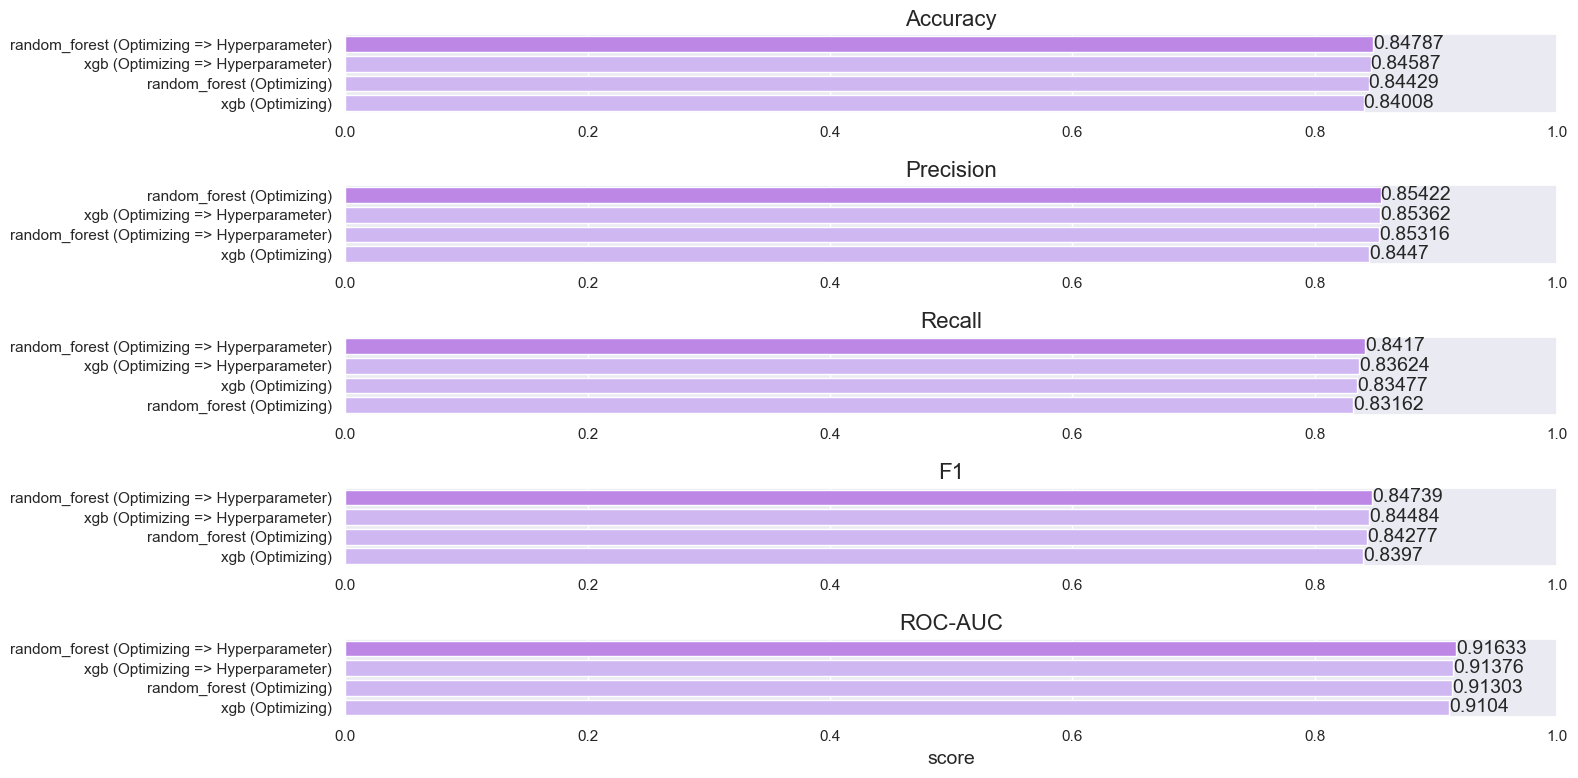

In [107]:
#
compareBestModelAfterParamOptimizing['type'] = compareBestModelAfterParamOptimizing.algorithm + ' (Optimizing => Hyperparameter)'
compareBestModelAfterOptimizing['type'] = compareBestModelAfterOptimizing.algorithm + ' (Optimizing)'
#
compareBestModelFinal = pd.concat([compareBestModelAfterOptimizing[compareBestModelAfterOptimizing.type == 'random_forest (Optimizing)'],
                                   compareBestModelAfterOptimizing[compareBestModelAfterOptimizing.type == 'xgb (Optimizing)'],
                                   compareBestModelAfterParamOptimizing]).reset_index(drop=True)
compareBestModelFinalBy = {
  'accuracy': compareBestModelFinal.sort_values(['accuracy_score'], ascending=False),
  'precision': compareBestModelFinal.sort_values(['precision_score'], ascending=False),
  'recall': compareBestModelFinal.sort_values(['recall_score'], ascending=False),
  'f1': compareBestModelFinal.sort_values(['f1_score'], ascending=False),
  'roc_auc': compareBestModelFinal.sort_values(['roc_auc_score'], ascending=False),
}
# compareBestModelOV
compareModelPlot(compareBestModelFinalBy, figsize=(16, 8), isType=True)

## **Learning Curve**

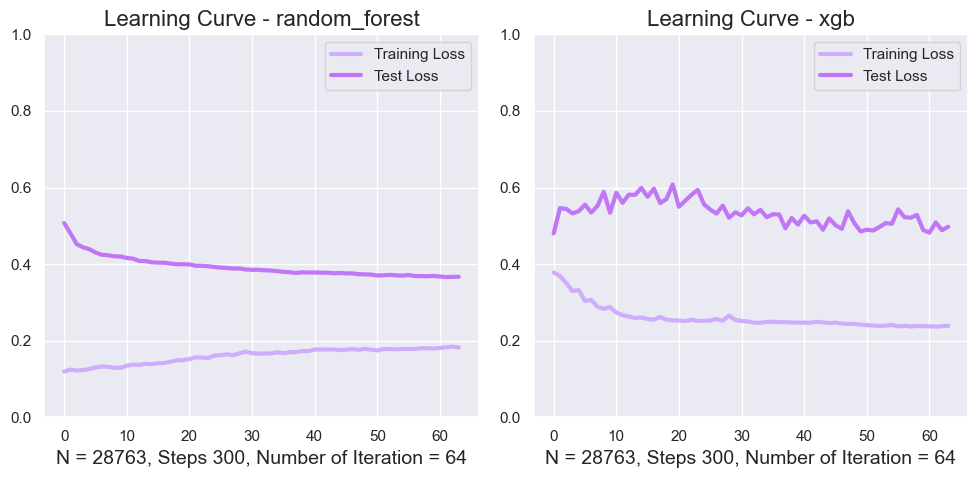

In [108]:
learningCurveLossRF = learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, models['random_forest'])
learningCurveLossXGB = learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, models['xgb'])
learningCurveDataLoss = {
  'random_forest': learningCurveLossRF,
  'xgb': learningCurveLossXGB
}
plotLearningCurve(learningCurveDataLoss, labels=['Training Loss', 'Test Loss'], lw=3, lenOfData=len(dataOptimize), steps=300)

**test_size = 0.2**

In [129]:
dataTuning = data.copy()
dataTuning.rename(columns={'relevent_experience': 'relevant_experience'}, inplace=True)
dataTuning.drop(['enrollee_id'], axis=1, inplace=True)
#
catColumns = [x for x in dataTuning.columns if dataTuning[x].dtype == 'object']
dataTuning = toCleanString(dataTuning, catColumns)
# dataTuning.company_size = np.where(dataTuning.company_size=='10/49', '10-49', np.where(dataTuning.company_size=='10000+', '>10000', dataTuning.company_size))
#
labelColumns = []
oheColumns = []
for value in catColumns:
  if value in ['city', 'gender', 'major_discipline', 'company_type']:
    oheColumns.append(value)
  else: labelColumns.append(value)
# label encoding
dataTuning = toOrdinalEncoding(dataTuning, catColumns, mappingLabel)
# one-hot encoding nnti setelah missing values
## label encoding sementara untuk handle missing value setelah itu akan di-inverse untuk OHE
leCity = LabelEncoder()
leGender = LabelEncoder()
leMajorDiscipline = LabelEncoder()
leCompanyType = LabelEncoder()
dataTuning.city = leCity.fit_transform(dataTuning.city)
dataTuning.gender = leGender.fit_transform(dataTuning.gender) 
dataTuning.major_discipline = leMajorDiscipline.fit_transform(dataTuning.major_discipline) 
dataTuning.company_type = leCompanyType.fit_transform(dataTuning.company_type)
## label to nan
dataTuning.gender = np.where(dataTuning.gender==len(leGender.classes_)-1, np.nan, dataTuning.gender)
dataTuning.city = np.where(dataTuning.city==len(leCity.classes_)-1, np.nan, dataTuning.city)
dataTuning.major_discipline = np.where(dataTuning.major_discipline==len(leMajorDiscipline.classes_)-1, np.nan, dataTuning.major_discipline)
dataTuning.company_type = np.where(dataTuning.company_type==len(leCompanyType.classes_)-1, np.nan, dataTuning.company_type)
#
numOfNeighbors = 5
numericalColumns = ['city_development_index','training_hours','target']
knnImputer = KNNImputer(n_neighbors=numOfNeighbors)
dataCategorical = dataTuning[[x for x in dataTuning.columns if x not in numericalColumns]]
dataCategoricalNonMissing = knnImputer.fit_transform(dataCategorical)
dataTuningCategoricalNonMissing = pd.DataFrame(np.intc(np.round(dataCategoricalNonMissing)), columns=dataCategorical.columns)
dataTuning = pd.concat([dataTuning[numericalColumns], dataTuningCategoricalNonMissing], axis=1)
#
dataTuning.city = leCity.inverse_transform(dataTuning.city)
dataTuning.gender = leGender.inverse_transform(dataTuning.gender)
dataTuning.major_discipline = leMajorDiscipline.inverse_transform(dataTuning.major_discipline)
dataTuning.company_type = leCompanyType.inverse_transform(dataTuning.company_type)
# OHE
dataTuning = toOhe(data=dataTuning, cols=oheColumns)
#
dataTuningTS0 = dataTuning.copy()
dataTuningTS0 = toBoxCoxScaling(dataTuningTS0, ['training_hours', 'city_development_index'])
#
dataTuningSc0 = dataTuningTS0.copy()
dataTuningSc0 = toMinMaxScaling(dataTuningSc0, ['city_development_index', 'training_hours'])
#
dataTuningOV2 = dataTuningSc0.copy()
dataTuningOV2 = toOVKmeansSmote(dataTuningOV2, targetVariable='target')
#
dataOptimize = dataTuningOV2.copy()

In [133]:
dataOptimize

city_development_index  training_hours  relevant_experience  \
0                    0.830134        0.495226                    1   
1                    0.295433        0.545774                    0   
2                    0.072641        0.661677                    0   
3                    0.327202        0.565556                    0   
4                    0.274921        0.249782                    1   
...                       ...             ...                  ...   
28758                0.303921        0.595145                    0   
28759                0.830134        0.797476                    0   
28760                0.167878        0.368314                    1   
28761                0.365402        0.571371                    1   
28762                0.046566        0.481547                    1   

       enrolled_university  education_level  experience  company_size  \
0                        0                2          21             4   
1                        0                2          15             2   
2                        2                2           5             2   
3                        1                2           0             3   
4                        0                3          21             2   
...                    ...              ...         ...           ...   
28758                    2                1           4             4   
28759                    0                2           5             4   
28760                    2                2           4             3   
28761                    0                2           4             5   
28762                    0                2           5             3   

       last_new_job  city_city1  city_city10  ...  major_discipline_nomajor  \
0                 1         0.0          0.0  ...                       0.0   
1                 5         0.0          0.0  ...                       0.0   
2                 0         0.0          0.0  ...                       0.0   
3                 0         0.0          0.0  ...                       0.0   
4                 4         0.0          0.0  ...                       0.0   
...             ...         ...          ...  ...                       ...   
28758             0         0.0          0.0  ...                       0.0   
28759             2         0.0          0.0  ...                       0.0   
28760             0         0.0          0.0  ...                       0.0   
28761             1         0.0          0.0  ...                       0.0   
28762             1         0.0          0.0  ...                       0.0   

       major_discipline_other  major_discipline_stem  \
0                         0.0                    1.0   
1                         0.0                    1.0   
2                         0.0                    1.0   
3                         0.0                    0.0   
4                         0.0                    1.0   
...                       ...                    ...   
28758                     0.0                    1.0   
28759                     0.0                    1.0   
28760                     0.0                    1.0   
28761                     0.0                    1.0   
28762                     0.0                    1.0   

       company_type_earlystagestartup  company_type_fundedstartup  \
0                                 0.0                         0.0   
1                                 0.0                         0.0   
2                                 0.0                         0.0   
3                                 0.0                         0.0   
4                                 0.0                         1.0   
...                               ...                         ...   
28758                             0.0                         0.0   
28759                             0.0                         0.0   
28760                             0.0         

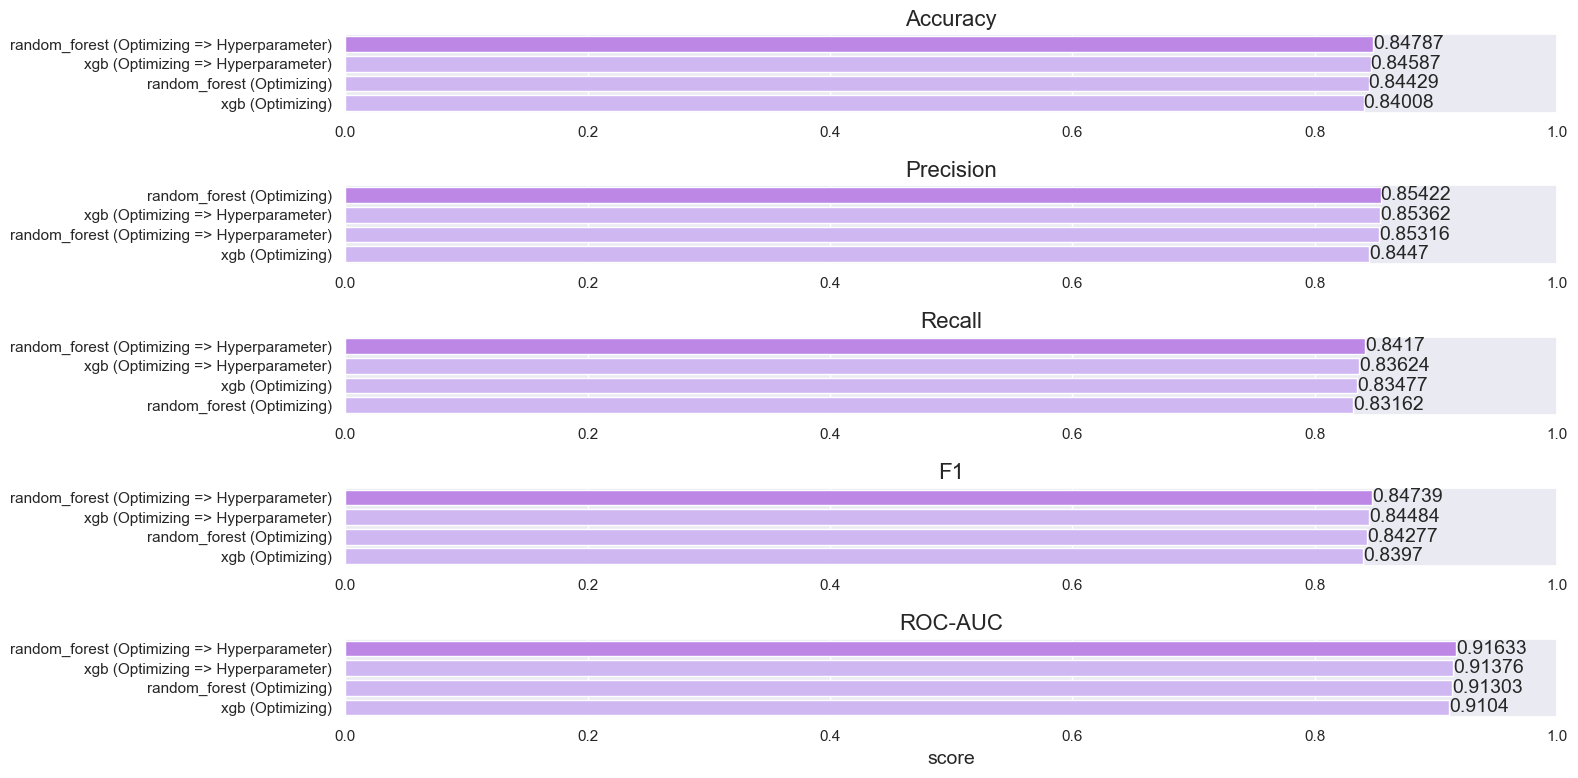

In [130]:
models = {
    'random_forest': RandomForestClassifier(max_depth=int(bestRfParam['max_depth']),
                                            max_features=int(bestRfParam['max_features']),
                                            min_samples_leaf=int(bestRfParam['min_samples_leaf']),
                                            random_state=randomState,
                                            oob_score=True,
                                            n_jobs=-1),
    'xgb': XGBClassifier(objective ='reg:squarederror',
                         colsample_bytree=bestXgbParam['colsample_bytree'],
                         gamma=bestXgbParam['gamma'],
                         max_depth=int(bestXgbParam['max_depth']),
                         min_child_weight=bestXgbParam['min_child_weight'],
                         reg_alpha=bestXgbParam['reg_alpha'],
                         reg_lambda=bestXgbParam['reg_lambda'])
}
x = dataOptimize.drop('target', axis=1)
y = dataOptimize.target
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=randomState)
#
compareBestModelAfterParamOptimizing['type'] = compareBestModelAfterParamOptimizing.algorithm + ' (Optimizing => Hyperparameter)'
compareBestModelAfterOptimizing['type'] = compareBestModelAfterOptimizing.algorithm + ' (Optimizing)'
#
compareBestModelFinal = pd.concat([compareBestModelAfterOptimizing[compareBestModelAfterOptimizing.type == 'random_forest (Optimizing)'],
                                   compareBestModelAfterOptimizing[compareBestModelAfterOptimizing.type == 'xgb (Optimizing)'],
                                   compareBestModelAfterParamOptimizing]).reset_index(drop=True)
compareBestModelFinalBy = {
  'accuracy': compareBestModelFinal.sort_values(['accuracy_score'], ascending=False),
  'precision': compareBestModelFinal.sort_values(['precision_score'], ascending=False),
  'recall': compareBestModelFinal.sort_values(['recall_score'], ascending=False),
  'f1': compareBestModelFinal.sort_values(['f1_score'], ascending=False),
  'roc_auc': compareBestModelFinal.sort_values(['roc_auc_score'], ascending=False),
}
# compareBestModelOV
compareModelPlot(compareBestModelFinalBy, figsize=(16, 8), isType=True)

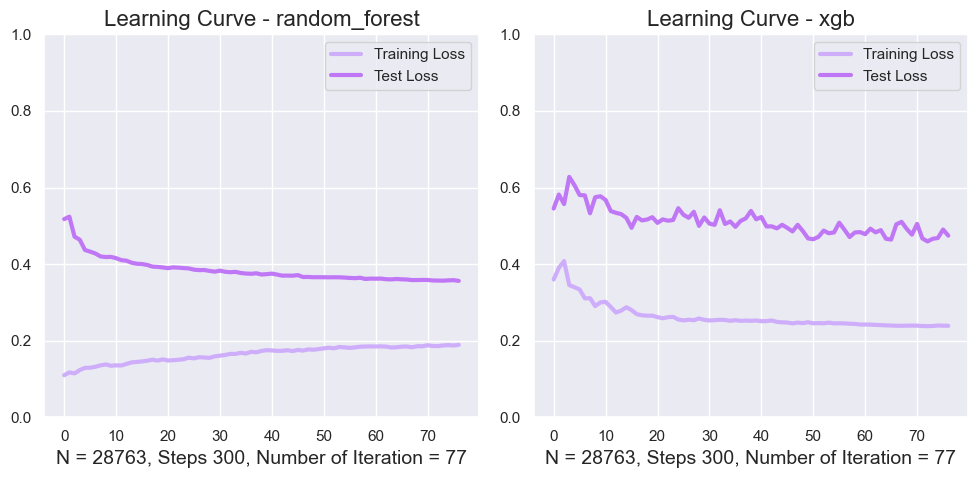

In [110]:
learningCurveLossRF = learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, models['random_forest'])
learningCurveLossXGB = learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, models['xgb'])
learningCurveDataLoss = {
  'random_forest': learningCurveLossRF,
  'xgb': learningCurveLossXGB
}
plotLearningCurve(learningCurveDataLoss, labels=['Training Loss', 'Test Loss'], lw=3, lenOfData=len(dataOptimize), steps=300)

without city feature

In [111]:
dataTuning = data.copy()
dataTuning.rename(columns={'relevent_experience': 'relevant_experience'}, inplace=True)
dataTuning.drop(['enrollee_id','city'], axis=1, inplace=True)
#
catColumns = [x for x in dataTuning.columns if dataTuning[x].dtype == 'object']
dataTuning = toCleanString(dataTuning, catColumns)
# dataTuning.company_size = np.where(dataTuning.company_size=='10/49', '10-49', np.where(dataTuning.company_size=='10000+', '>10000', dataTuning.company_size))
#
labelColumns = []
oheColumns = []
for value in catColumns:
  if value in ['gender', 'major_discipline', 'company_type']:
    oheColumns.append(value)
  else: labelColumns.append(value)
# label encoding
dataTuning = toOrdinalEncoding(dataTuning, catColumns, mappingLabel)
# one-hot encoding nnti setelah missing values
## label encoding sementara untuk handle missing value setelah itu akan di-inverse untuk OHE
# leCity = LabelEncoder()
leGender = LabelEncoder()
leMajorDiscipline = LabelEncoder()
leCompanyType = LabelEncoder()
# dataTuning.city = leCity.fit_transform(dataTuning.city)
dataTuning.gender = leGender.fit_transform(dataTuning.gender) 
dataTuning.major_discipline = leMajorDiscipline.fit_transform(dataTuning.major_discipline) 
dataTuning.company_type = leCompanyType.fit_transform(dataTuning.company_type)
## label to nan
dataTuning.gender = np.where(dataTuning.gender==len(leGender.classes_)-1, np.nan, dataTuning.gender)
# dataTuning.city = np.where(dataTuning.city==len(leCity.classes_)-1, np.nan, dataTuning.city)
dataTuning.major_discipline = np.where(dataTuning.major_discipline==len(leMajorDiscipline.classes_)-1, np.nan, dataTuning.major_discipline)
dataTuning.company_type = np.where(dataTuning.company_type==len(leCompanyType.classes_)-1, np.nan, dataTuning.company_type)
#
numOfNeighbors = 5
numericalColumns = ['city_development_index','training_hours','target']
knnImputer = KNNImputer(n_neighbors=numOfNeighbors)
dataCategorical = dataTuning[[x for x in dataTuning.columns if x not in numericalColumns]]
dataCategoricalNonMissing = knnImputer.fit_transform(dataCategorical)
dataTuningCategoricalNonMissing = pd.DataFrame(np.intc(np.round(dataCategoricalNonMissing)), columns=dataCategorical.columns)
dataTuning = pd.concat([dataTuning[numericalColumns], dataTuningCategoricalNonMissing], axis=1)
#
# dataTuning.city = leCity.inverse_transform(dataTuning.city)
dataTuning.gender = leGender.inverse_transform(dataTuning.gender)
dataTuning.major_discipline = leMajorDiscipline.inverse_transform(dataTuning.major_discipline)
dataTuning.company_type = leCompanyType.inverse_transform(dataTuning.company_type)
# OHE
dataTuning = toOhe(data=dataTuning, cols=oheColumns)
#
dataTuningTS0 = dataTuning.copy()
dataTuningTS0 = toBoxCoxScaling(dataTuningTS0, ['training_hours', 'city_development_index'])
#
dataTuningSc0 = dataTuningTS0.copy()
dataTuningSc0 = toMinMaxScaling(dataTuningSc0, ['city_development_index', 'training_hours'])
#
dataTuningOV2 = dataTuningSc0.copy()
dataTuningOV2 = toOVKmeansSmote(dataTuningOV2, targetVariable='target')
#
dataOptimize = dataTuningOV2.copy()

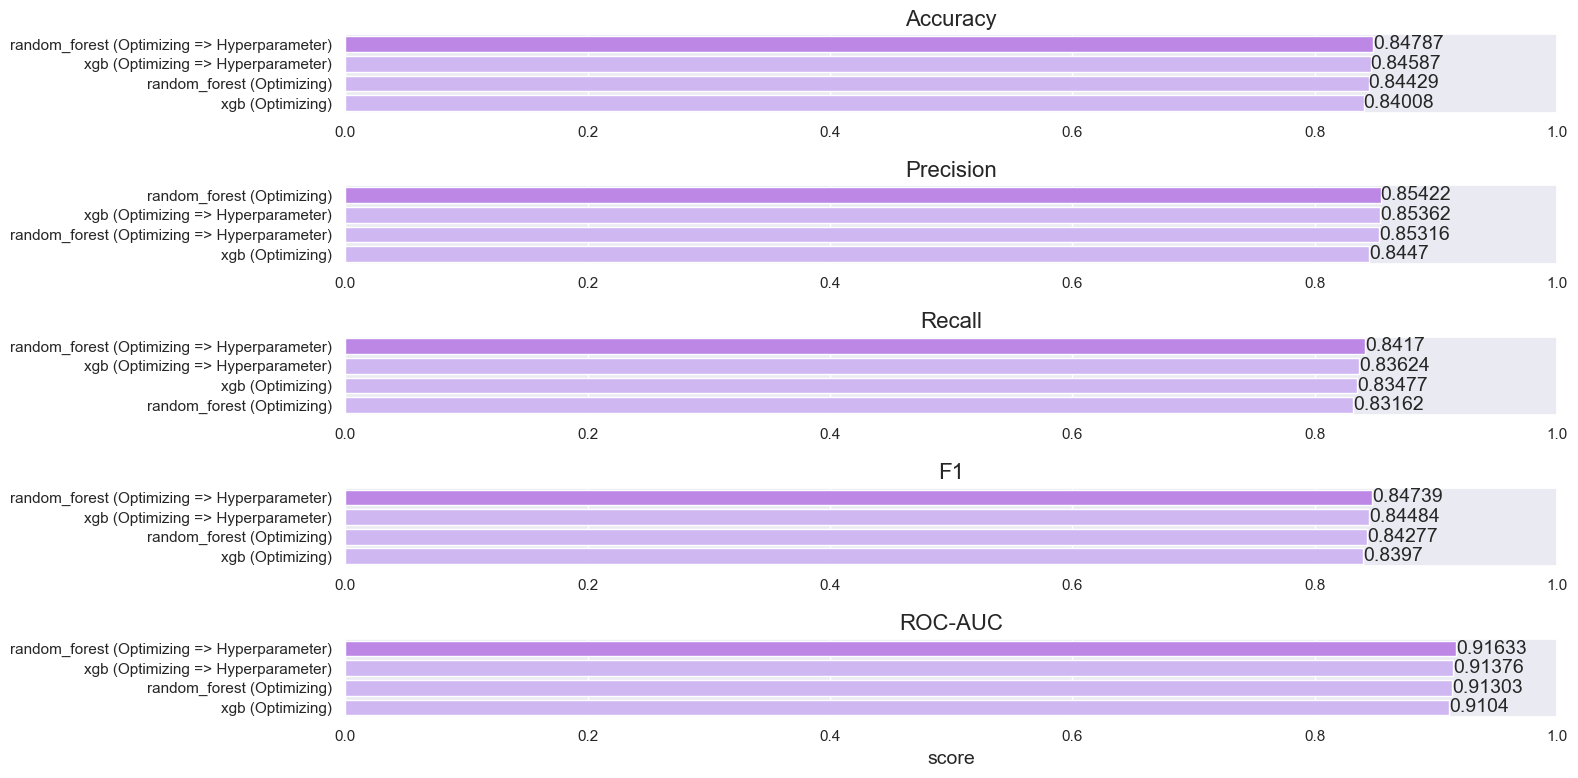

In [112]:
models = {
    'random_forest': RandomForestClassifier(max_depth=int(bestRfParam['max_depth']),
                                            max_features=int(bestRfParam['max_features']),
                                            min_samples_leaf=int(bestRfParam['min_samples_leaf']),
                                            random_state=randomState,
                                            oob_score=True,
                                            n_jobs=-1),
    'xgb': XGBClassifier(objective ='reg:squarederror',
                         colsample_bytree=bestXgbParam['colsample_bytree'],
                         gamma=bestXgbParam['gamma'],
                         max_depth=int(bestXgbParam['max_depth']),
                         min_child_weight=bestXgbParam['min_child_weight'],
                         reg_alpha=bestXgbParam['reg_alpha'],
                         reg_lambda=bestXgbParam['reg_lambda'])
}
x = dataOptimize.drop('target', axis=1)
y = dataOptimize.target
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=randomState)
#
compareBestModelAfterParamOptimizing['type'] = compareBestModelAfterParamOptimizing.algorithm + ' (Optimizing => Hyperparameter)'
compareBestModelAfterOptimizing['type'] = compareBestModelAfterOptimizing.algorithm + ' (Optimizing)'
#
compareBestModelFinal = pd.concat([compareBestModelAfterOptimizing[compareBestModelAfterOptimizing.type == 'random_forest (Optimizing)'],
                                   compareBestModelAfterOptimizing[compareBestModelAfterOptimizing.type == 'xgb (Optimizing)'],
                                   compareBestModelAfterParamOptimizing]).reset_index(drop=True)
compareBestModelFinalBy = {
  'accuracy': compareBestModelFinal.sort_values(['accuracy_score'], ascending=False),
  'precision': compareBestModelFinal.sort_values(['precision_score'], ascending=False),
  'recall': compareBestModelFinal.sort_values(['recall_score'], ascending=False),
  'f1': compareBestModelFinal.sort_values(['f1_score'], ascending=False),
  'roc_auc': compareBestModelFinal.sort_values(['roc_auc_score'], ascending=False),
}
# compareBestModelOV
compareModelPlot(compareBestModelFinalBy, figsize=(16, 8), isType=True)

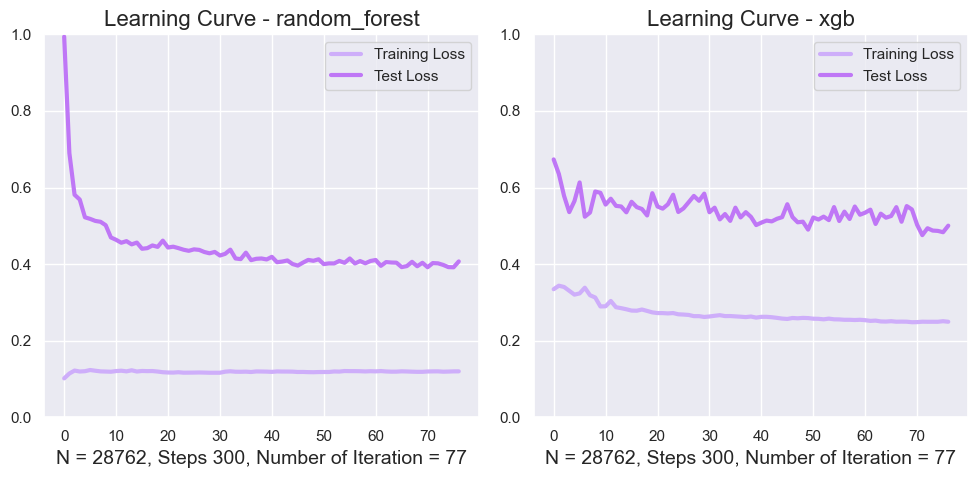

In [113]:
learningCurveLossRF = learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, models['random_forest'])
learningCurveLossXGB = learningCurveDataByLogLoss(xTrain, yTrain, xTest, yTest, models['xgb'])
learningCurveDataLoss = {
  'random_forest': learningCurveLossRF,
  'xgb': learningCurveLossXGB
}
plotLearningCurve(learningCurveDataLoss, labels=['Training Loss', 'Test Loss'], lw=3, lenOfData=len(dataOptimize), steps=300)

## **Conclusion**
Model Random Forest dengan Hyperparameter dengan city dan test_size = 0.2 menunjukkan hasil yang lebih baik.

# **MODEL BUILDING**

In [134]:
dataOptimize = dataTuningOV2.copy()
x = dataOptimize.drop('target', axis=1)
y = dataOptimize.target
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=randomState)

model = RandomForestClassifier(max_depth=int(bestRfParam['max_depth']),
                                max_features=int(bestRfParam['max_features']),
                                min_samples_leaf=int(bestRfParam['min_samples_leaf']),
                                random_state=randomState,
                                oob_score=True,
                                n_jobs=-1)

model.fit(xTrain, yTrain)

RandomForestClassifier(max_depth=22, max_features=22, n_jobs=-1, oob_score=True,
                       random_state=0)

# **FEATURE IMPORTANCE**

In [138]:
def featureImportance(cols, fi): 
  return pd.DataFrame(list(zip(cols, fi)), columns=['feature_name', 'value']).sort_values('value', ascending=False).reset_index(drop=True)

In [139]:
featureImp = featureImportance(dataOptimize.columns, model.feature_importances_)
featureImp

feature_name     value
0                experience  0.223497
1    city_development_index  0.125013
2               city_city21  0.109671
3            training_hours  0.096148
4              last_new_job  0.057179
..                      ...       ...
140            city_city111  0.000018
141             city_city18  0.000010
142            city_city140  0.000010
143            city_city139  0.000008
144              city_city2  0.000005

[145 rows x 2 columns]

[Text(0.5, 0, ''), Text(0, 0.5, ''), Text(0.5, 1.0, 'Feature Importance')]

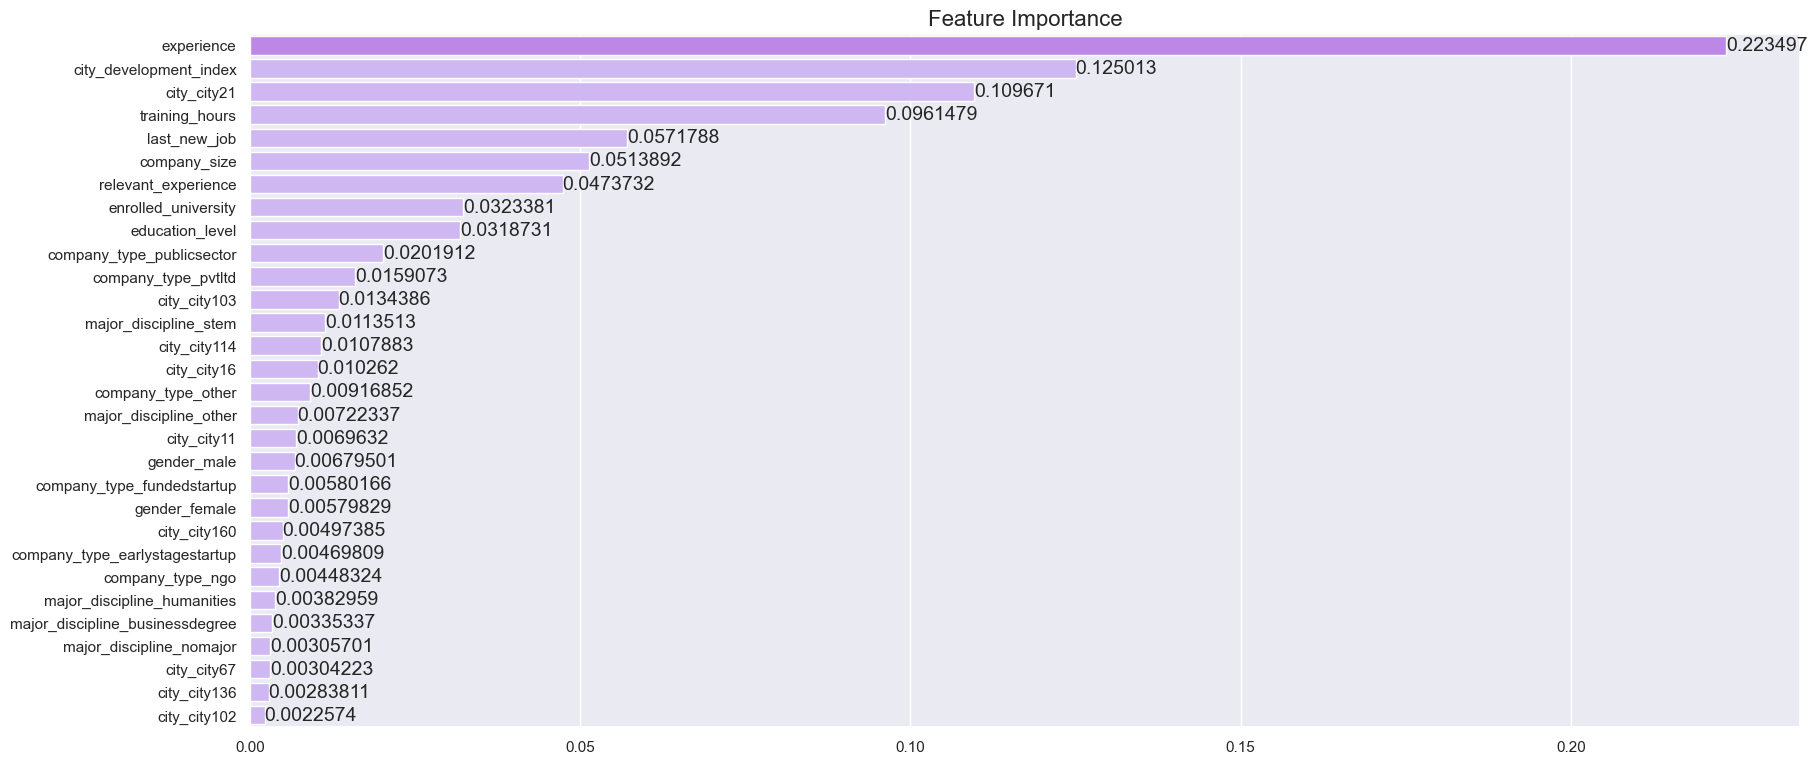

In [150]:
f, ax = plt.subplots(figsize=(20,9))
barpallete = [colorSet1_2 if (x < max(featureImp.value)) else colorSet1_1 for x in featureImp.value]
sns.barplot(data=featureImp.head(30), x='value', y='feature_name', palette=barpallete)
ax.bar_label(ax.containers[0])
ax.set(xlabel='', ylabel='', title='Feature Importance')

# **MODEL FUNCTION**

In [ ]:
# def dataPrediction(dataTesting, actual=False):
#   base = pd.read_csv('./db/clean-data-only-remove-outliers-without-encoding-scaling-feature-engineering.csv')
#   testing = dataTesting.copy()
#   # return pd.concat([base.duration, testing.duration]), 'ea'
#   if (actual==True): actualPrice = testing.price
#   testing.drop(['Unnamed: 0','flight','price'], axis=1, inplace=True, errors='ignore')
#   labelColumns = ['stops', 'class']
#   oheColumns = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time']
#   categoryColumns = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'stops', 'class']

#   duration = pd.concat([base.duration, testing.duration])
#   daysLeft = pd.concat([base.days_left, testing.days_left])
#   durationScale = (((testing.duration-duration.min())/(duration.max()-duration.min()))).to_list()
#   daysLeftScale = ((testing.days_left-daysLeft.mean())/daysLeft.std()).to_list()
#   testing.duration = durationScale[0]
#   testing.days_left = daysLeftScale[0]

#   testing = dfPreprocessing1Func(testing, categoryColumns)

#   mappingLabel = [{
#     'col': 'stops', 
#     'mapping': {
#       'zero': 0, 
#       'one': 1, 
#       'twoormore': 2
#   }}, {
#     'col': 'class', 
#     'mapping': {
#       'economy': 0,
#       'business': 1
#   }}]
#   #
#   oe = OrdinalEncoder(cols=labelColumns, mapping=mappingLabel)
#   #
#   oe.fit(base[labelColumns])
#   baseOe = pd.DataFrame(oe.transform(base[labelColumns]), columns=oe.get_feature_names())
#   base.drop(columns=labelColumns, inplace=True)
#   base = pd.concat([base.reset_index(drop=True), baseOe.reset_index(drop=True)], axis=1)  
#   #
#   oe.transform(testing[labelColumns])
#   testingOe = pd.DataFrame(oe.transform(testing[labelColumns]), columns=oe.get_feature_names())
#   testing.drop(columns=labelColumns, inplace=True)
#   testing = pd.concat([testing.reset_index(drop=True), testingOe.reset_index(drop=True)], axis=1)
#   #
#   ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
#   #
#   ohe.fit(base[oheColumns])
#   baseOhe = pd.DataFrame(ohe.transform(base[oheColumns]), columns=ohe.get_feature_names_out())
#   base = pd.concat([base.reset_index(drop=True), baseOhe.reset_index(drop=True)], axis=1).drop(columns=oheColumns)
#   #
#   ohe.transform(testing[oheColumns])
#   testingOhe = pd.DataFrame(ohe.transform(testing[oheColumns]), columns=ohe.get_feature_names_out())
#   testing = pd.concat([testing.reset_index(drop=True), testingOhe.reset_index(drop=True)], axis=1).drop(columns=oheColumns)
  
#   with open('./model/rf-best-model.pkl', 'rb') as file:
#     mdl = pickle.load(file)

#   prediction = mdl.predict(testing)
#   prediction = pd.Series((prediction), name='prediction_price')
#   prediction = prediction.apply(lambda x: int(round(x, 0)))
#   if (actual==True):
#     r2Score = r2_score(dataTesting.price, prediction)
#     mae = mean_absolute_error(dataTesting.price, prediction)
#     rmse = np.sqrt(mean_squared_error(dataTesting.price, prediction))
#     score = f'R2 Score\t: {round(r2Score, 2)}\nMAE\t\t: {round(mae,2)}\nRMSE\t\t: {round(rmse,2)}'
#     data = dataTesting.drop(['price'], errors='ignore', axis=1)
#     actualPrice = pd.Series(actualPrice, name='actual_price')
#     return pd.concat([data.reset_index(drop=True), 
#                       actualPrice.reset_index(drop=True),
#                       prediction.reset_index(drop=True)], axis=1), score
#   return pd.concat([dataTesting.reset_index(drop=True), 
#                     prediction.reset_index(drop=True)], axis=1)